# Kaggle Challenge

## Santander - Customer Satisfaction: 2016 

#### This is part of Kaggle challenge referred to identify customers satisfaction level while they are part of the bank. The main point is to evaluate their satisfaction and prevent leaving before it occurs. 

#### The dataset and all instructions are available at: https://www.kaggle.com/c/santander-customer-satisfaction/overview

##### Data Description
You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals one for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

## Business Problem

#### Identify clients satisfaction levels before them leave.

0 = satisfied
1 = insatisfied

## Loading dataset

In [1]:
# Declare libraries

from pandas import read_csv

In [2]:
df = read_csv("C:/FCD/BigDataAnalyticsPythonSpark/Projeto03/train.csv", sep = ',')

In [ ]:
df_test = read_csv("C:/FCD/BigDataAnalyticsPythonSpark/Projeto03/test.csv", sep = ',')

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Head of dataset

df.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [ ]:
df_test.head()

In [6]:
df.shape

(76020, 371)

In [ ]:
df_test.shape

In [7]:
df.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [8]:
# NA values?

df.isnull().values.any()

False

### We must have in mind, any changes made in training dataset have to be applied to test dataset.

In [25]:
# In the dataset description provided by Kaggle is that only numeric variables are available, we must have sure tough.
# Then, Exist strings?

df.select_dtypes(include=[object]).sum()

Series([], dtype: float64)

In [19]:
[df[items] for items in df if '' in df[items]]

[]

In [26]:
# Describe values

df.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

As the dataset is too big, it is hard to find out all issues. For that reason, it is important at this moment to pay attention at Target , Age (var15) variables and realize that all values are not in the same scale.

For the Target value, we can see the number of results are different for each one. So, whether use the data this way predictions problems will appear.

In [27]:
# Grouping dataset by Target variable;

df.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

In [28]:
# Observing var15 (age) variable with more attention. 

df.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

In [53]:
df.groupby("var15").size()

var15
5         28
6         21
7          6
8          9
9         18
10        17
11        19
12        11
13        11
14        20
15        27
16        12
17        13
18        14
19        16
20         9
21        21
22       940
23     20170
24      6232
25      4217
26      3270
27      2861
28      2173
29      1727
30      1640
31      1798
32      1592
33      1377
34      1489
       ...  
75       113
76       109
77        64
78        68
79        70
80        57
81        47
82        50
83        56
84        54
85        43
86        42
87        37
88        48
89        40
90        26
91        30
92        16
93        20
94        12
95         6
96         7
97         3
98         1
99         6
100        6
101        1
102        4
104        2
105        1
Length: 100, dtype: int64

In [5]:
df.var15.value_counts()

23     20170
24      6232
25      4217
26      3270
27      2861
28      2173
31      1798
29      1727
30      1640
32      1592
36      1546
35      1536
34      1489
37      1401
38      1390
33      1377
39      1329
40      1310
41      1242
42      1199
43      1077
44      1042
45      1020
22       940
46       910
47       780
48       773
49       708
50       666
51       663
       ...  
15        27
90        26
21        21
6         21
93        20
14        20
11        19
9         18
10        17
92        16
19        16
18        14
17        13
16        12
94        12
13        11
12        11
20         9
8          9
96         7
7          6
95         6
99         6
100        6
102        4
97         3
104        2
98         1
105        1
101        1
Name: var15, Length: 100, dtype: int64

### Plots

Creating plots is the best way to understanding data behaviors.

In [49]:
# help to know more abou this function

?plt.hist

In [30]:
# Seaborn version

sns.__version__

'0.10.1'

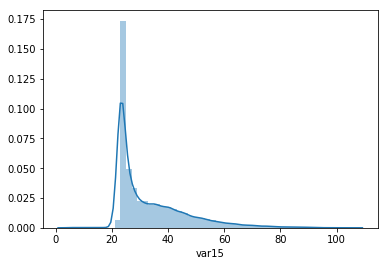

In [54]:
# Test Seaborn plot

sns.distplot(df.var15)

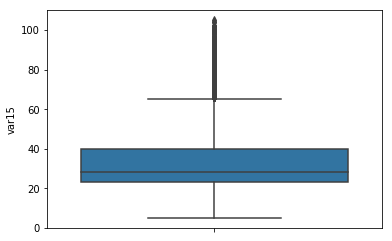

In [58]:
# Test Seaborn boxplot

sns.boxplot(df.var15, orient = 'v')

In [62]:
# Identifing dataframe columns

df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

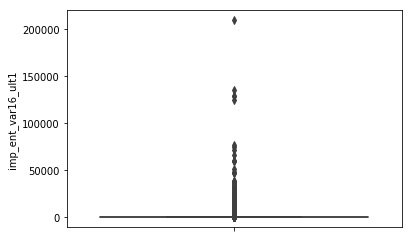

In [64]:
# Let's create a new one...

sns.boxplot(df.imp_ent_var16_ult1, orient='v')

In [65]:
# Thinking about build plots, we must have one variables list to do it.

columns_list = list(df.columns)

In [66]:
columns_list

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 '

In [68]:
# taking out TARGET variable

columns_list.pop(-1)

'TARGET'

In [69]:
columns_list

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 '

In [82]:
columns_list.pop(0)

'ID'

In [97]:
columns_list[0:2]

delta
ind

['var3', 'var15']

Using set of plots below, it is possible realize that variables wich begins with "delta" or "ind" have two values: 0 or 1. On the other hand, several variables showed has outliers as well as are not in normal distribuition.

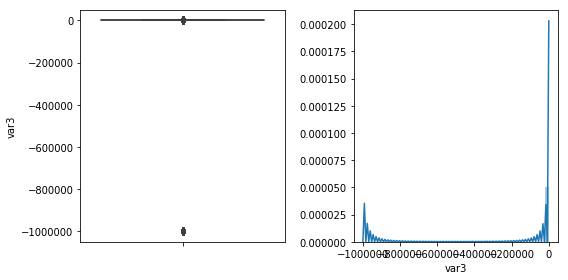

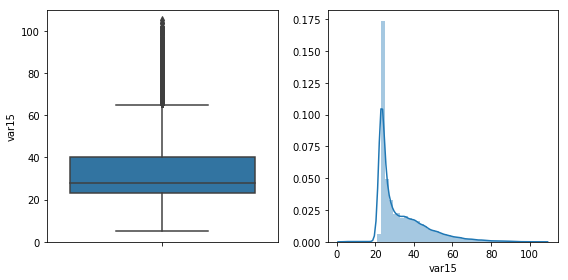

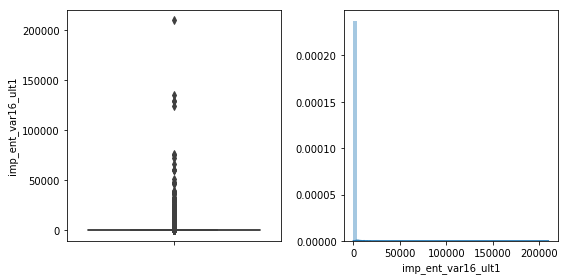

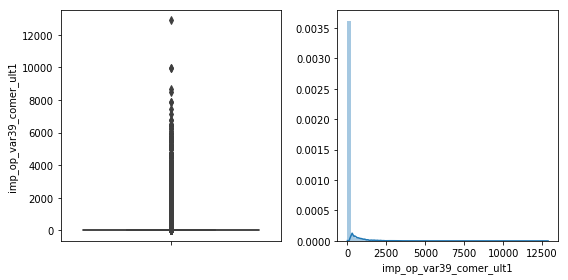

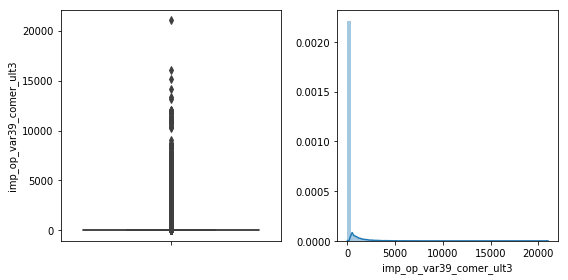

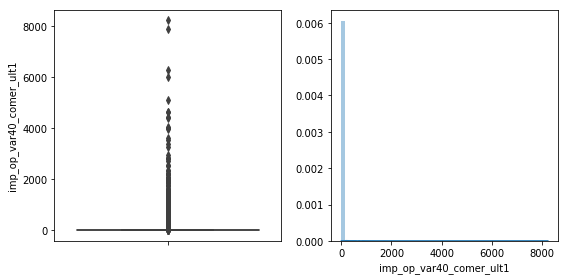

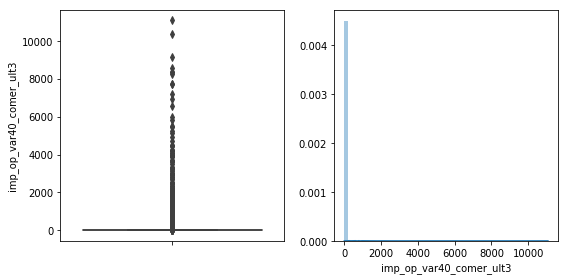

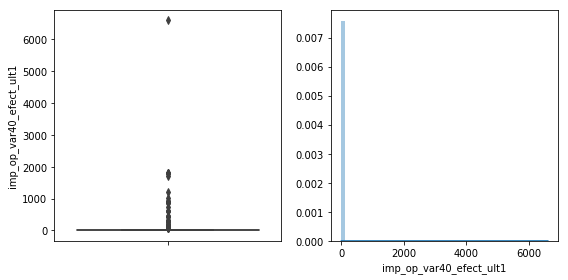

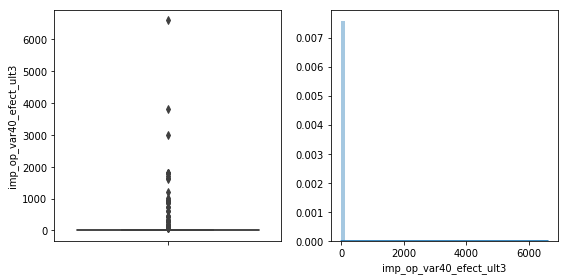

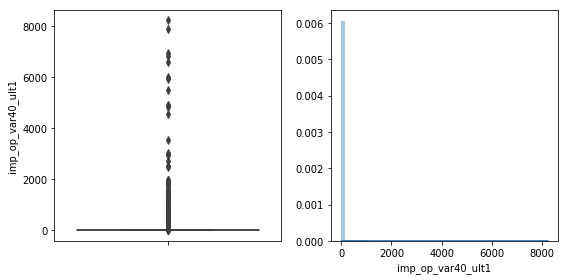

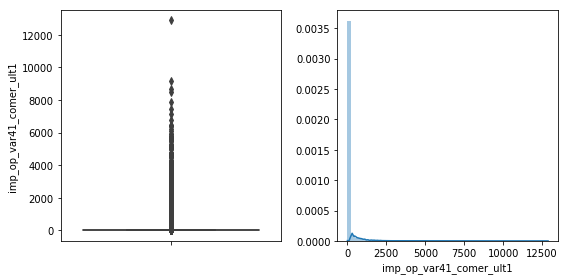

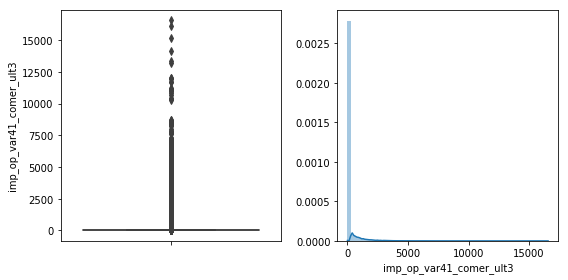

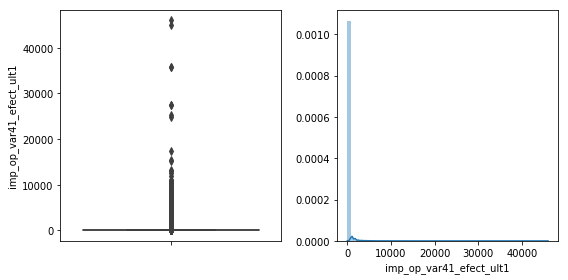

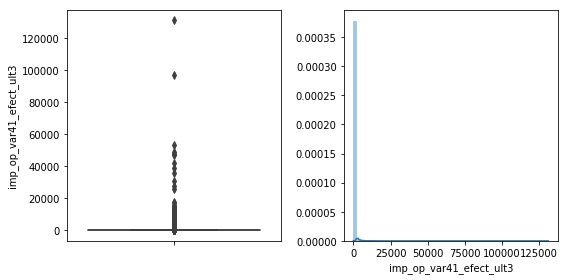

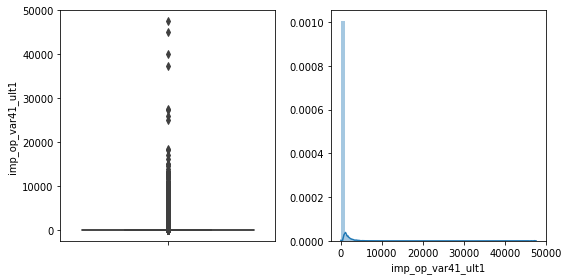

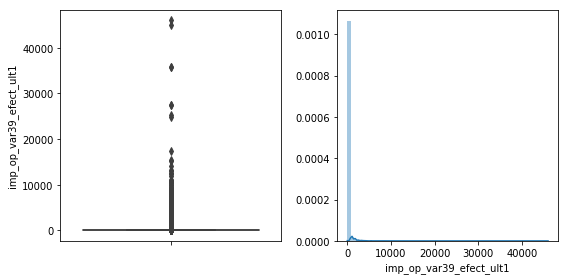

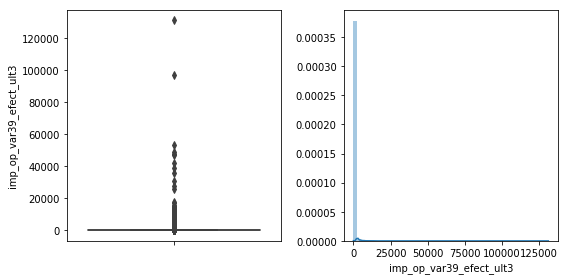

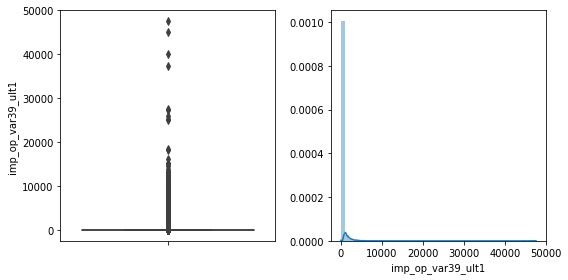

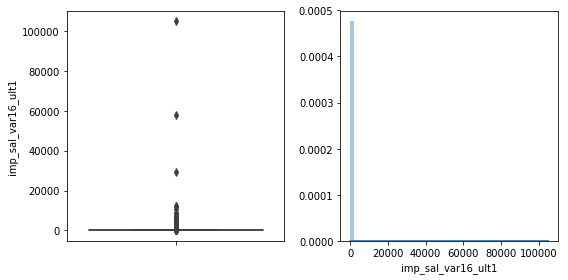

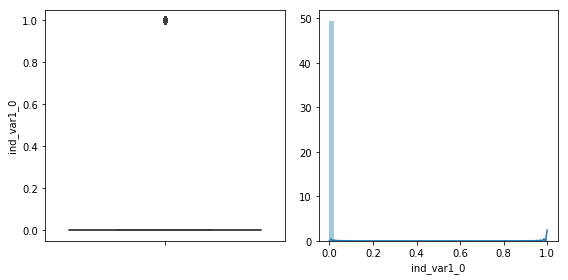

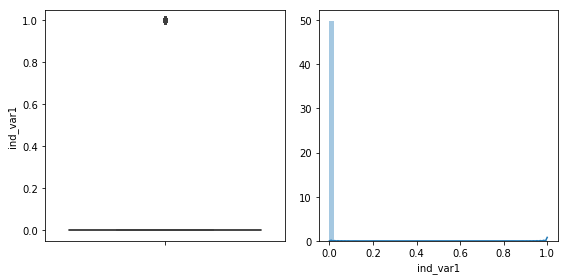

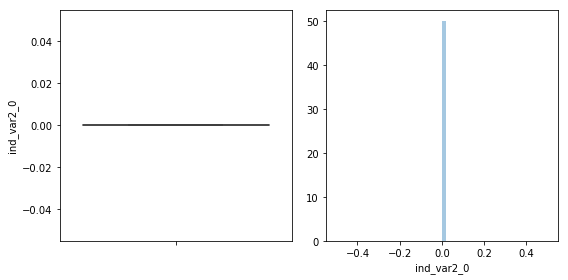

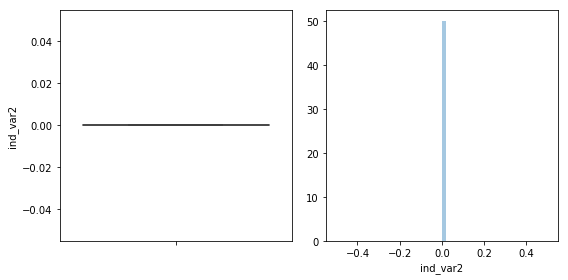

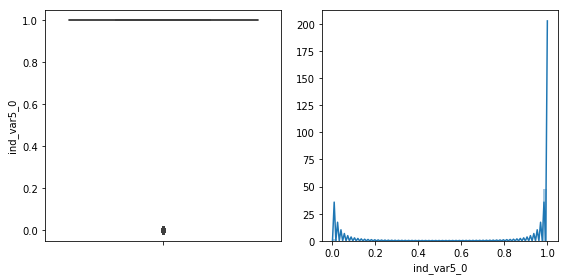

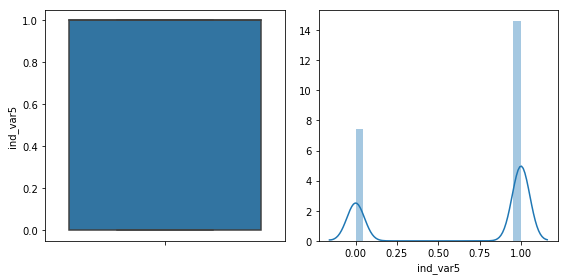

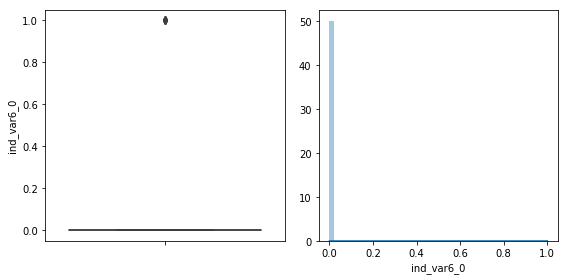

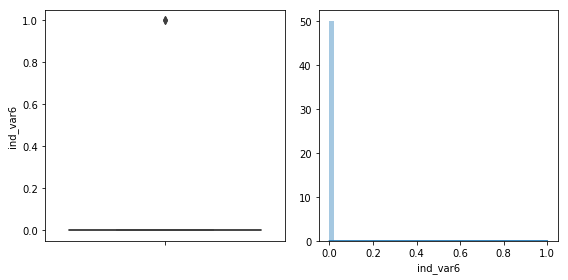

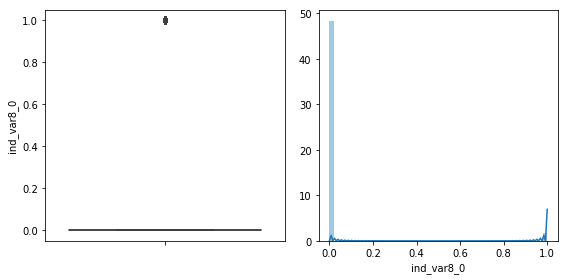

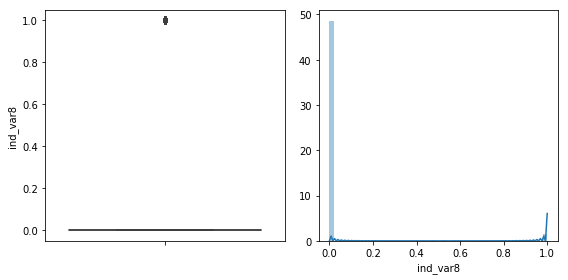

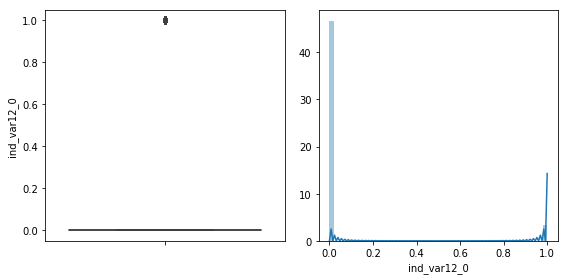

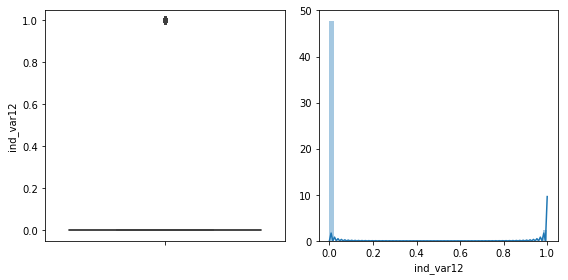

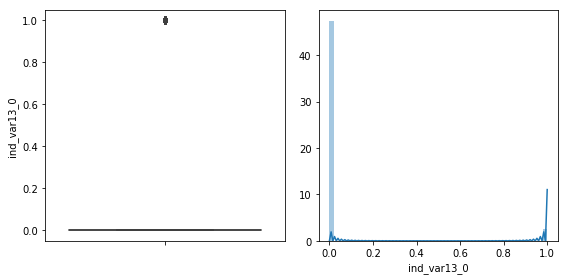

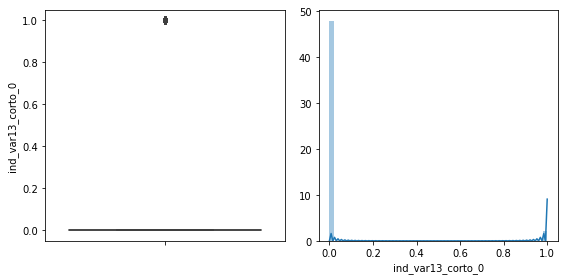

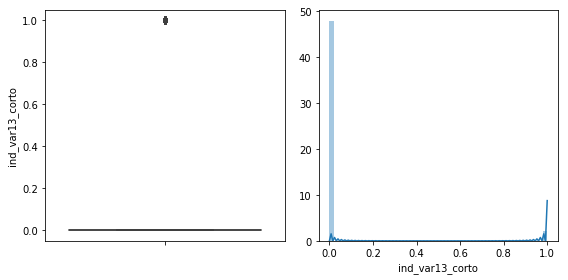

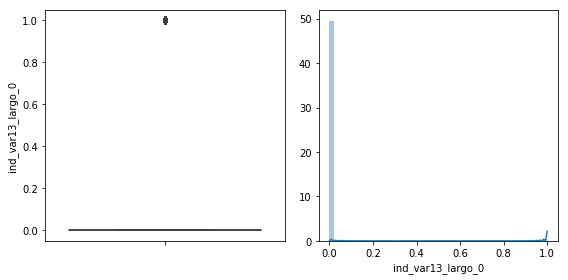

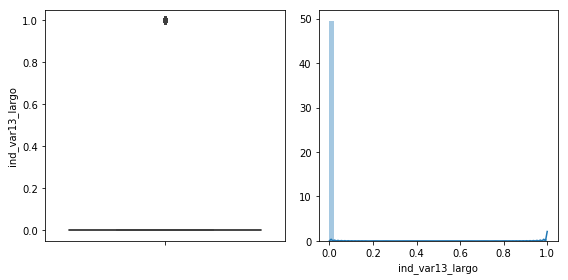

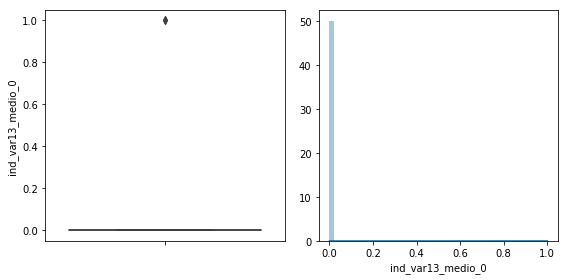

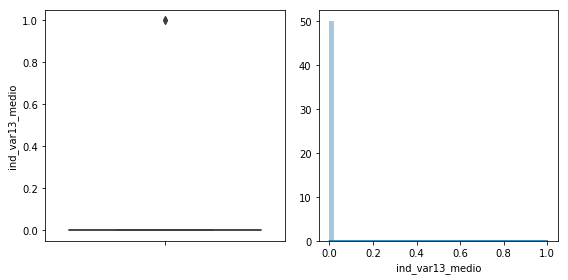

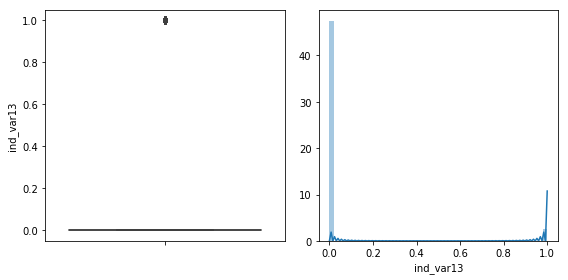

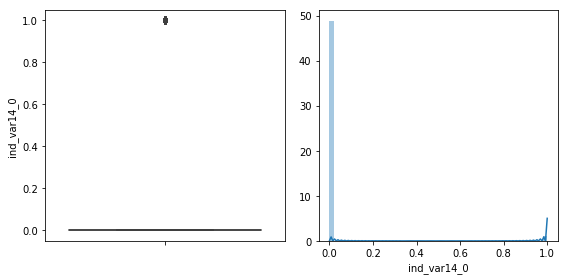

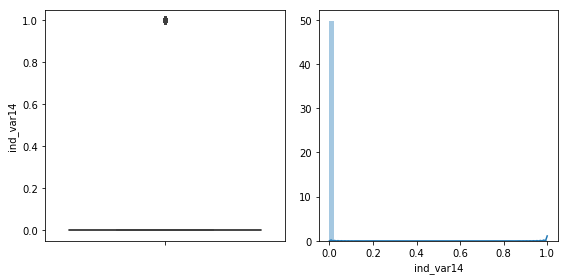

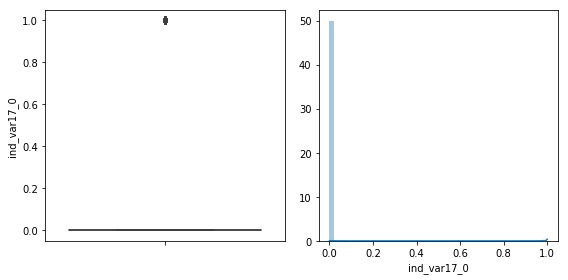

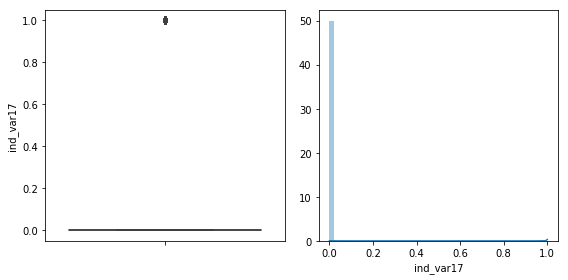

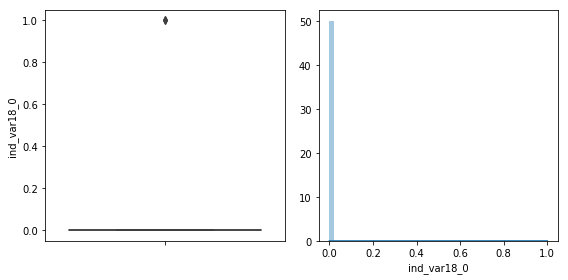

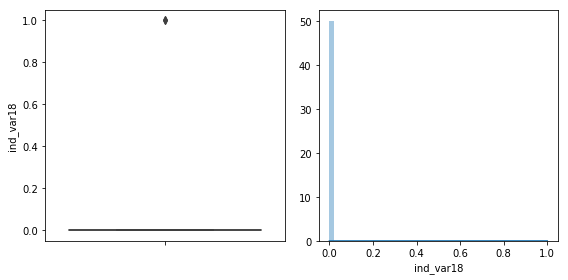

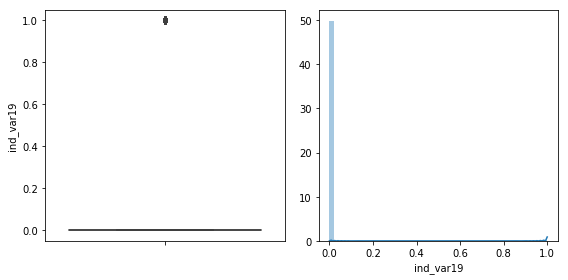

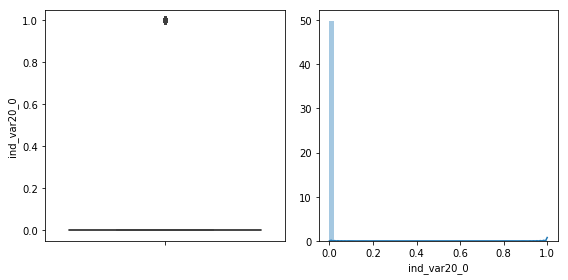

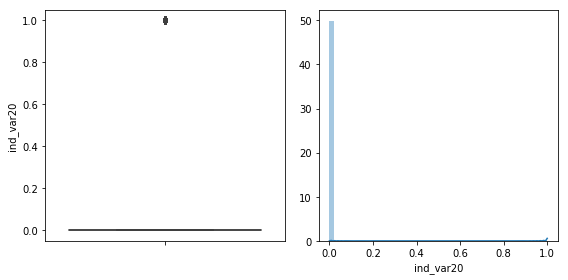

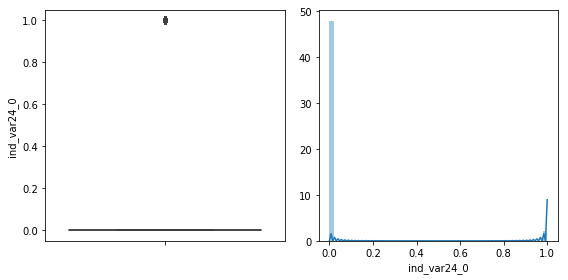

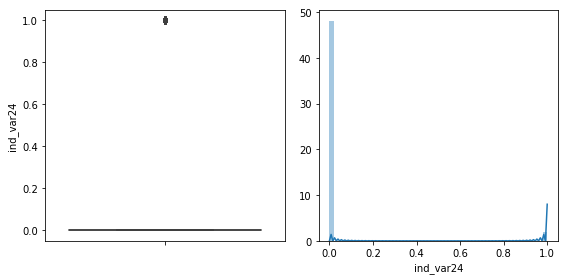

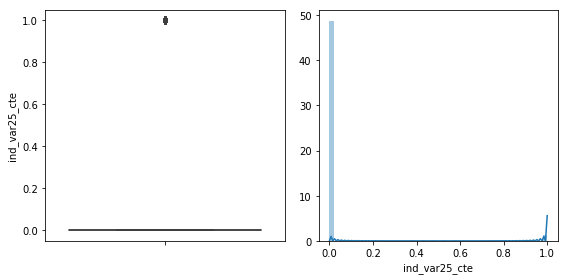

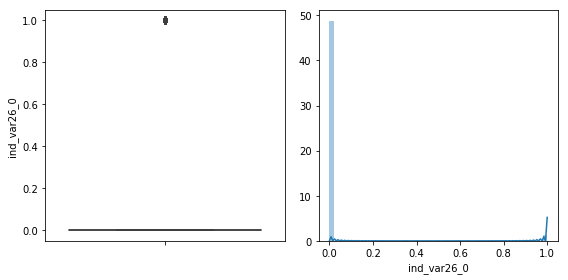

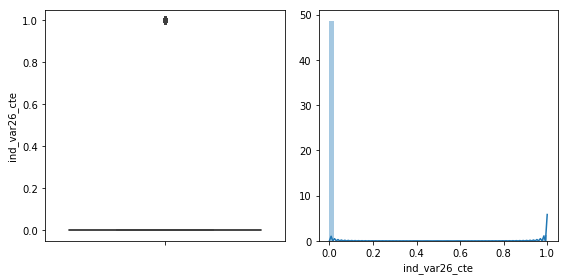

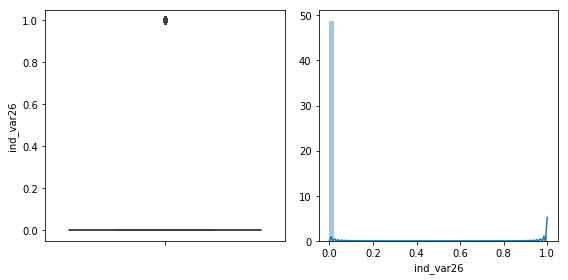

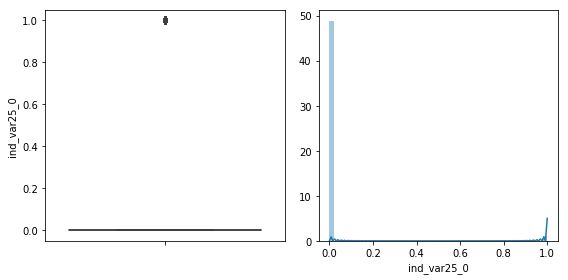

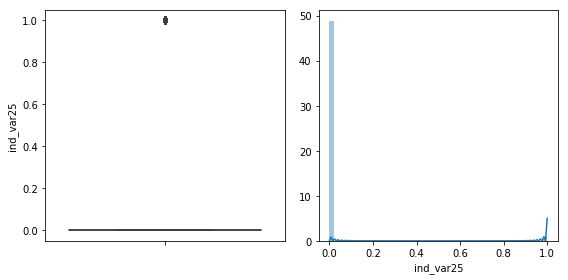

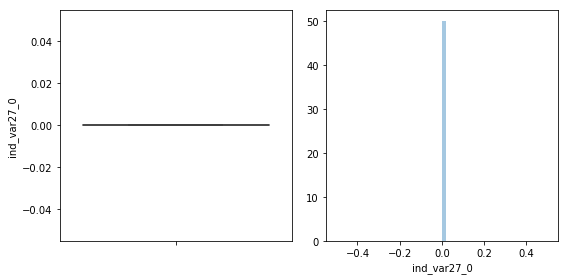

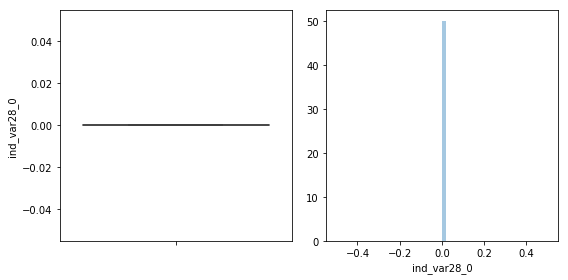

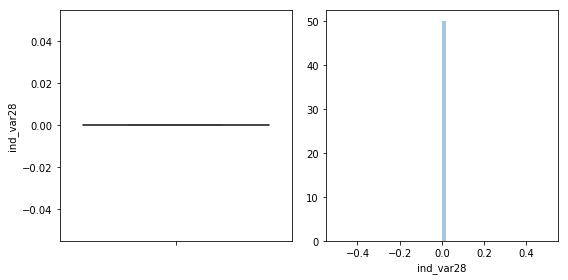

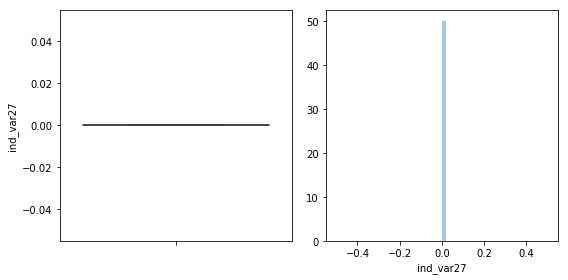

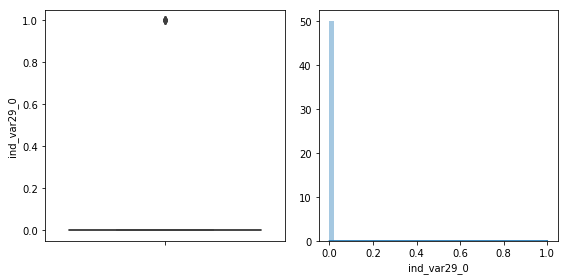

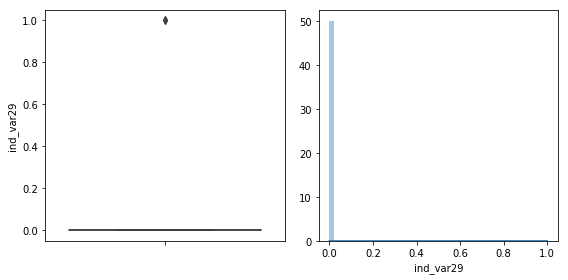

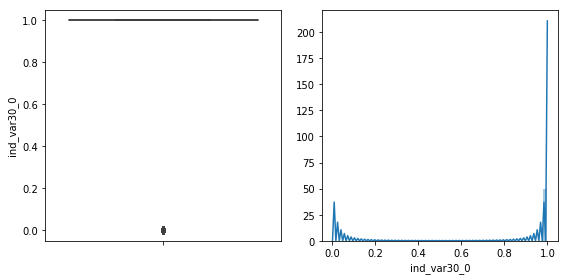

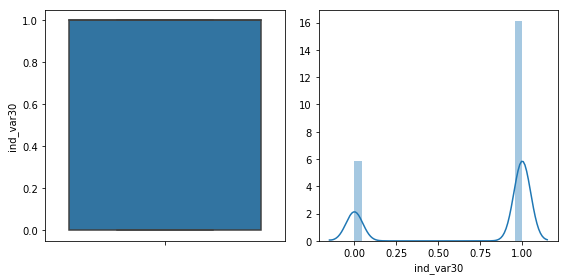

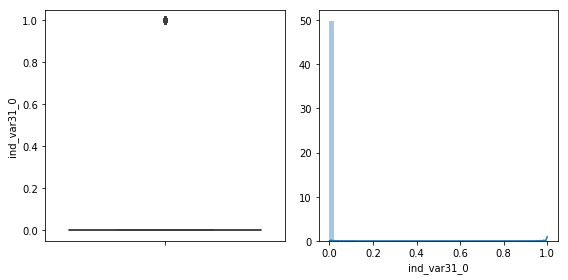

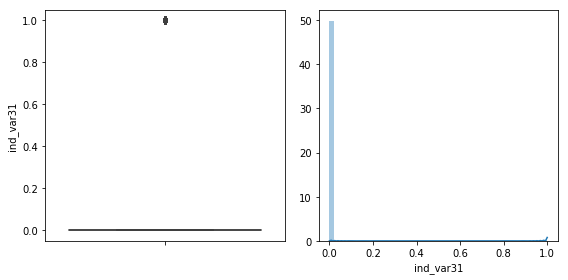

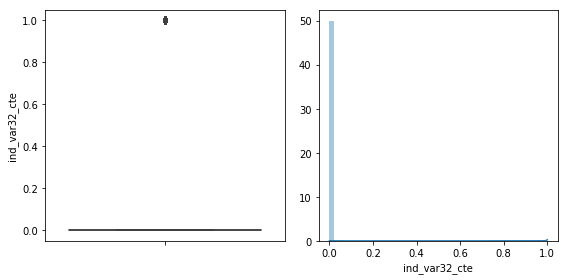

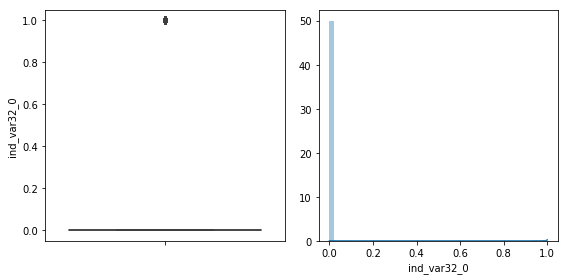

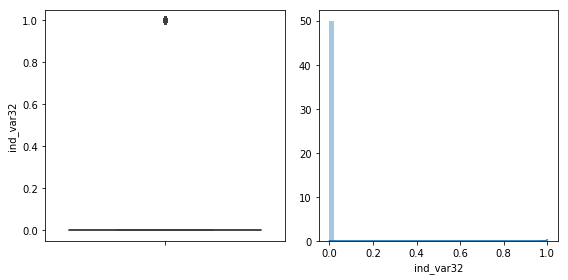

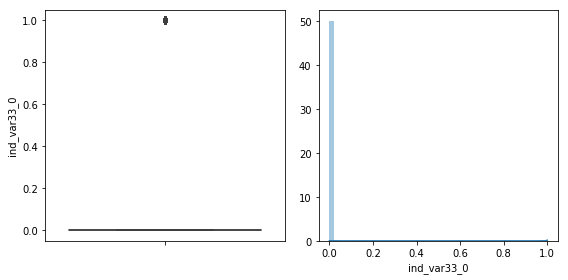

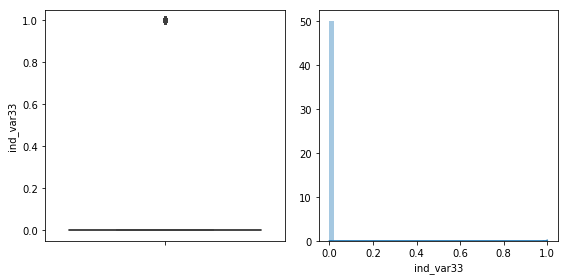

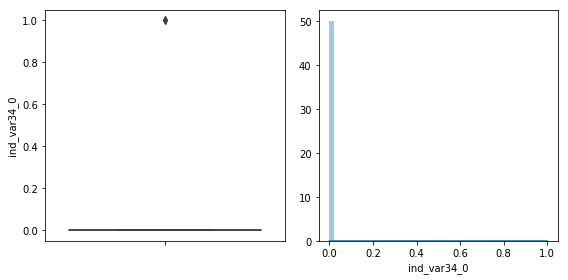

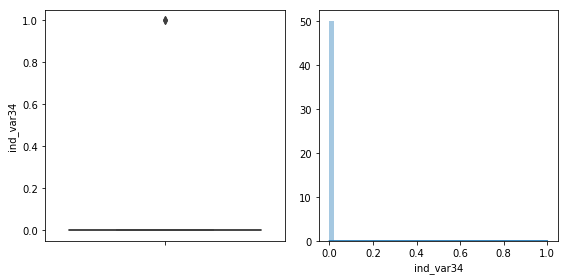

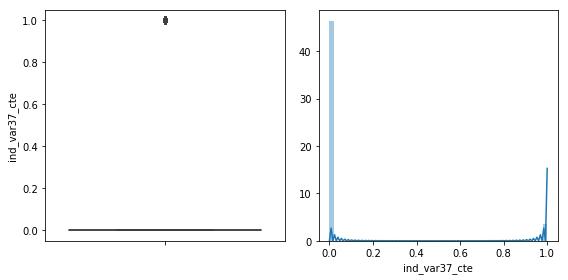

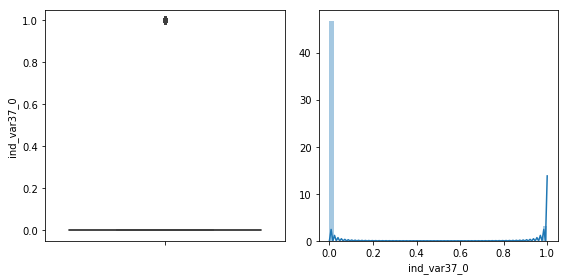

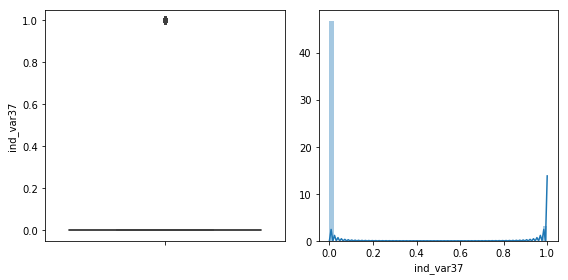

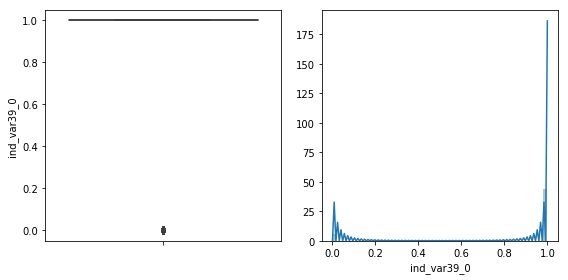

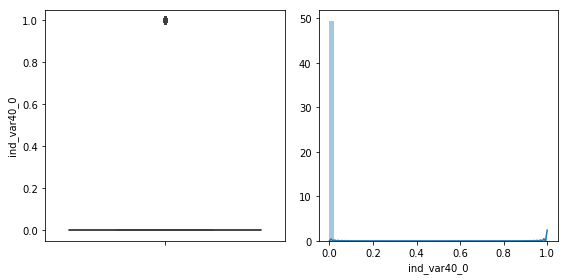

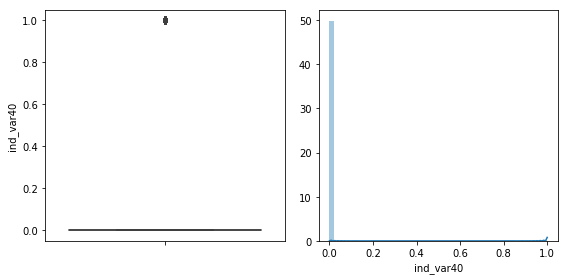

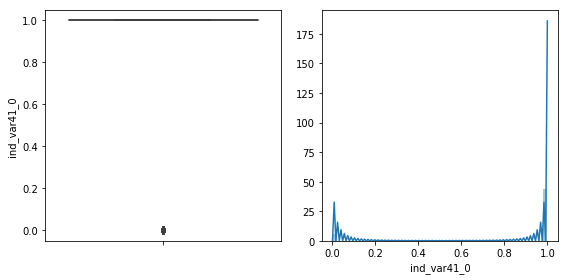

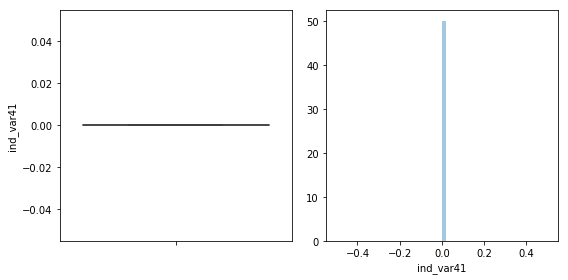

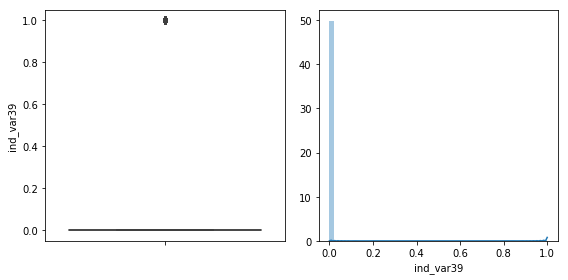

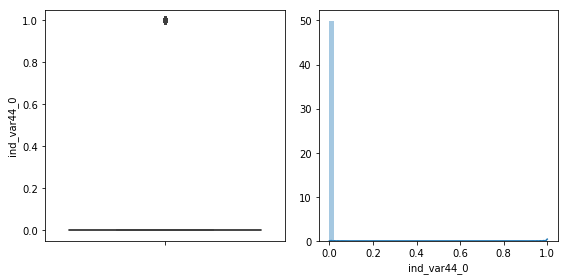

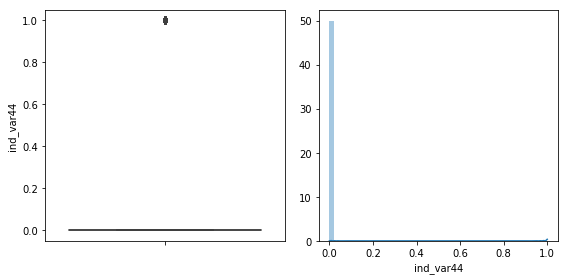

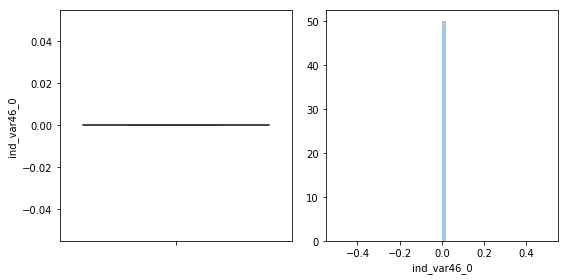

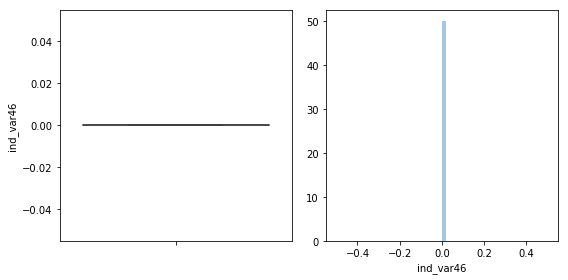

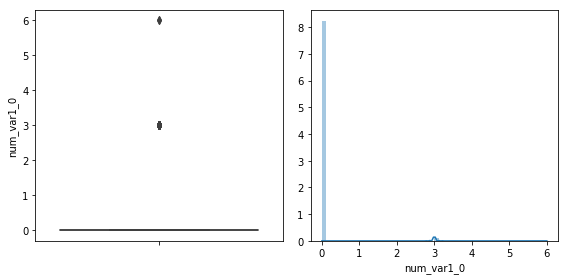

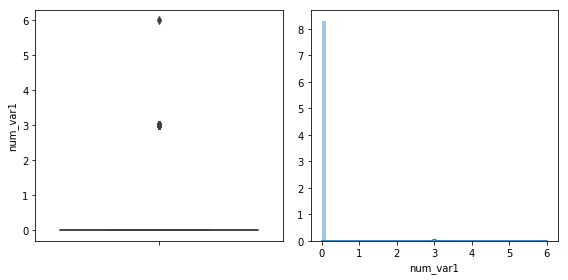

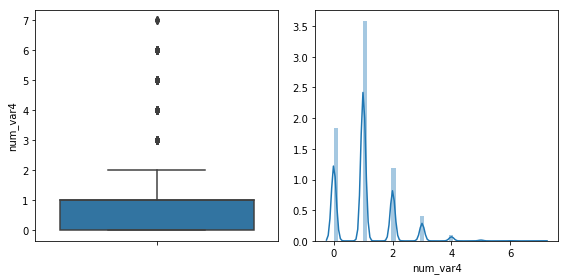

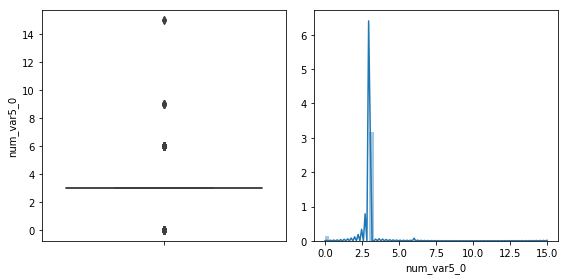

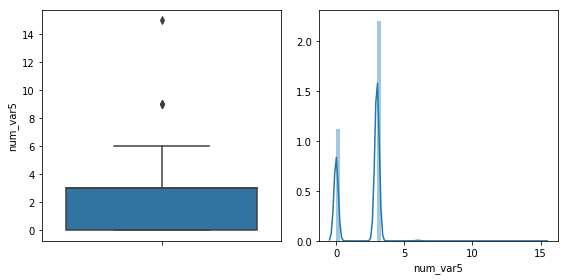

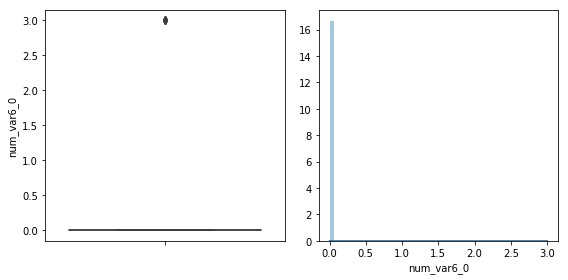

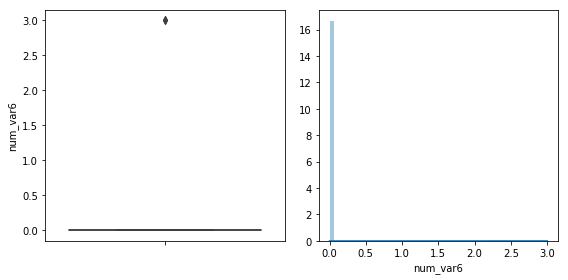

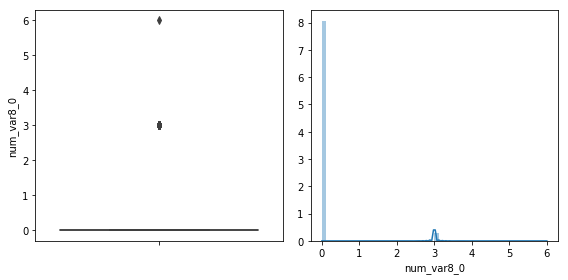

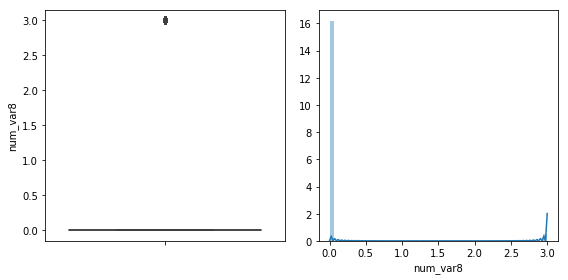

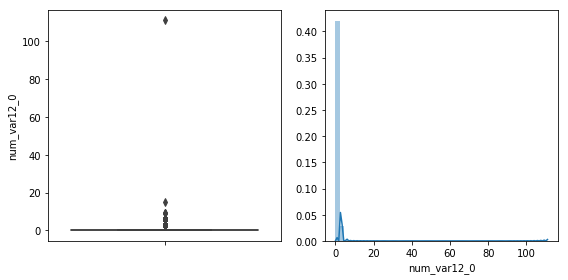

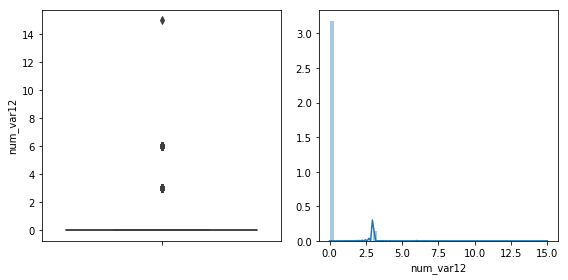

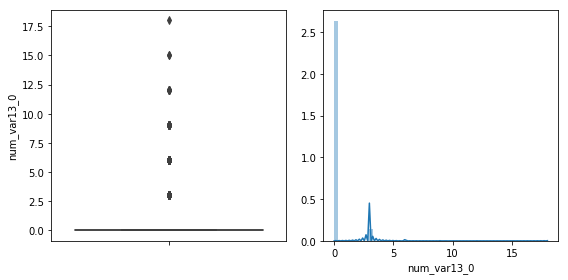

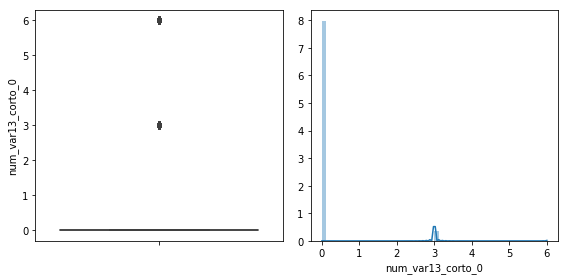

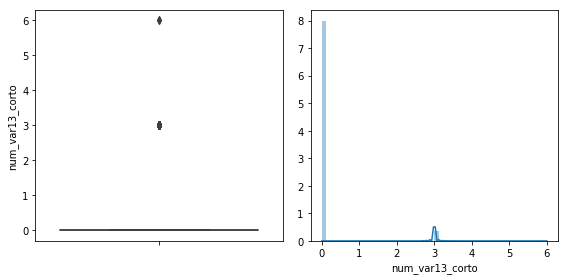

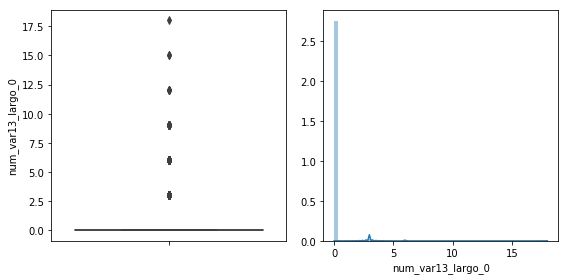

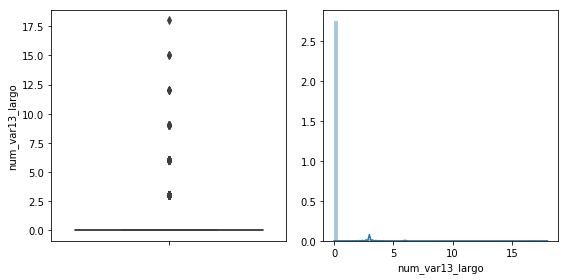

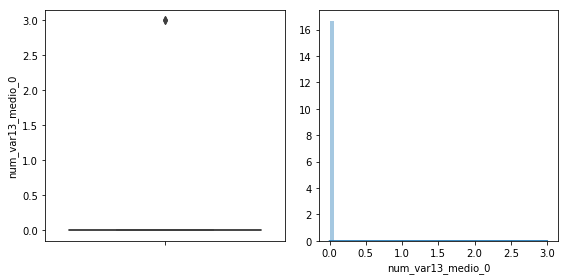

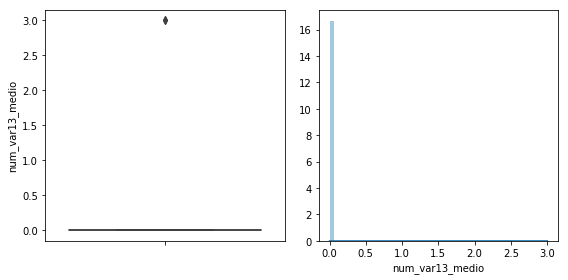

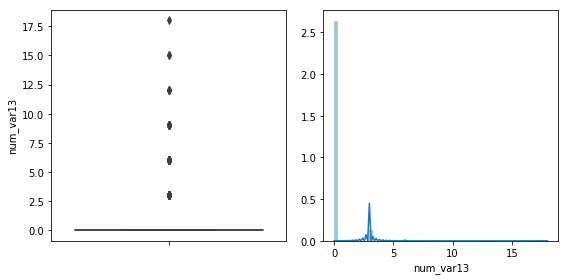

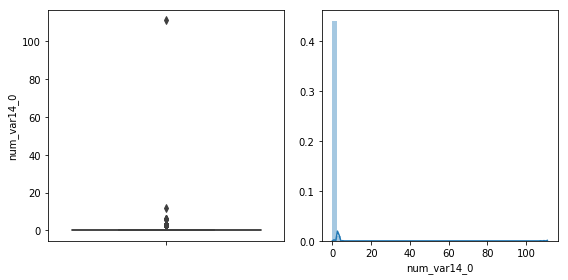

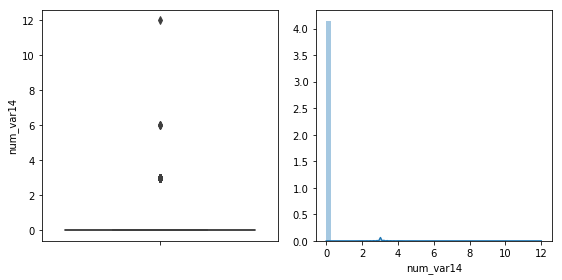

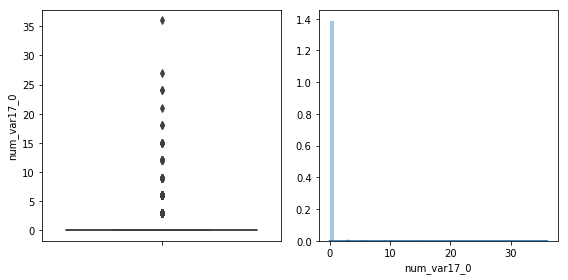

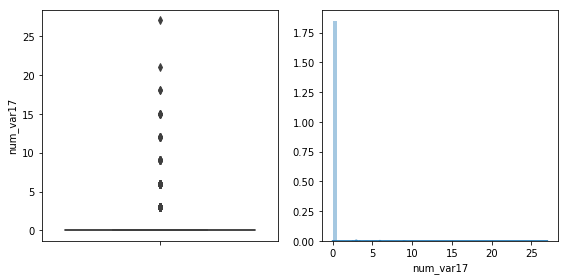

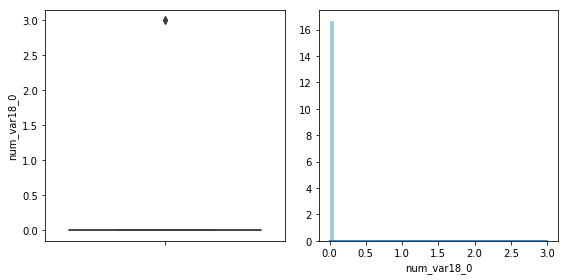

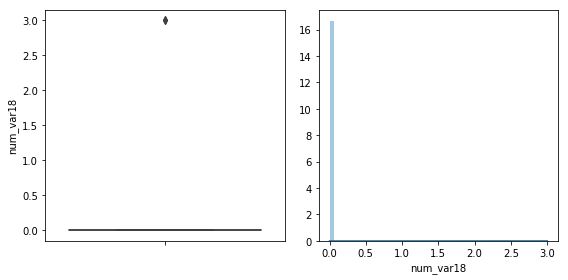

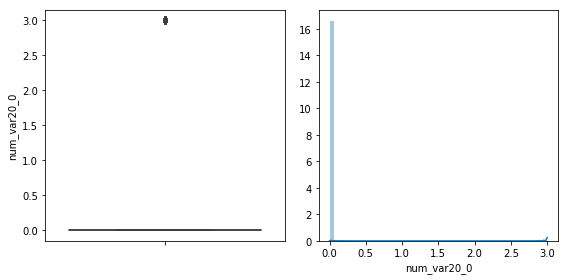

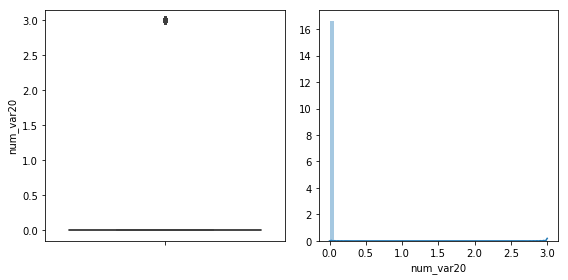

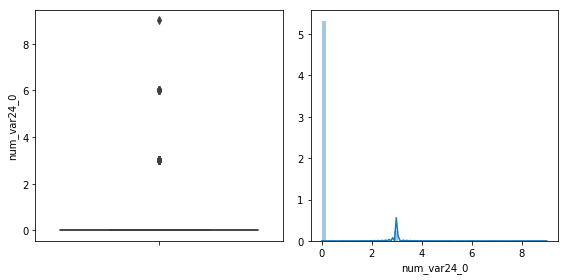

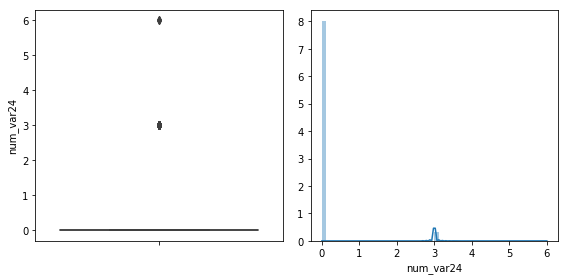

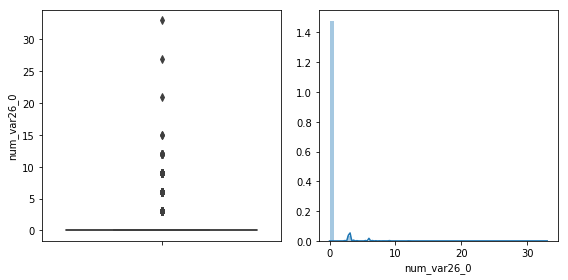

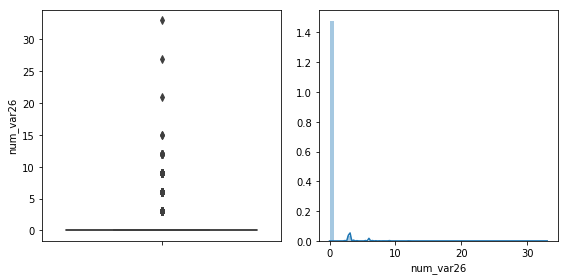

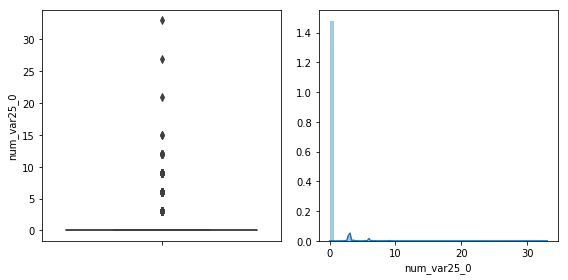

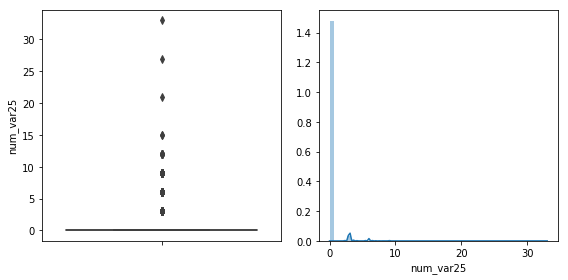

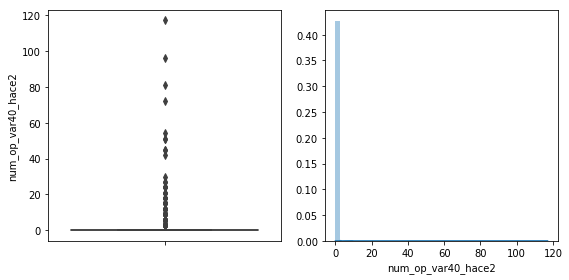

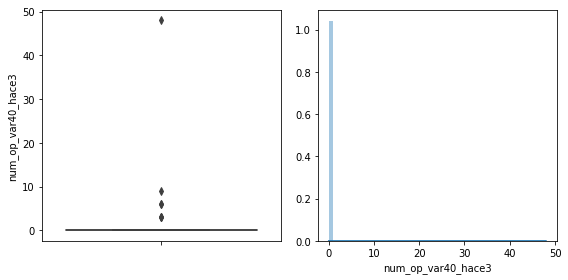

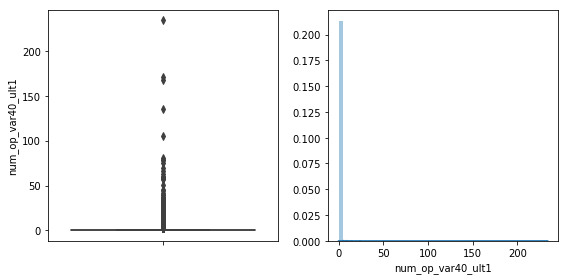

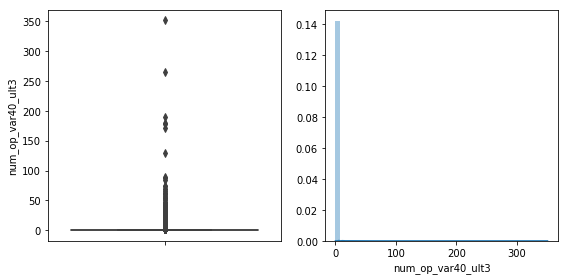

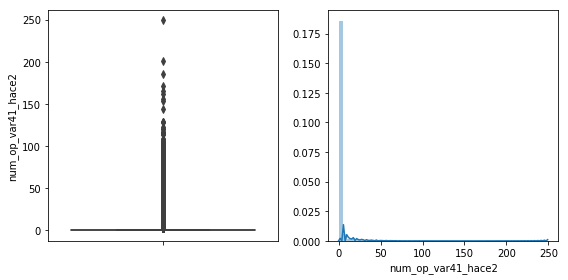

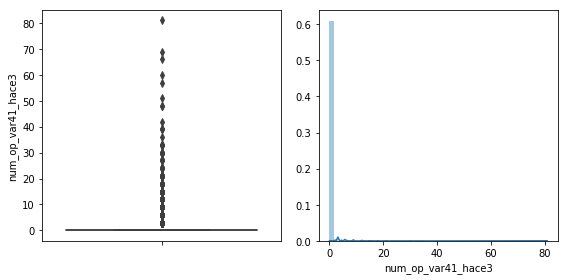

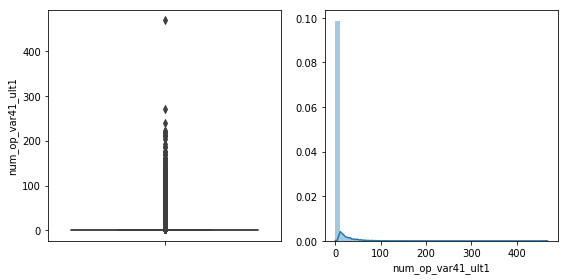

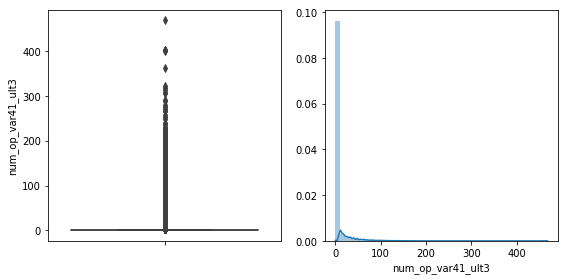

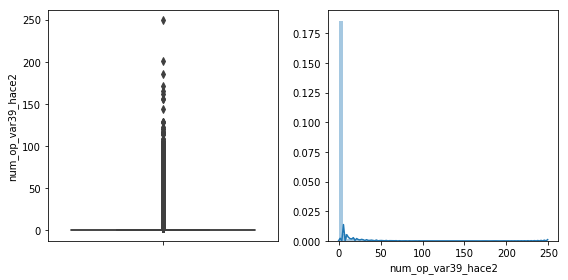

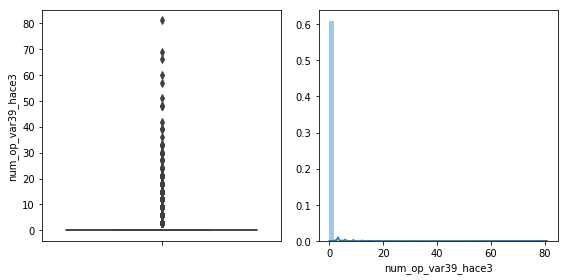

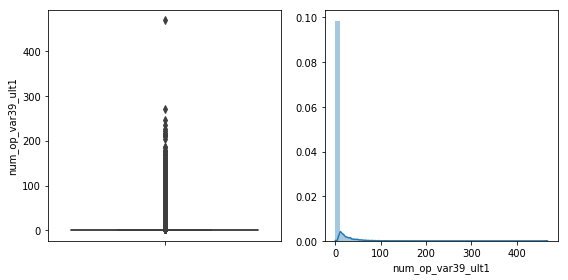

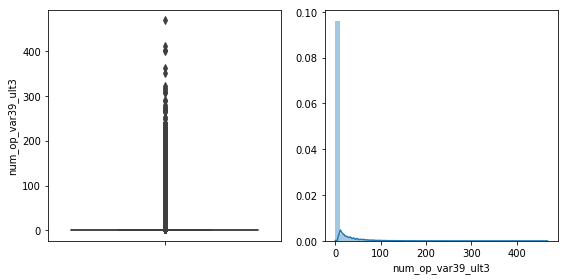

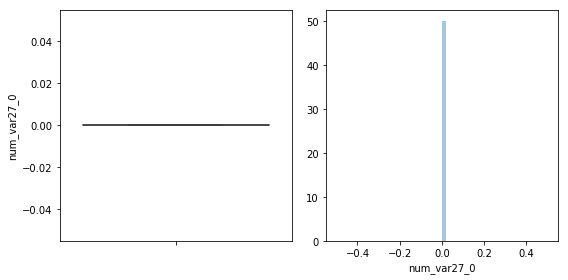

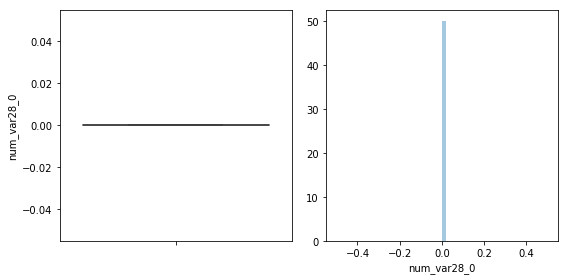

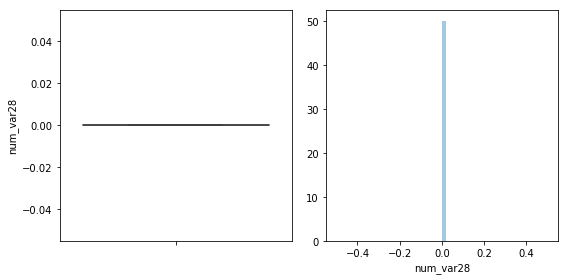

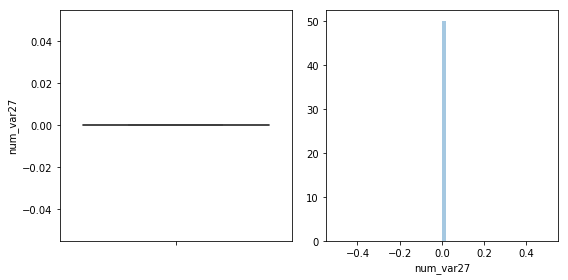

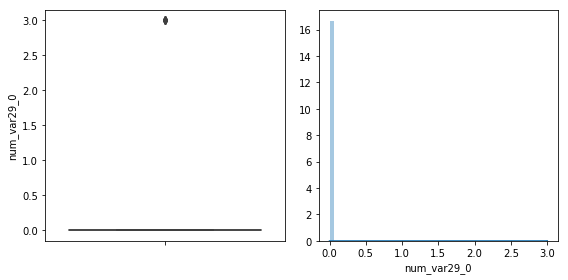

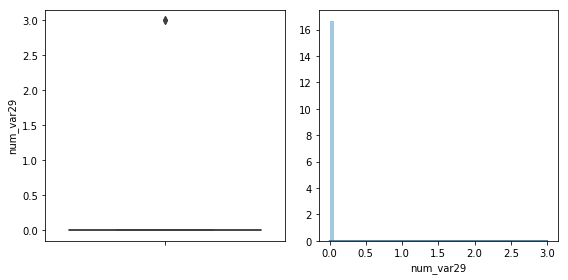

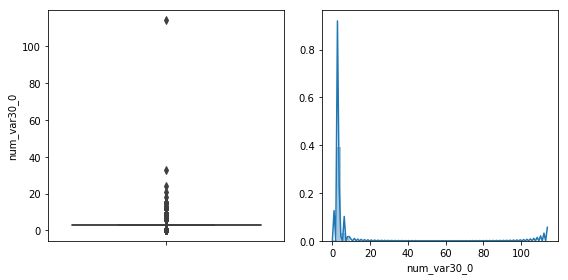

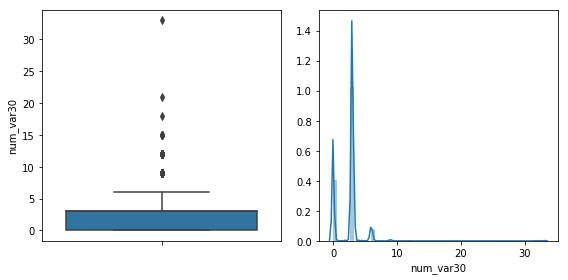

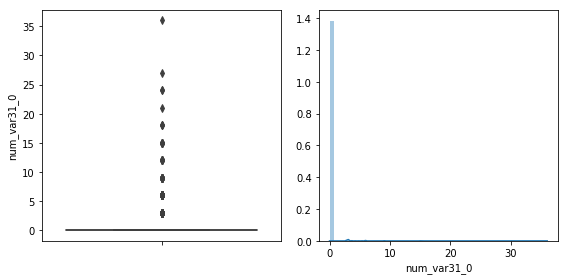

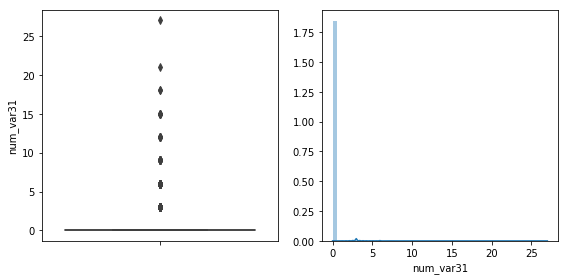

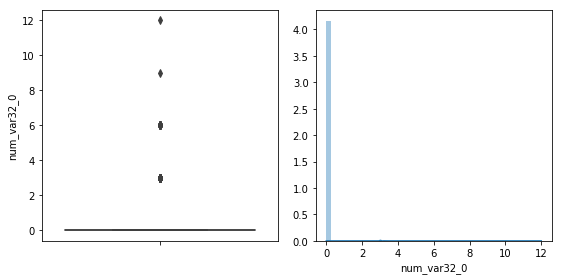

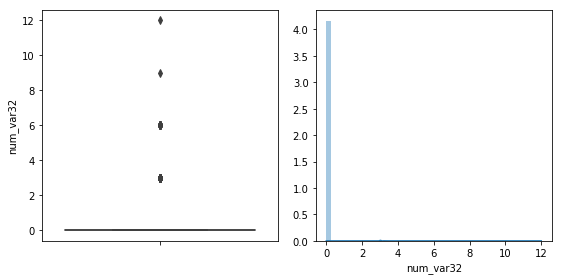

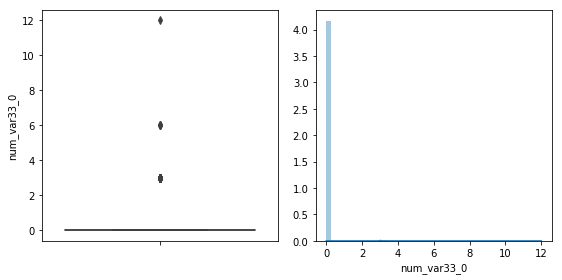

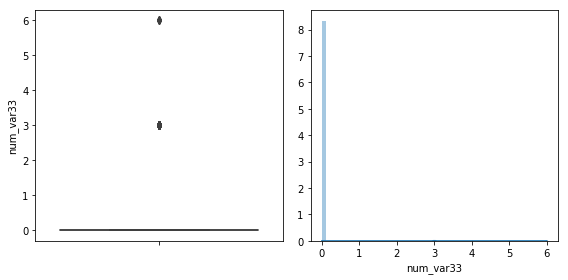

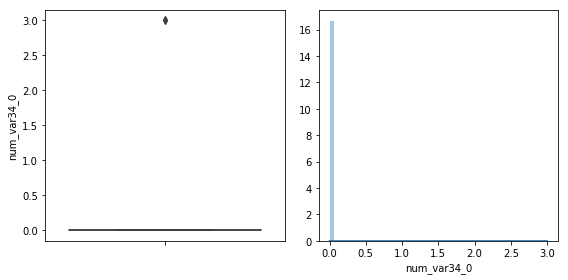

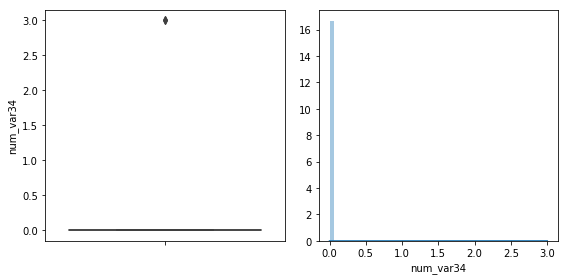

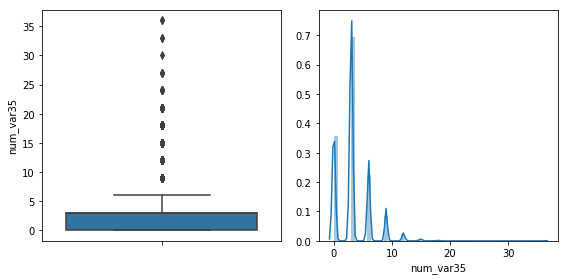

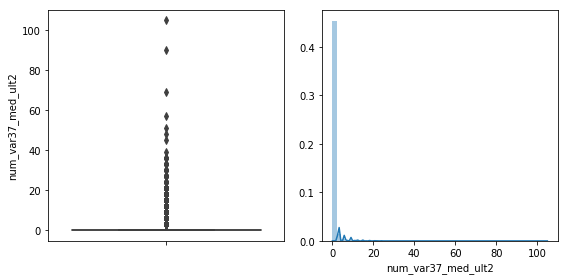

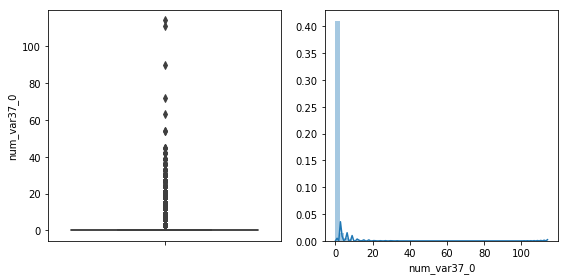

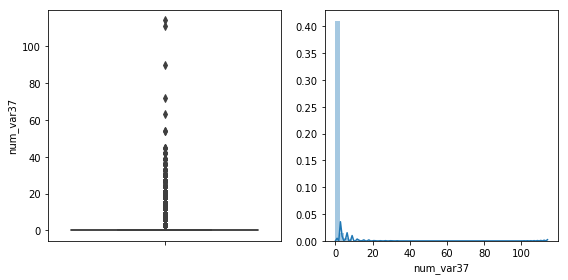

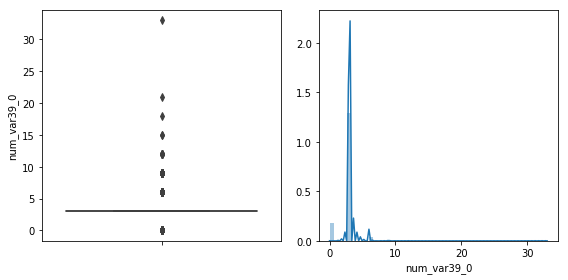

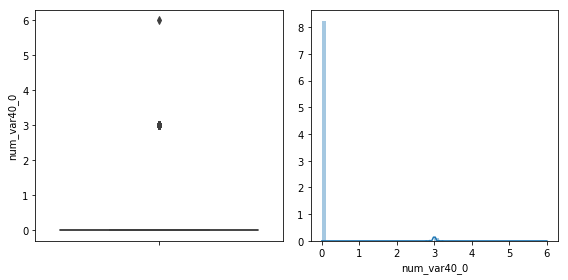

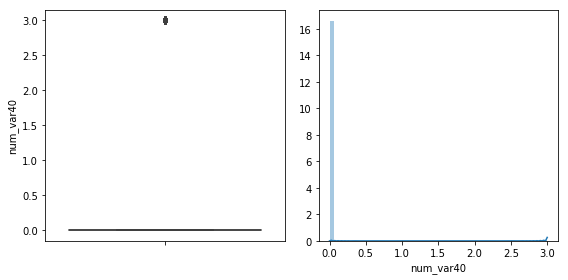

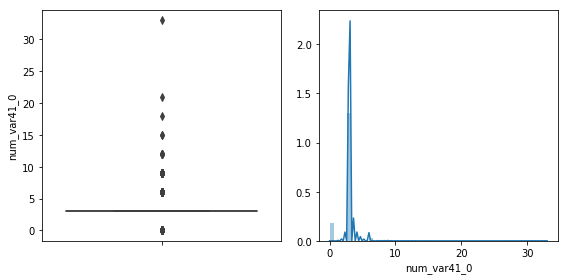

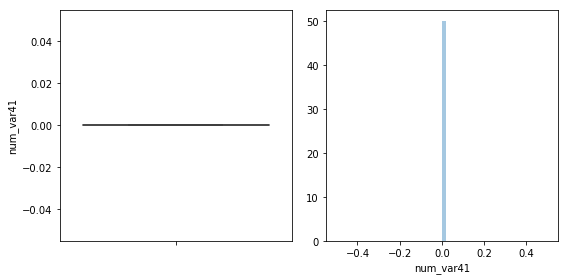

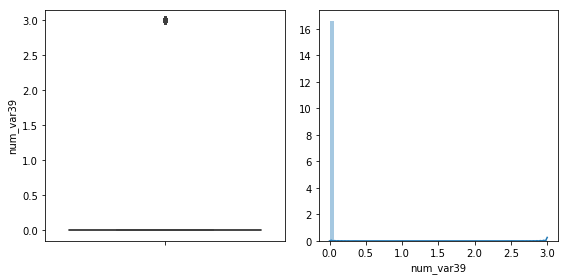

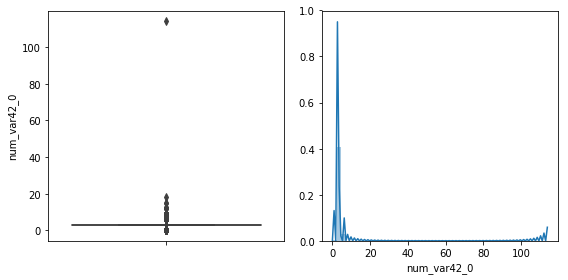

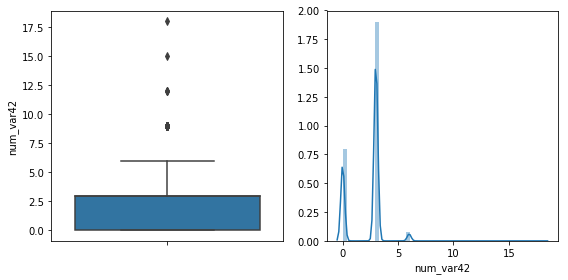

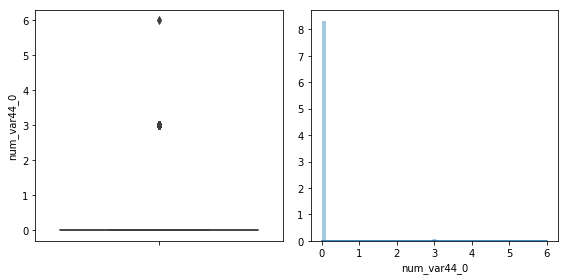

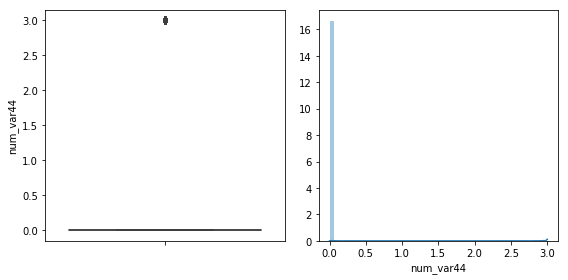

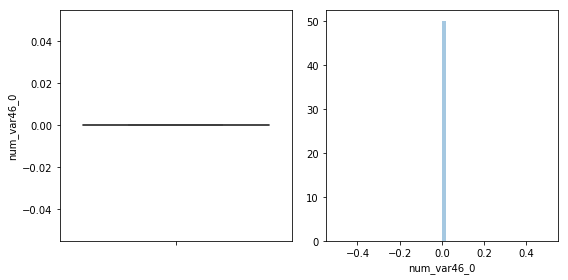

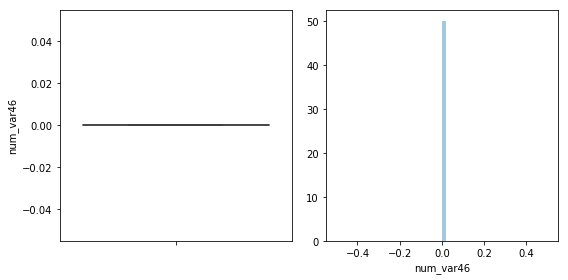

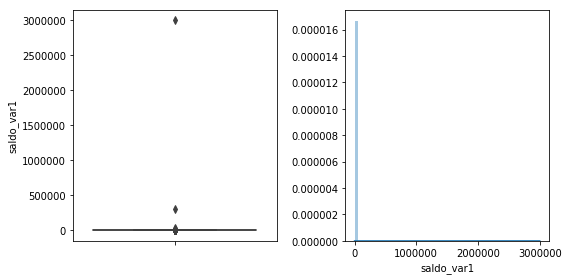

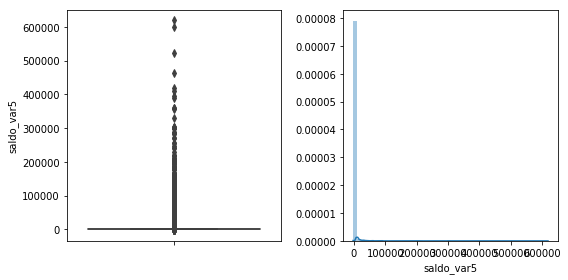

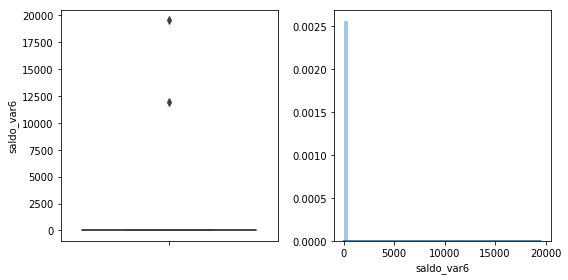

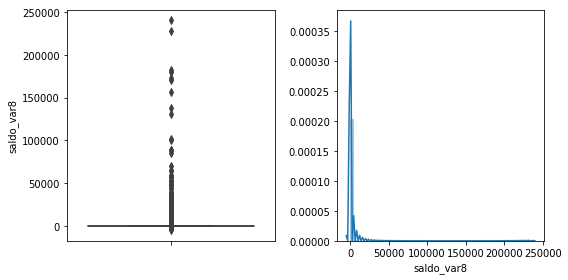

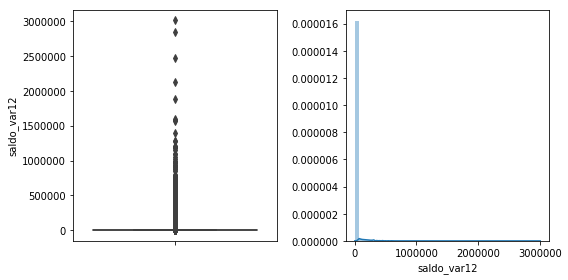

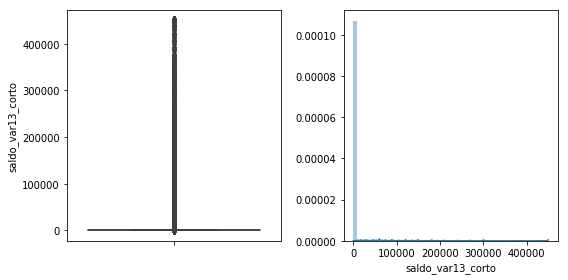

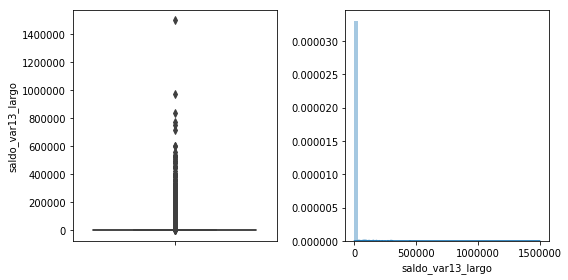

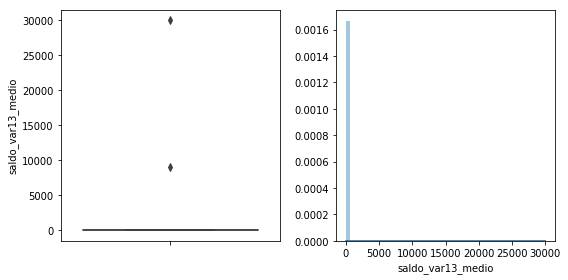

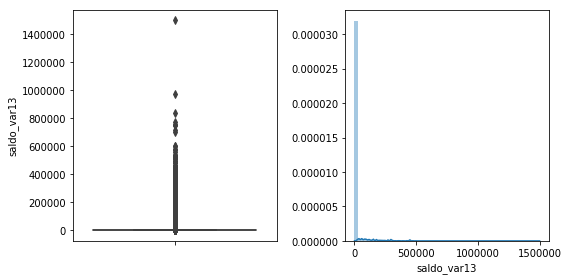

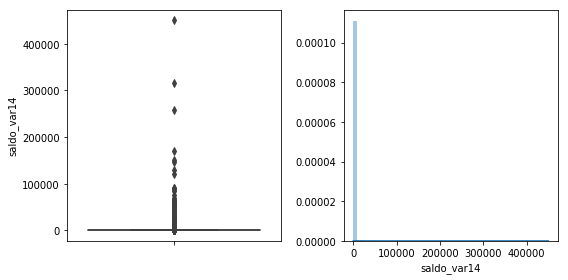

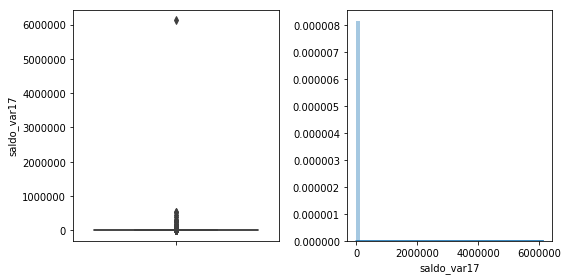

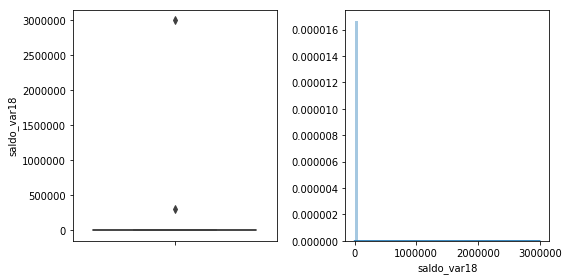

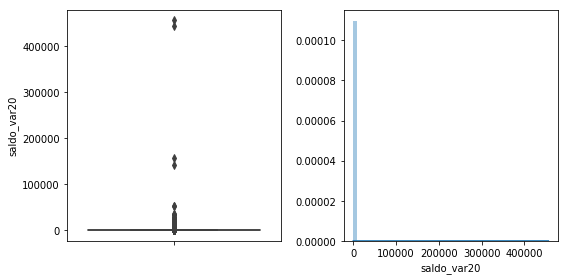

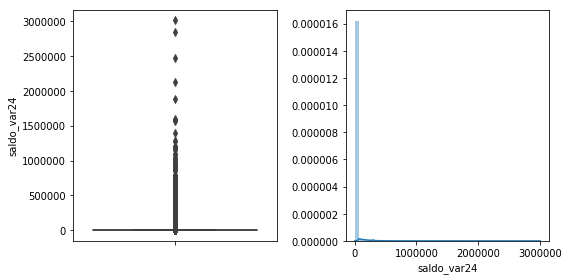

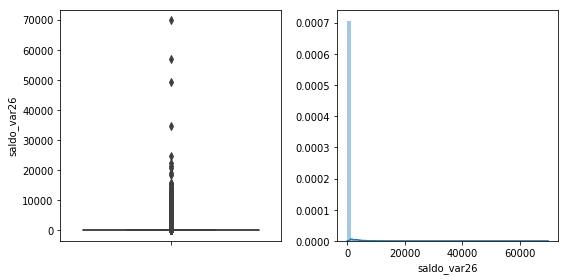

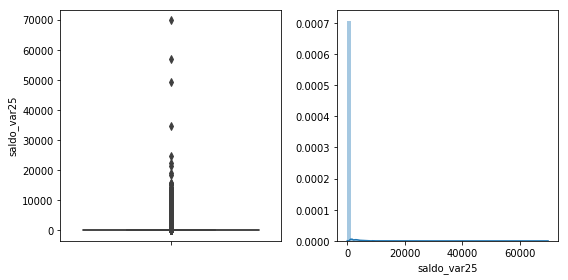

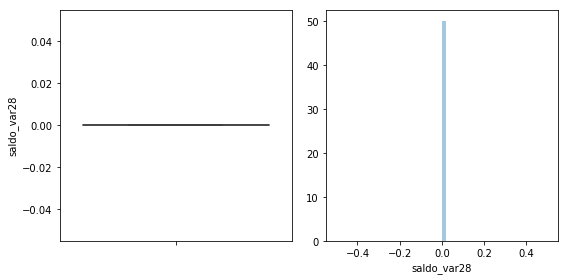

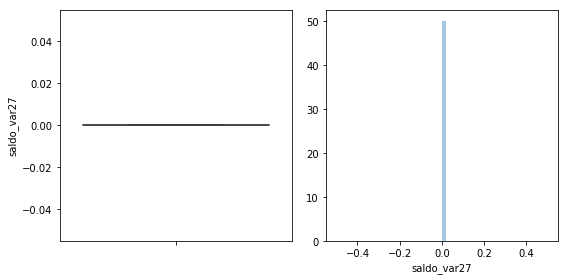

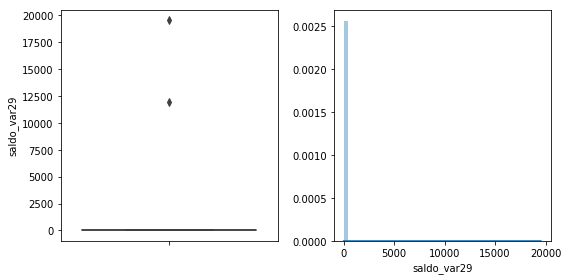

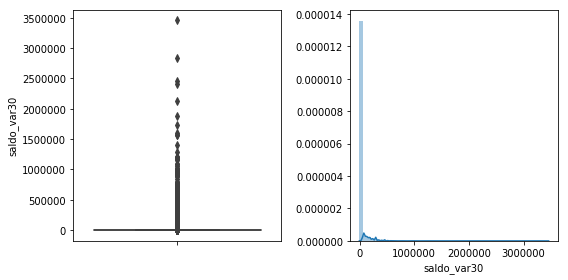

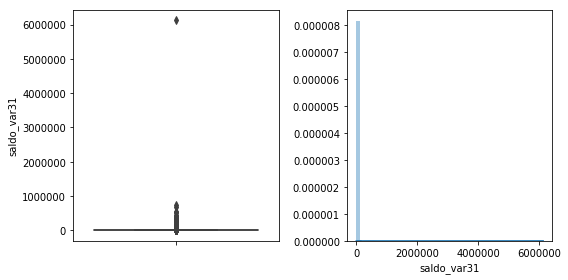

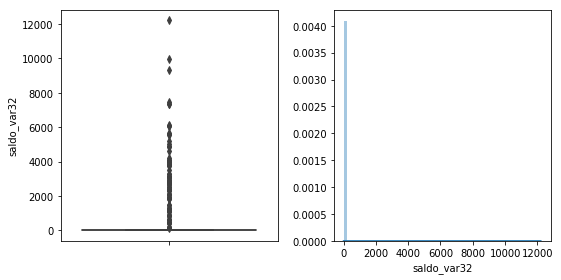

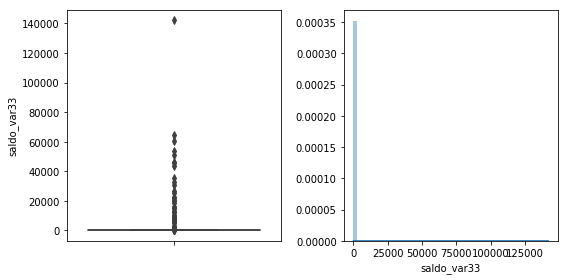

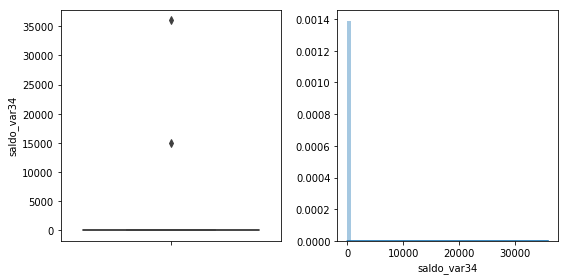

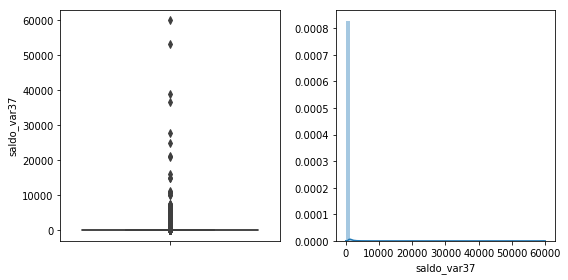

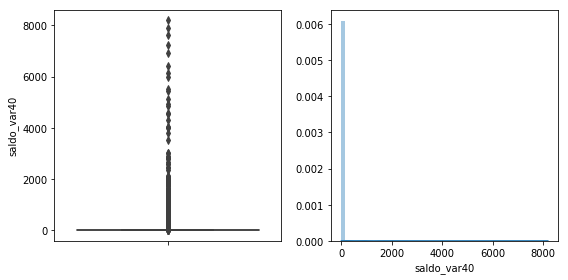

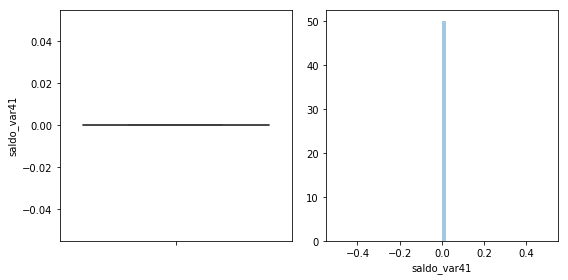

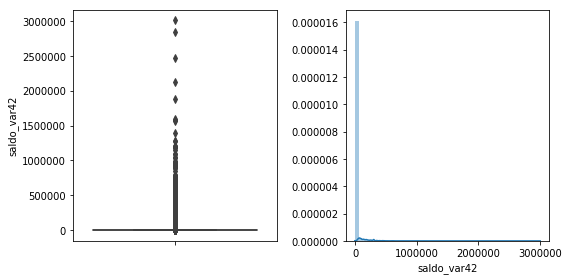

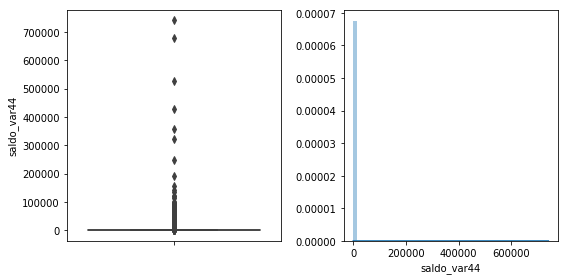

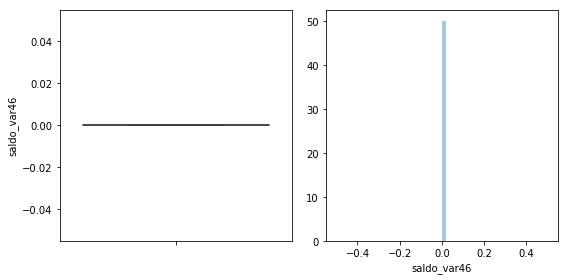

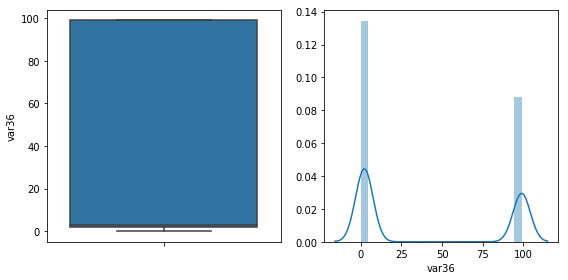

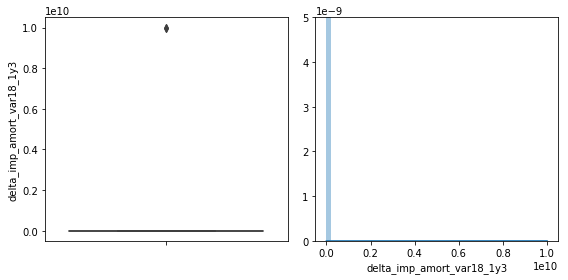

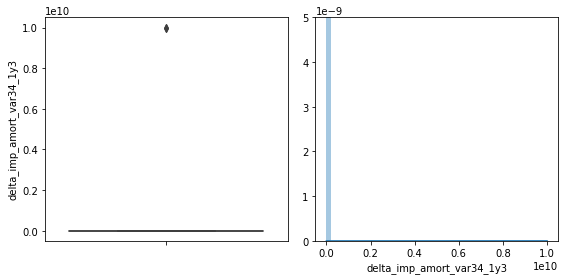

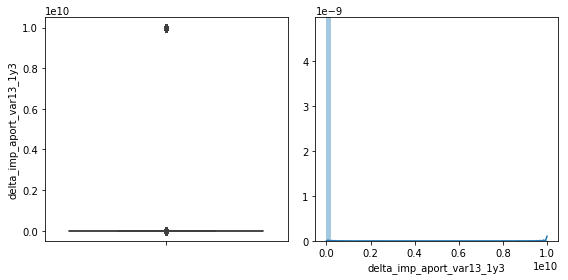

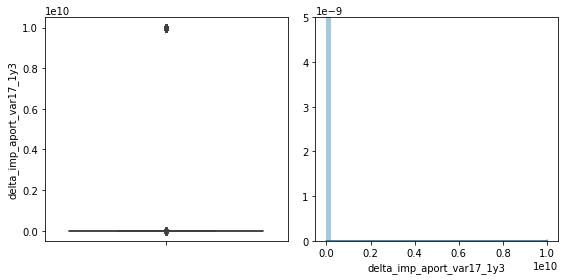

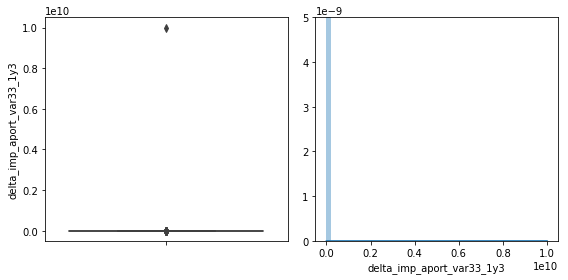

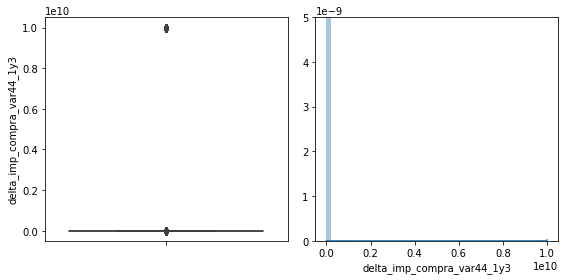

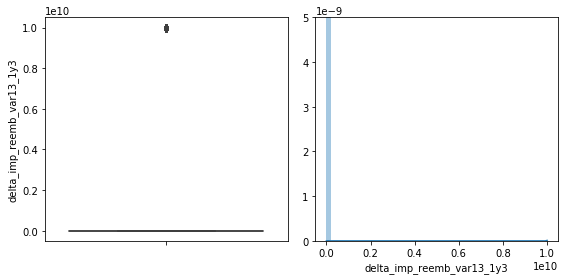

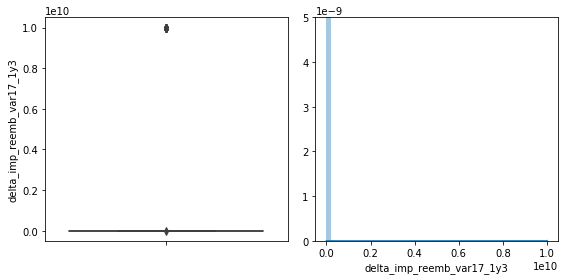

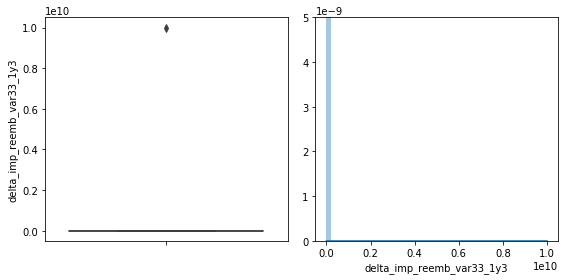

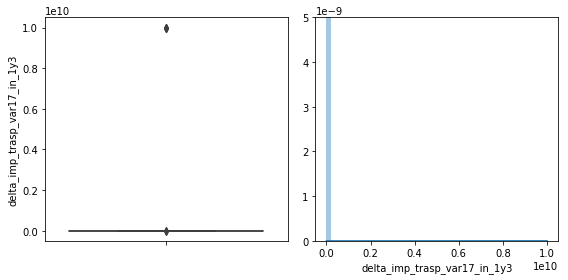

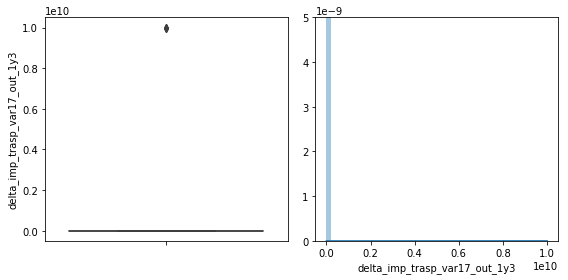

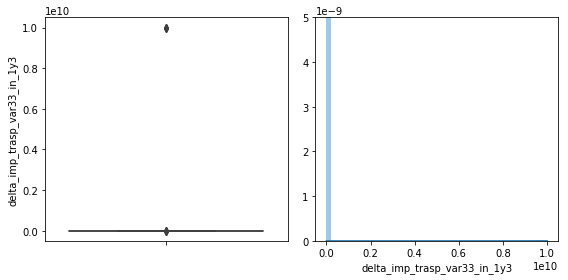

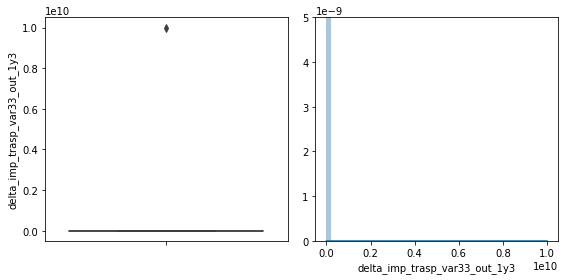

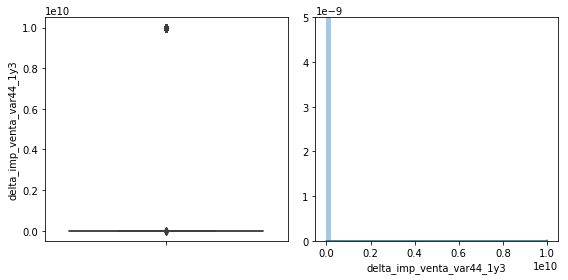

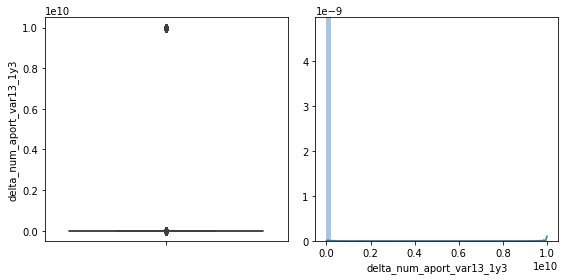

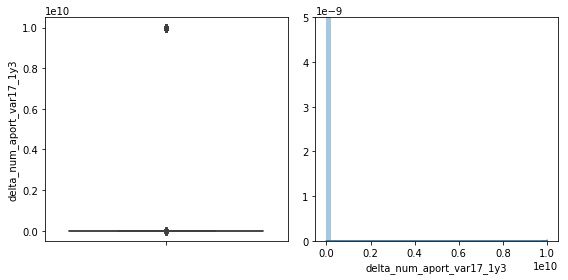

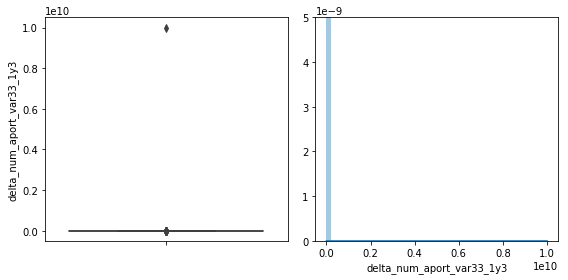

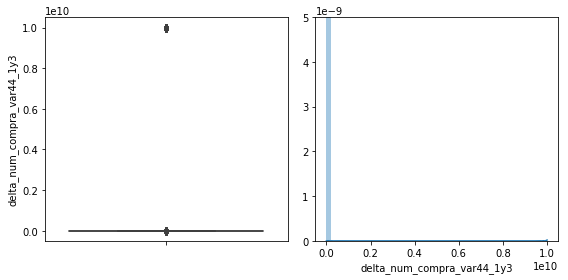

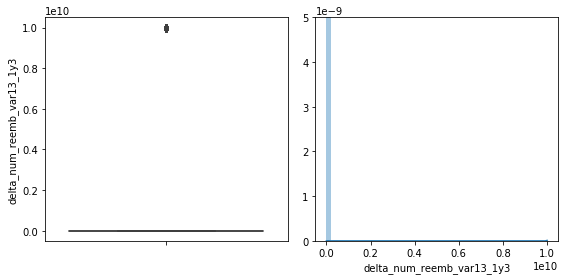

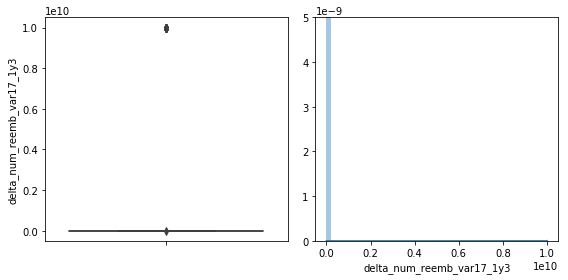

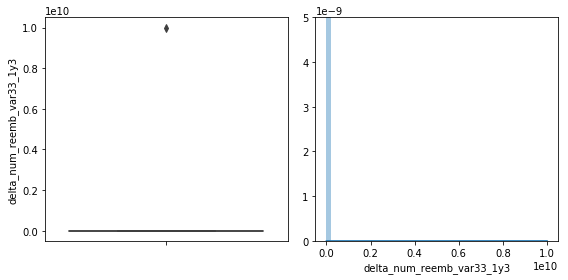

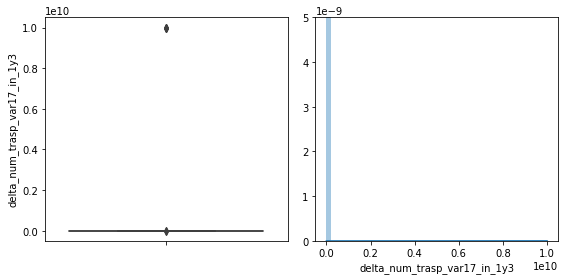

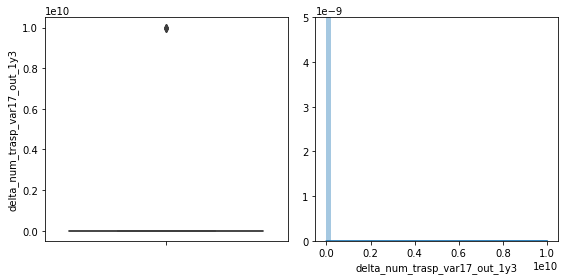

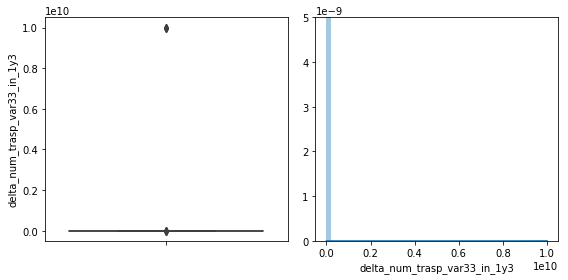

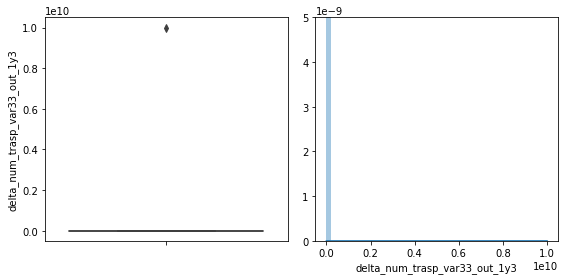

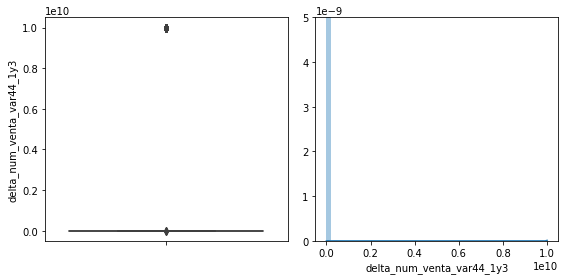

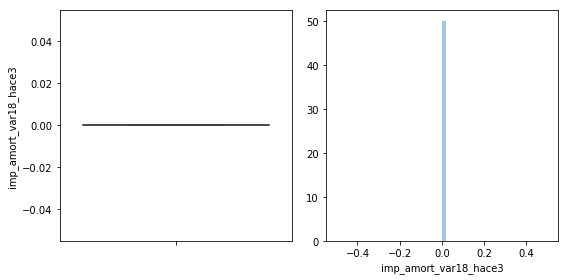

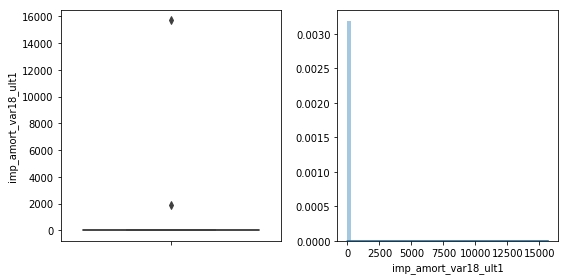

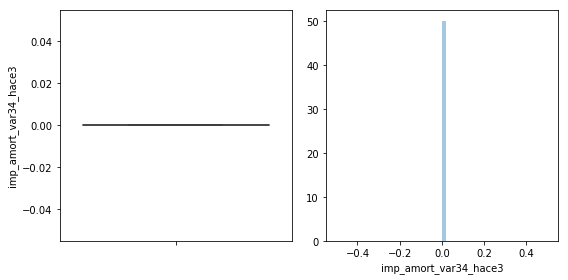

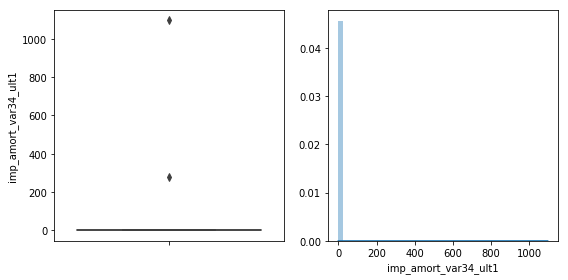

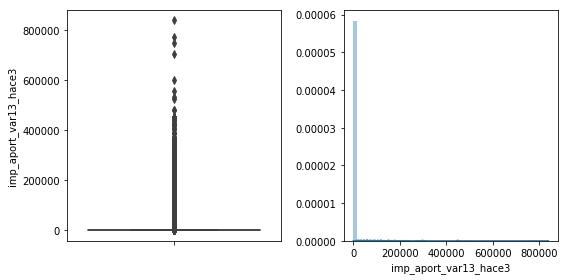

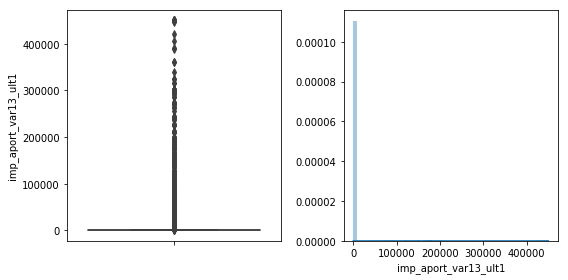

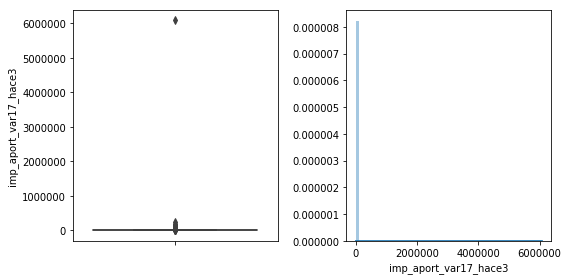

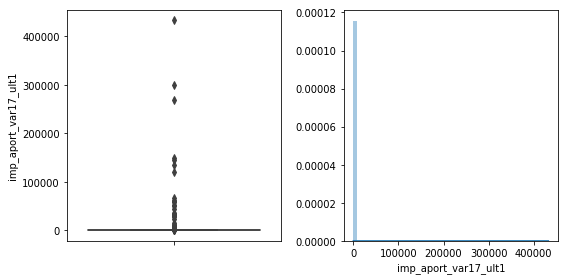

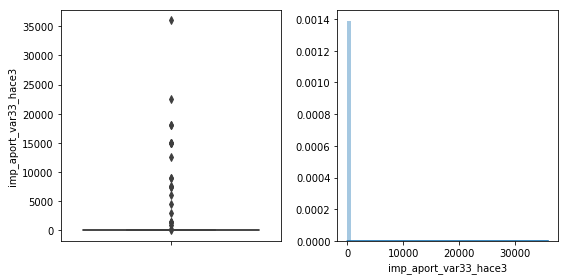

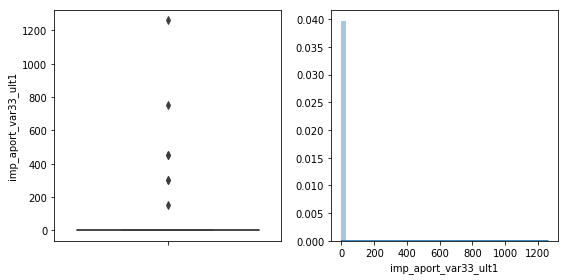

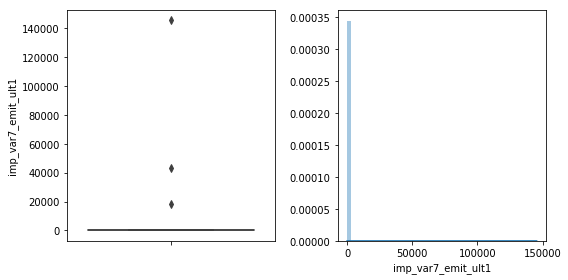

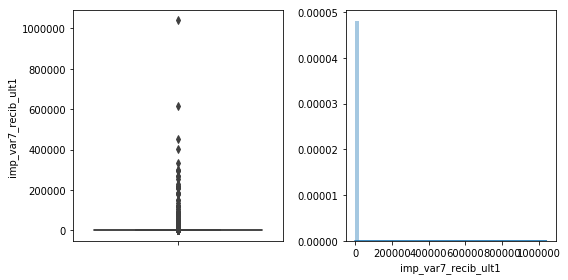

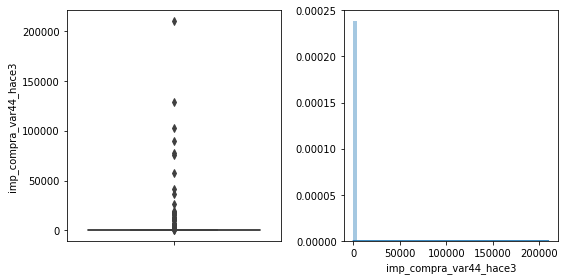

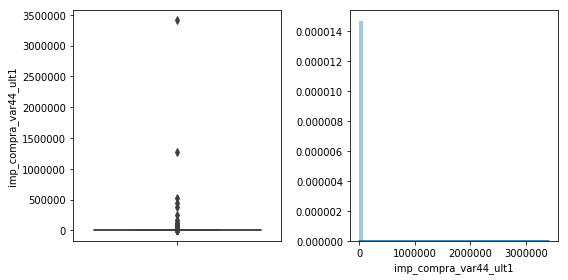

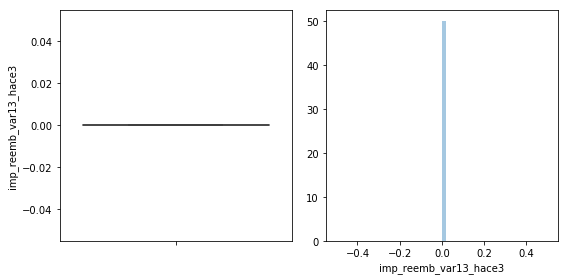

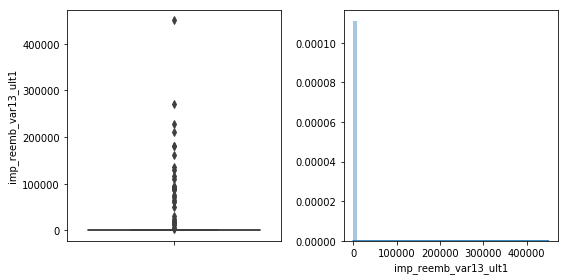

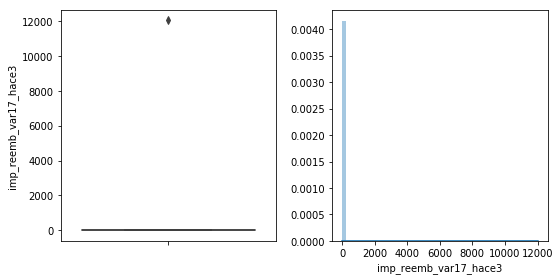

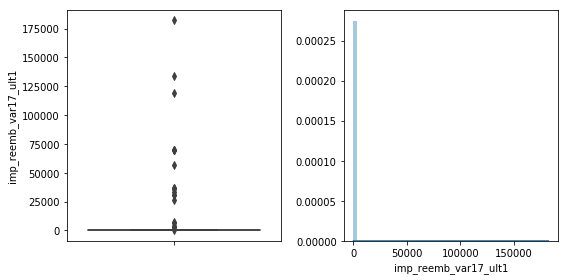

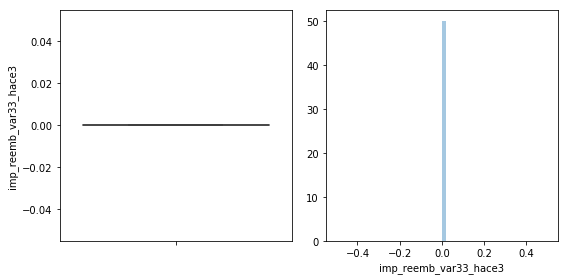

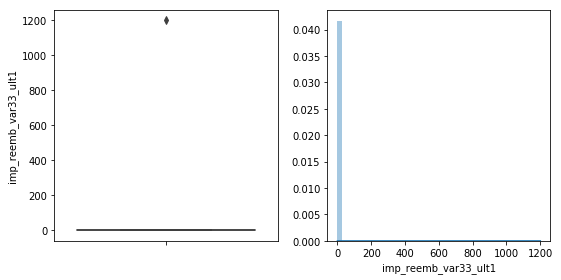

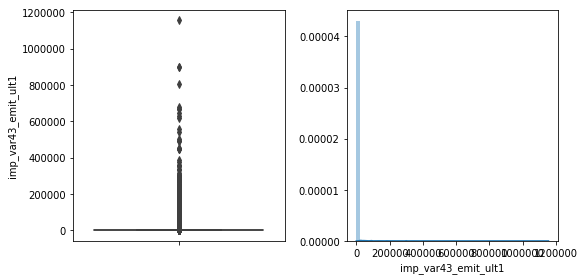

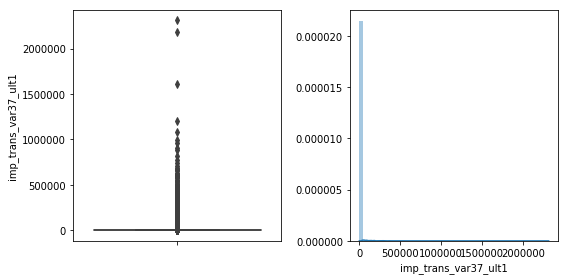

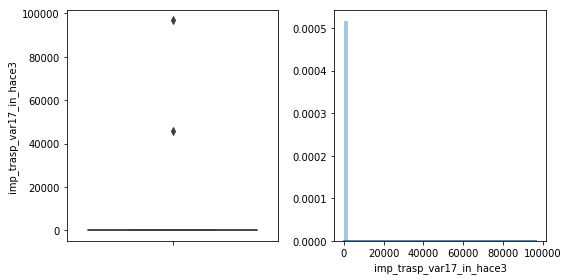

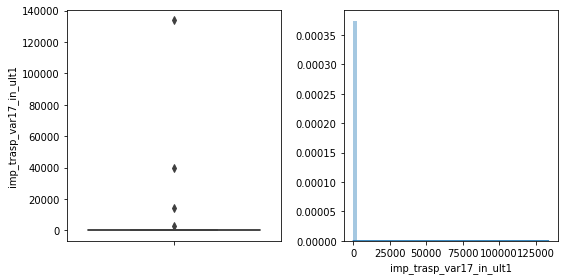

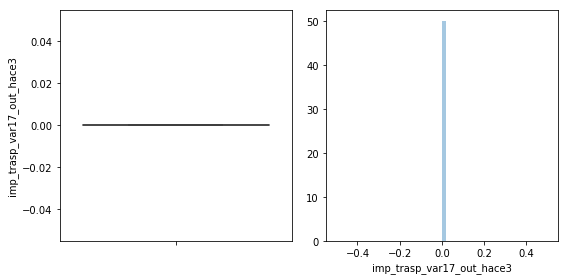

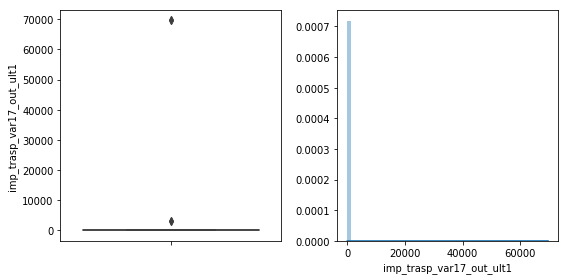

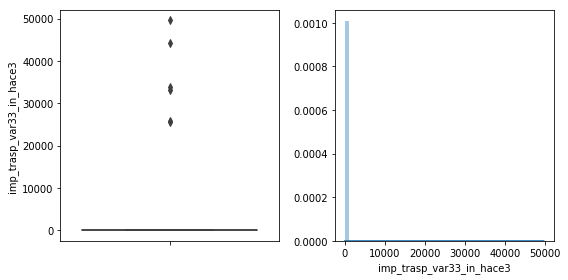

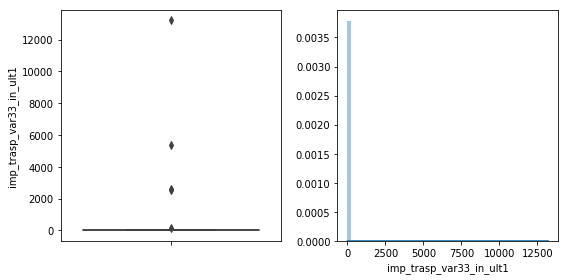

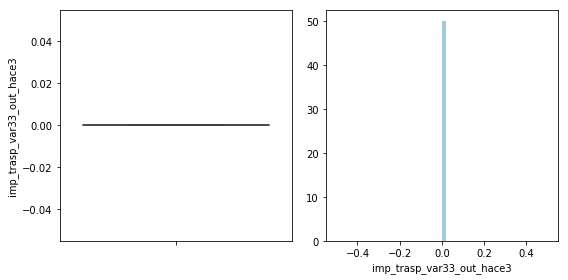

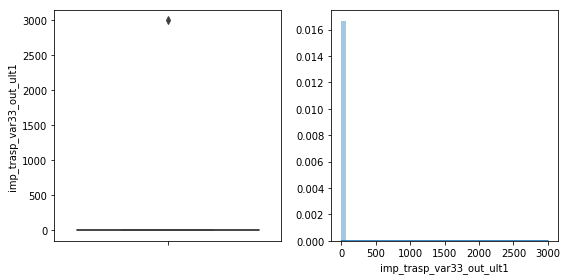

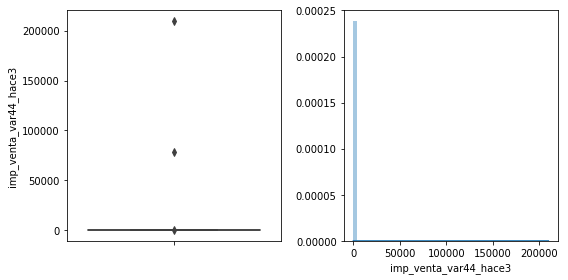

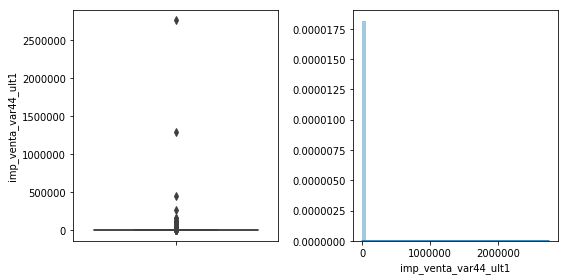

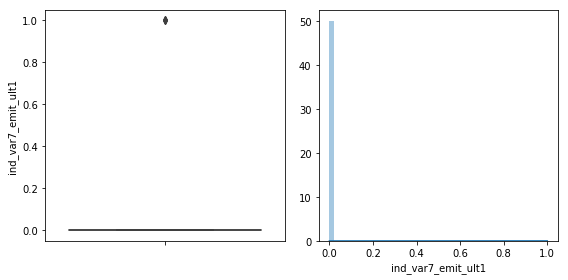

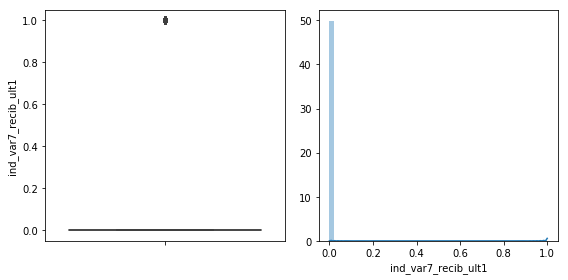

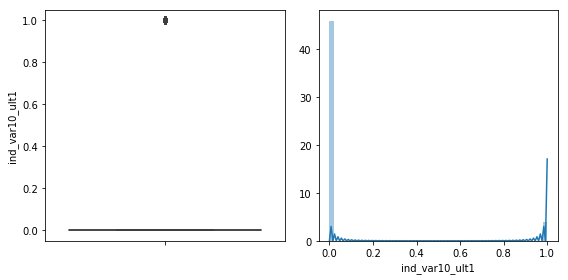

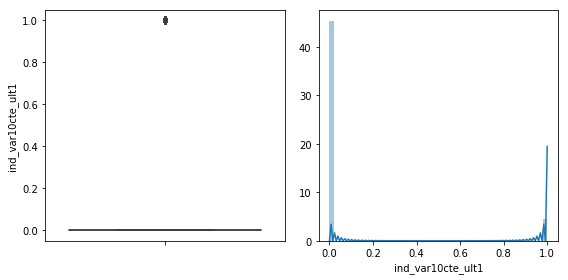

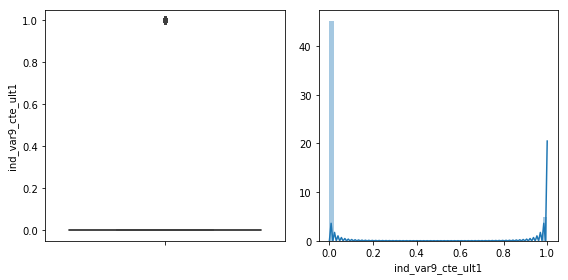

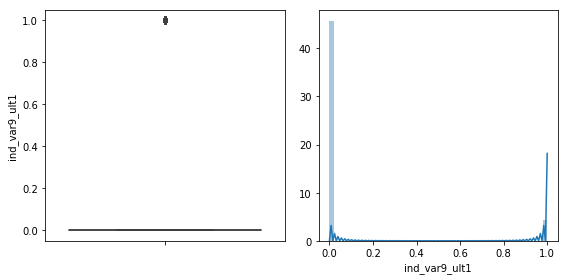

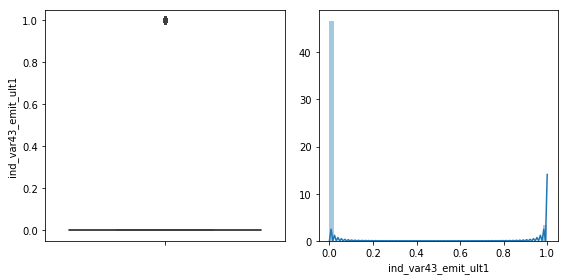

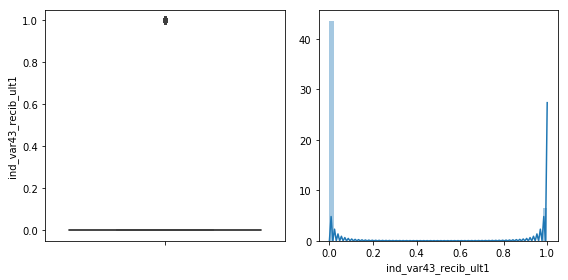

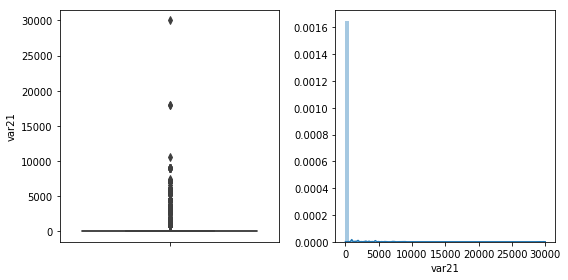

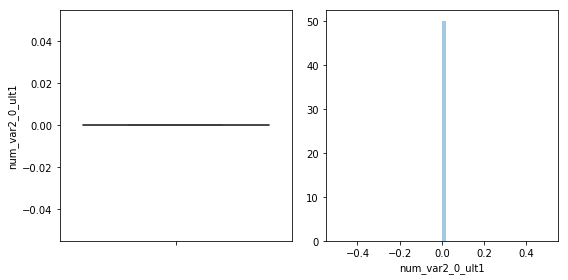

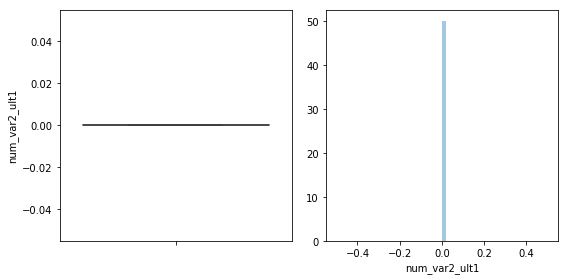

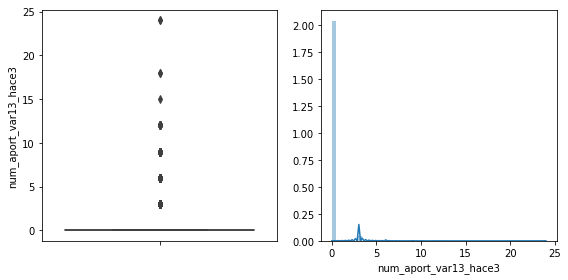

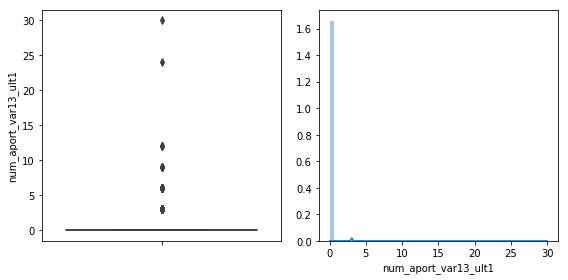

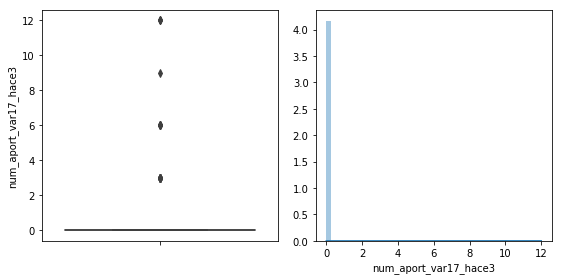

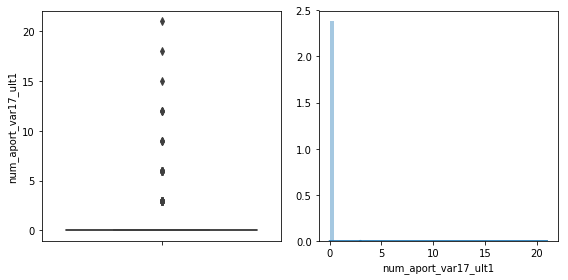

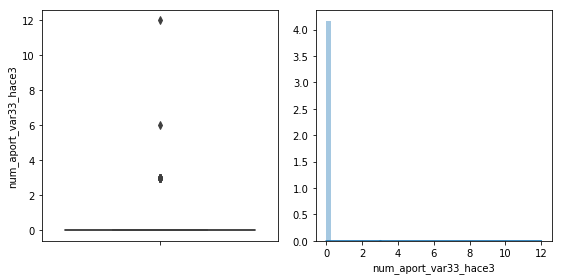

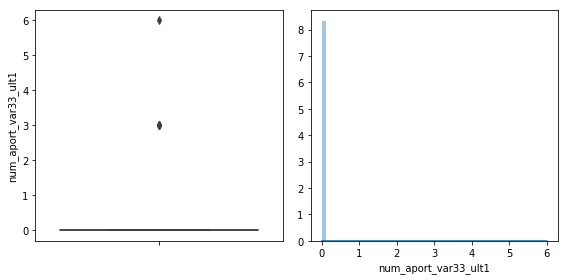

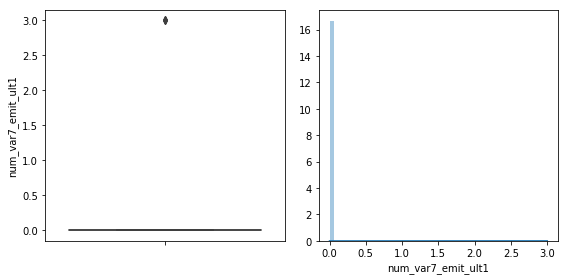

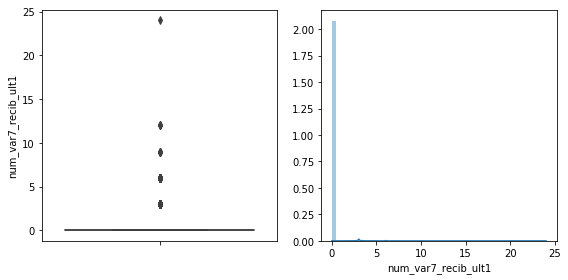

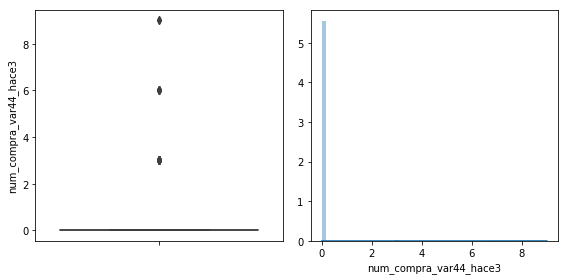

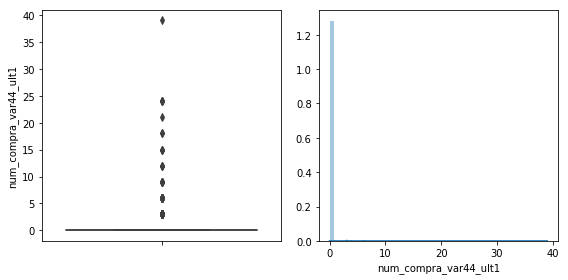

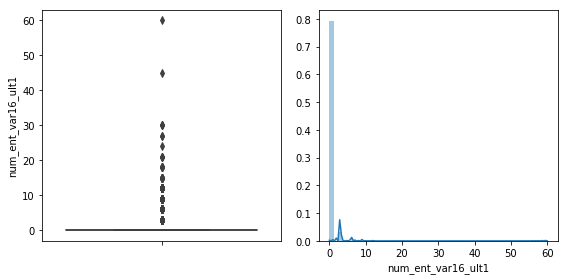

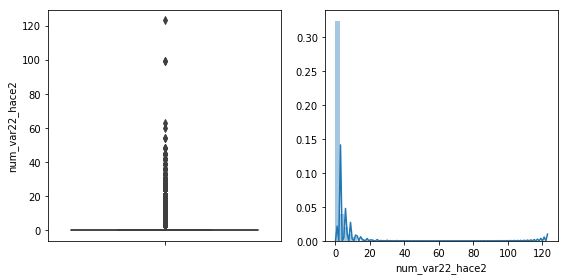

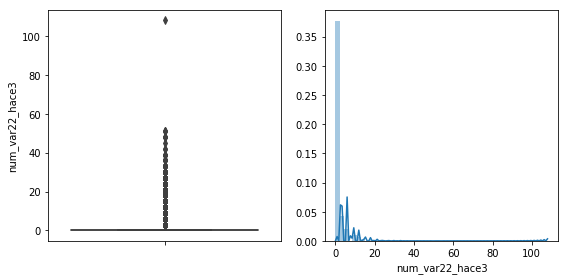

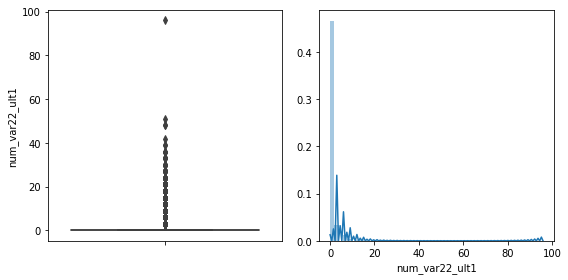

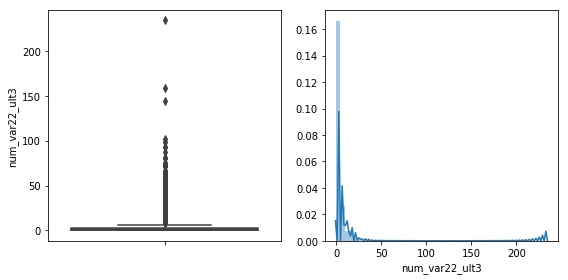

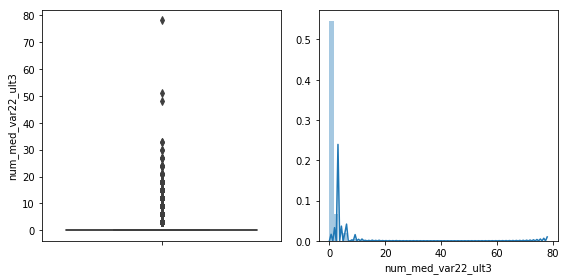

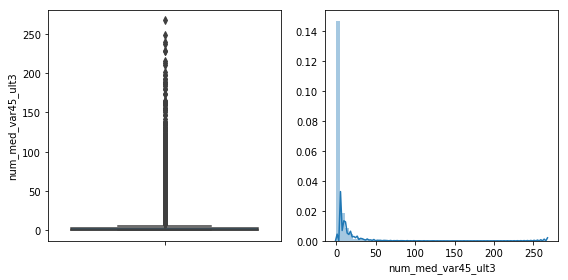

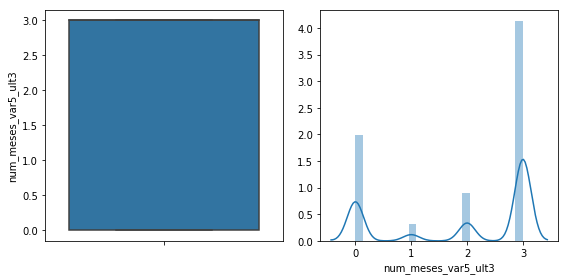

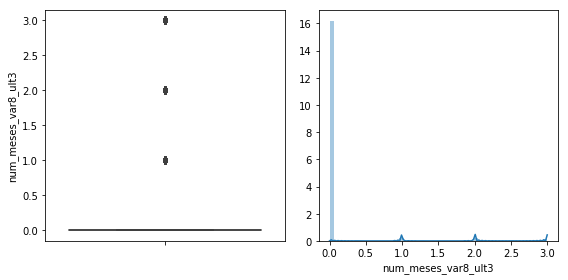

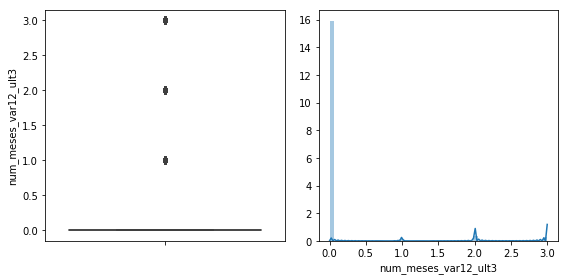

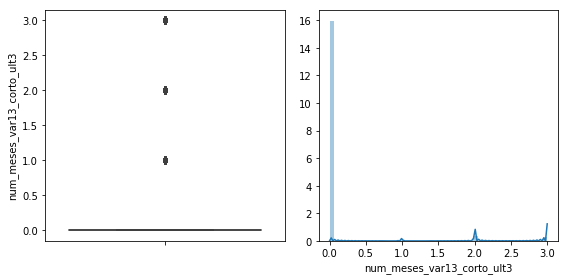

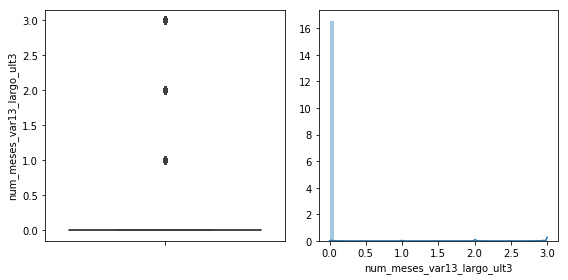

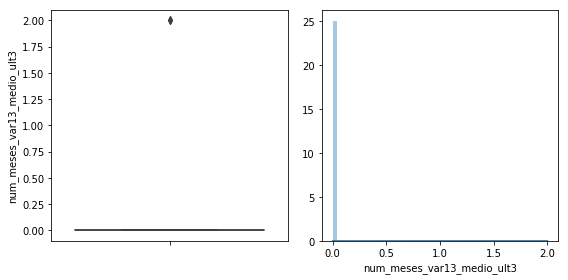

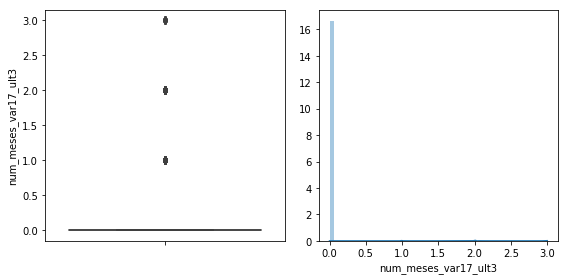

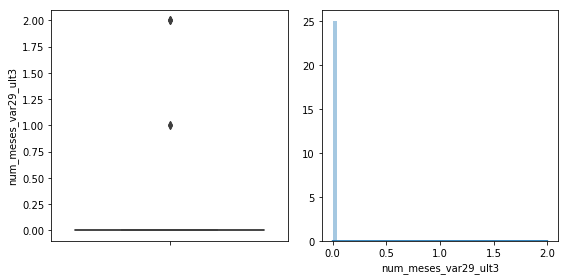

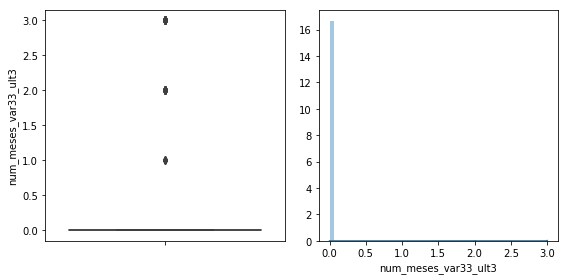

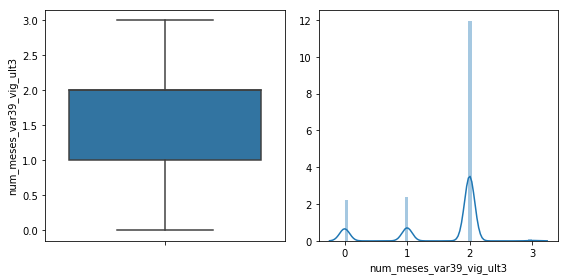

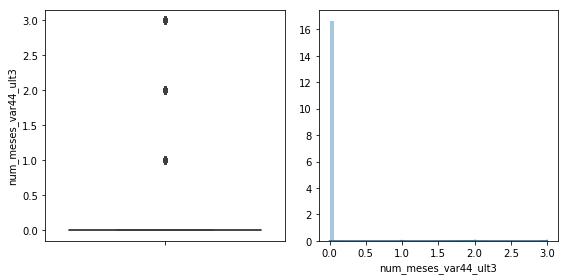

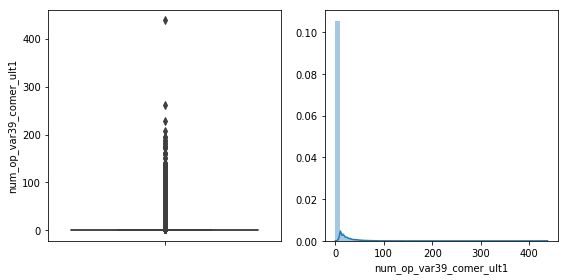

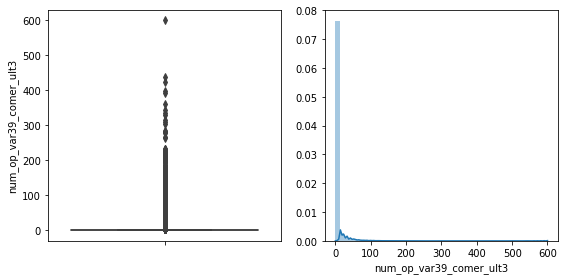

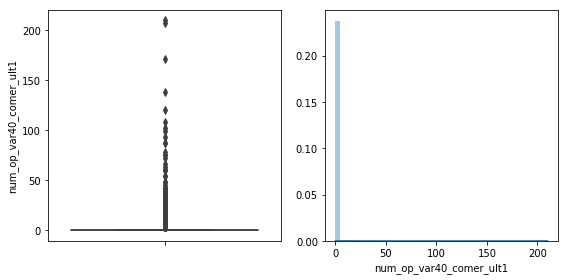

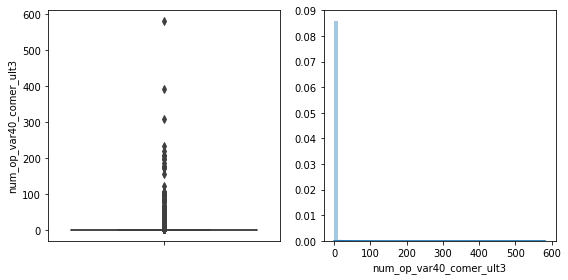

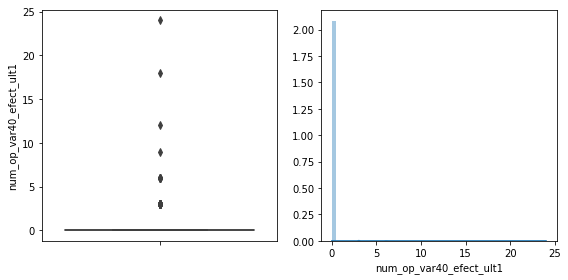

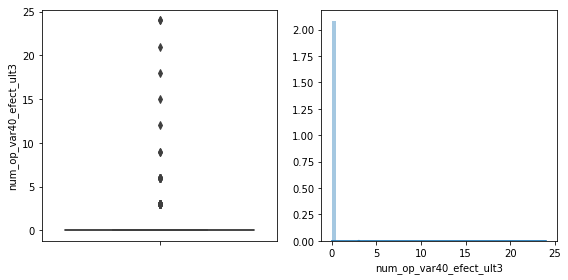

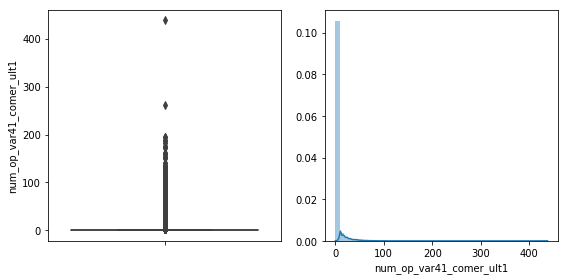

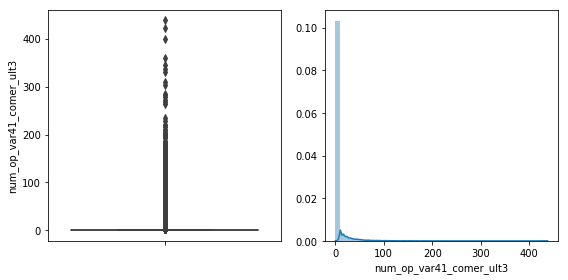

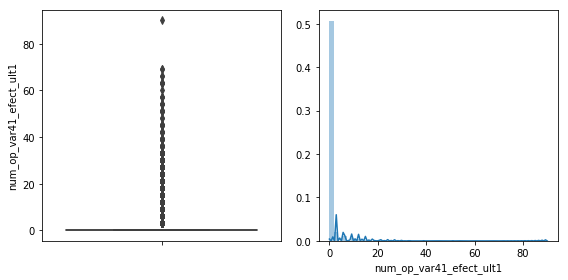

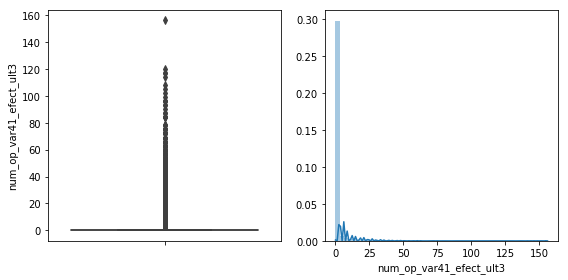

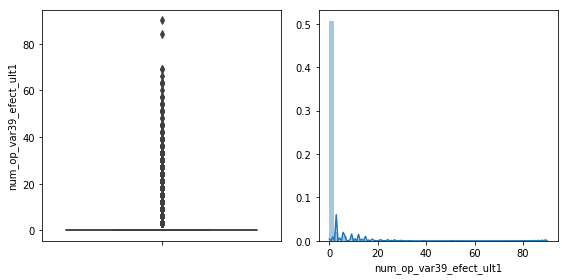

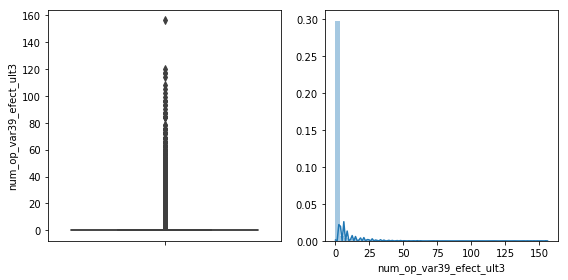

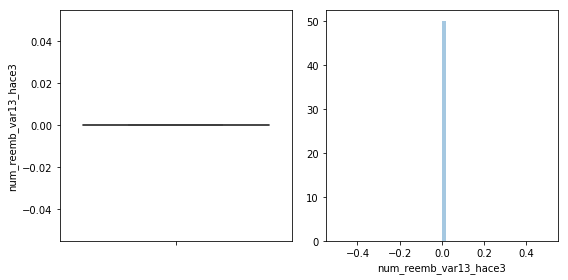

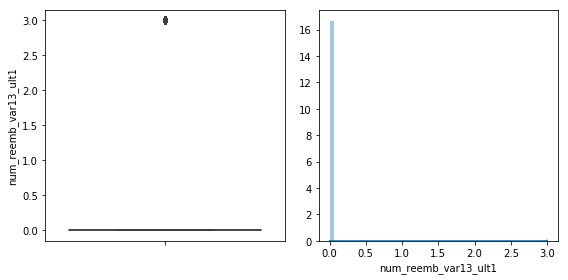

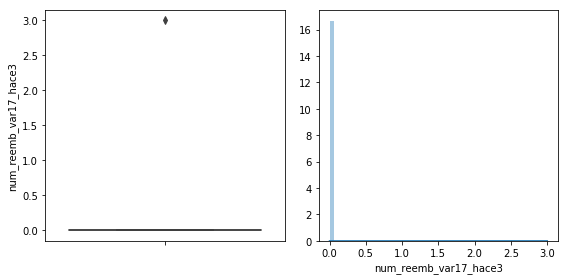

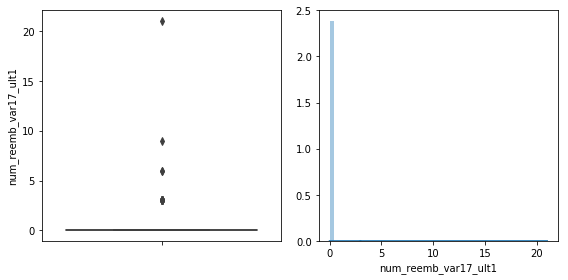

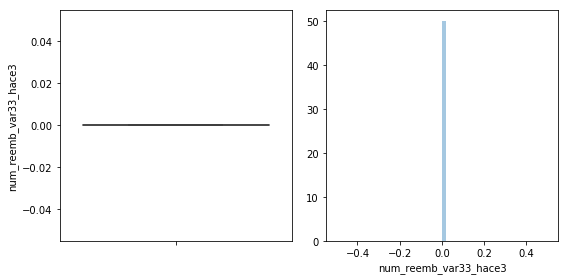

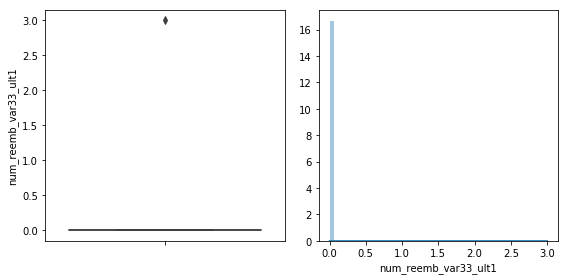

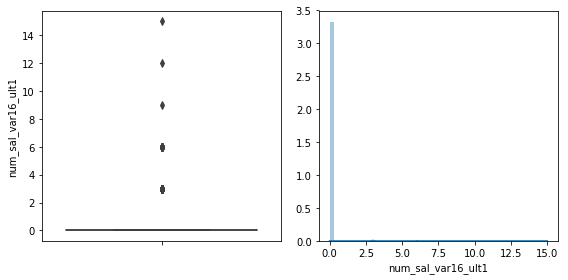

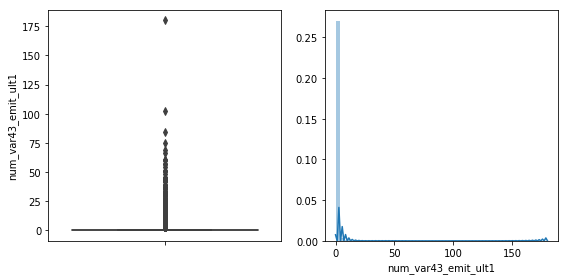

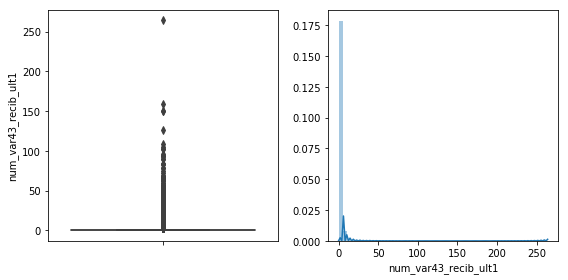

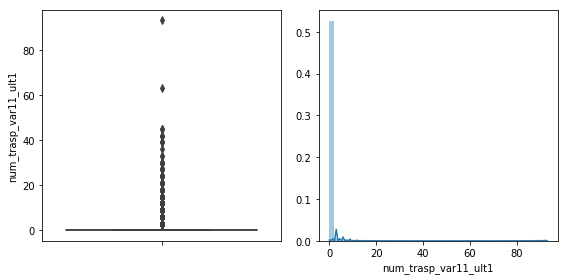

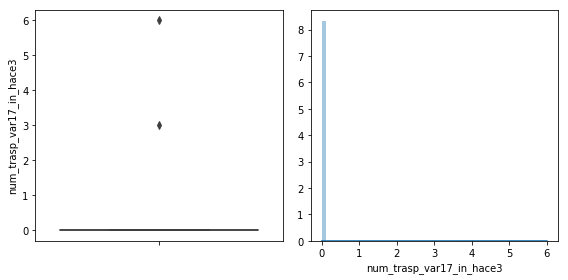

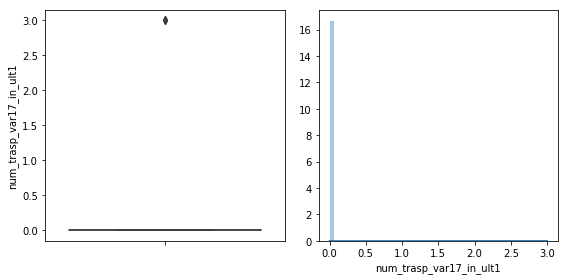

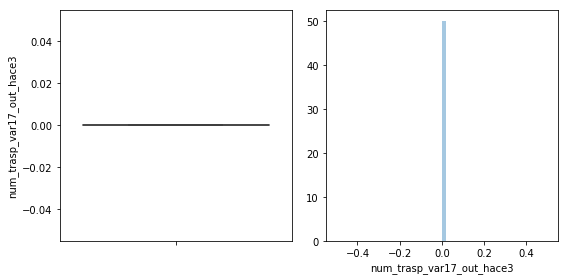

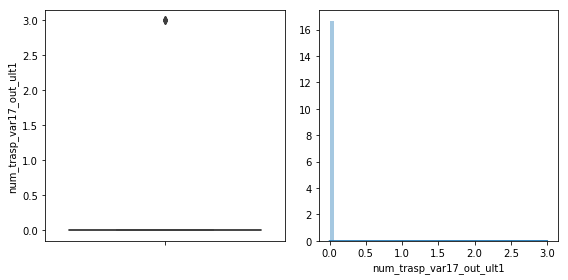

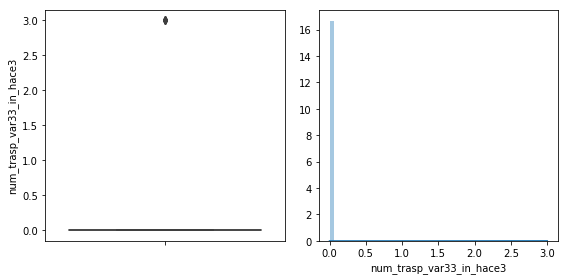

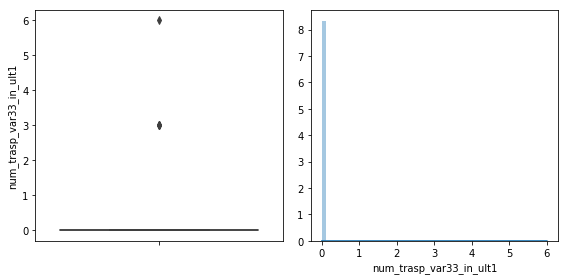

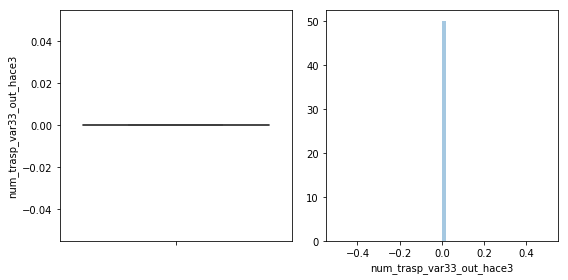

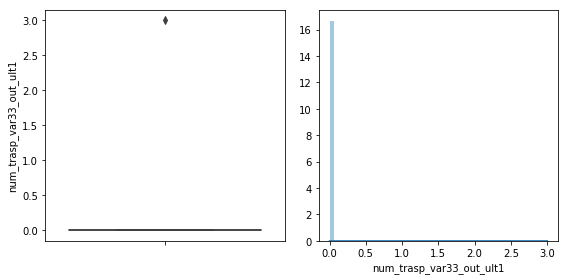

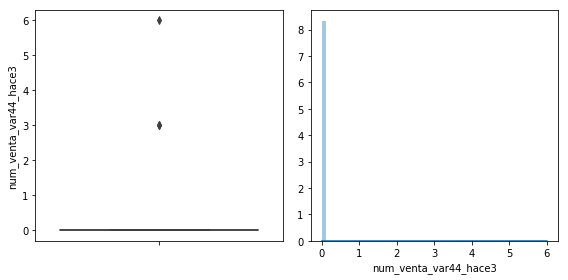

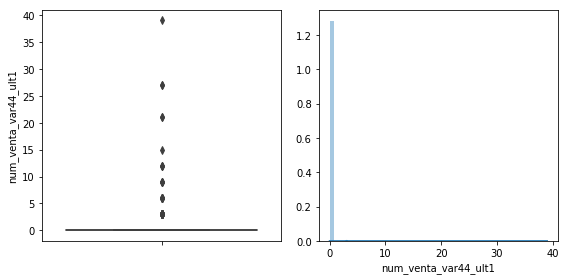

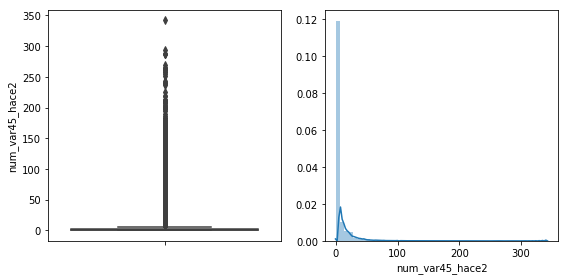

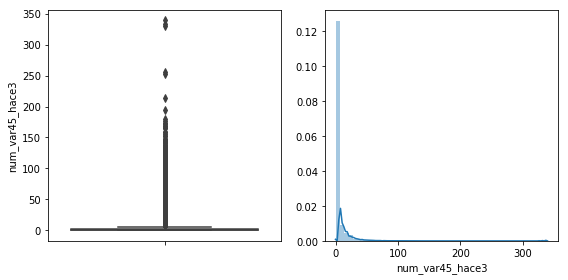

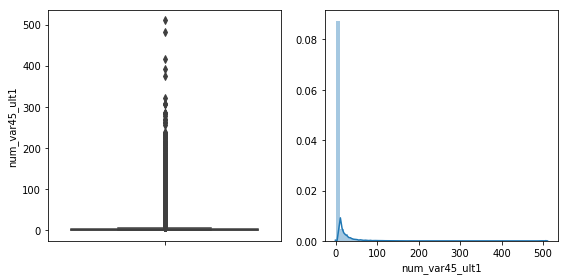

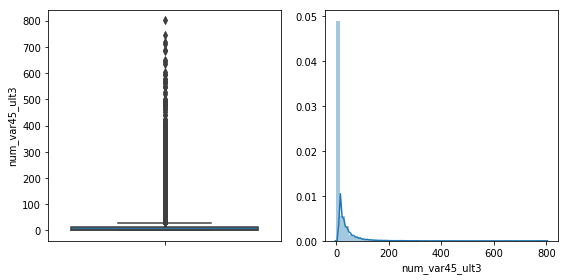

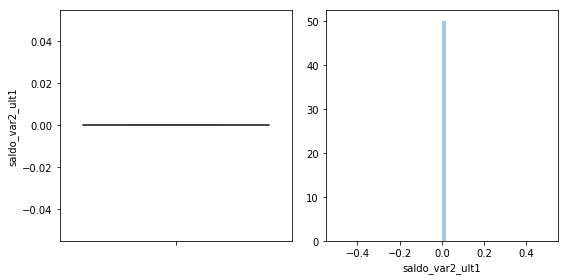

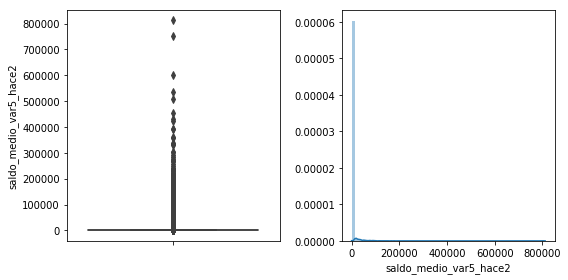

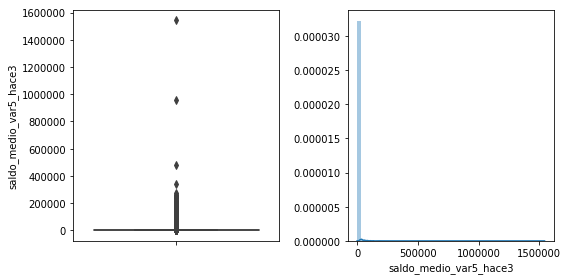

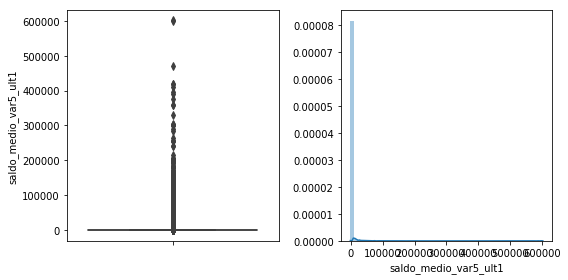

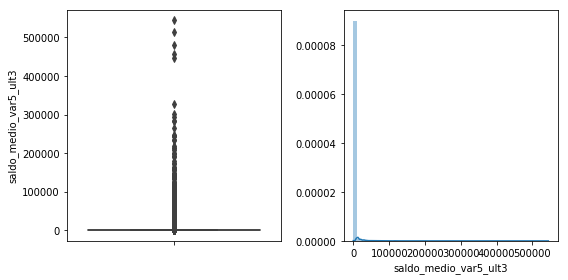

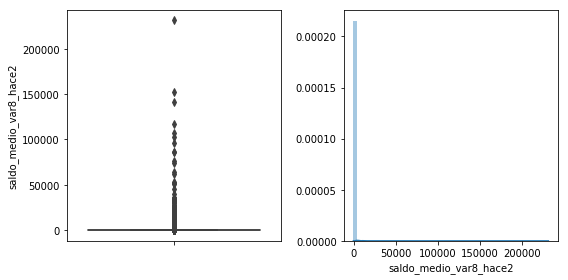

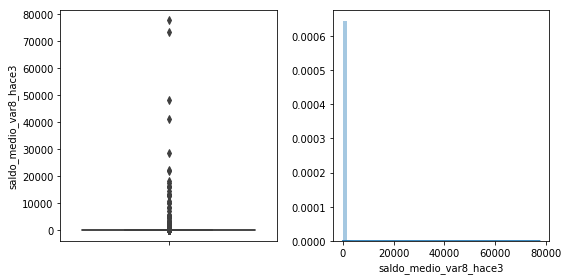

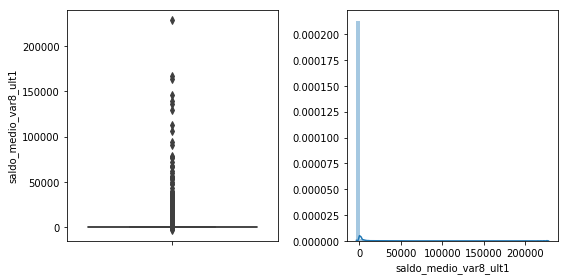

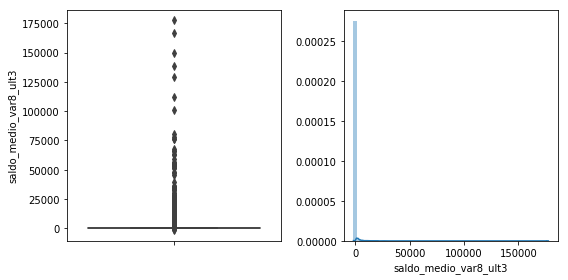

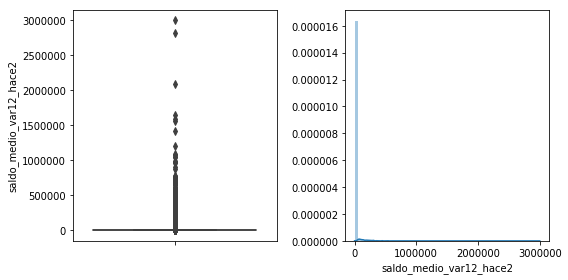

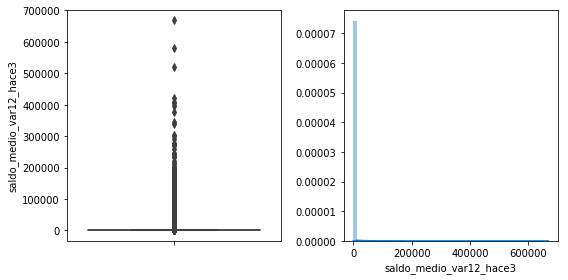

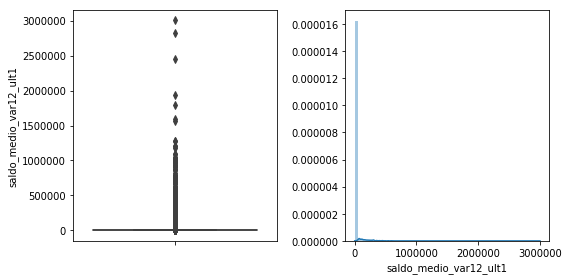

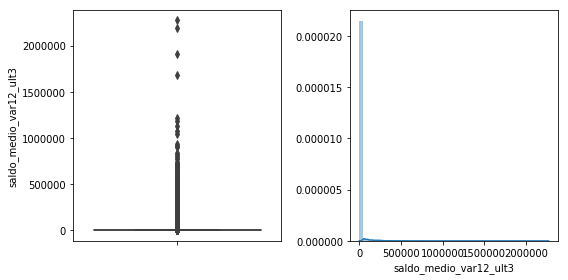

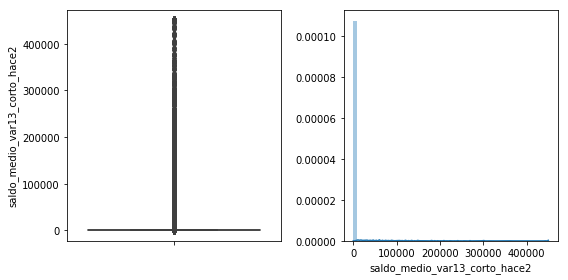

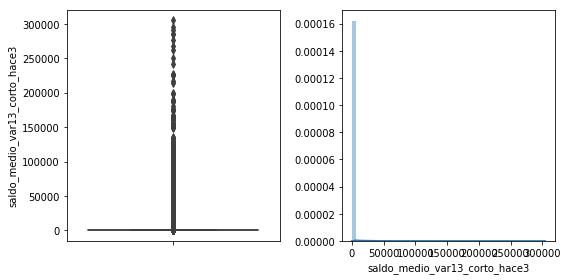

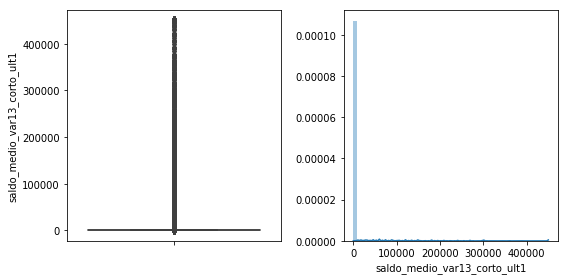

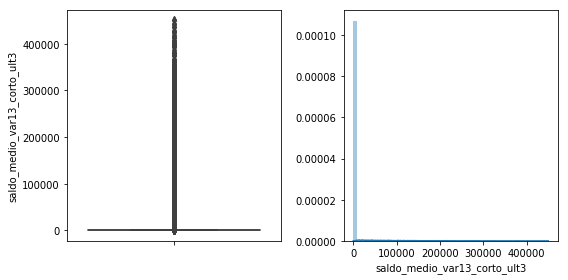

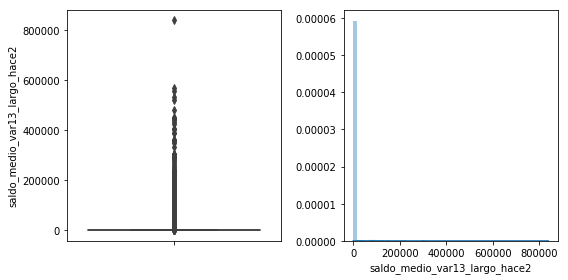

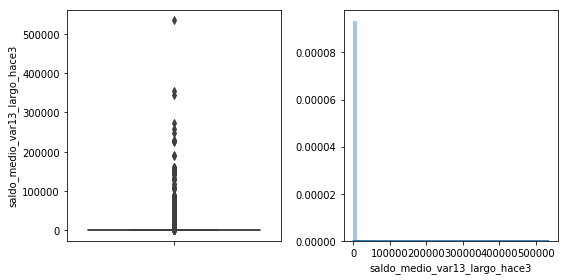

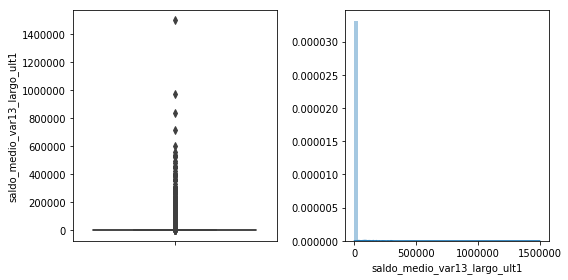

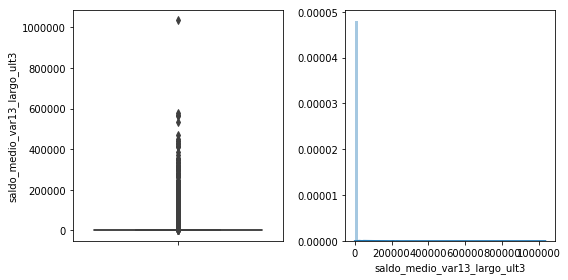

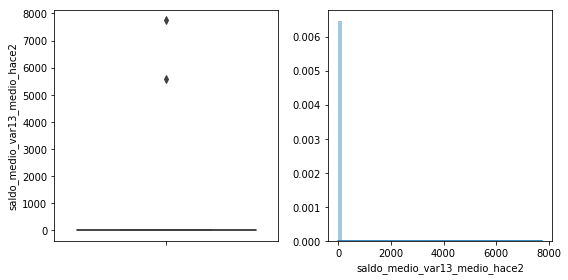

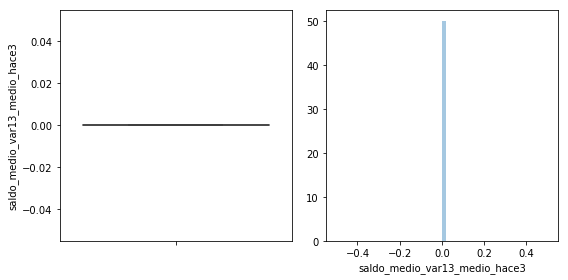

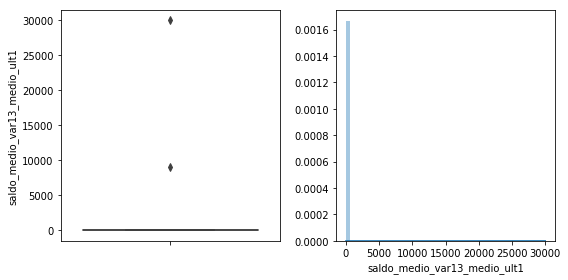

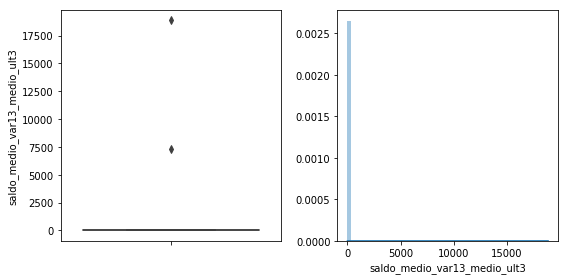

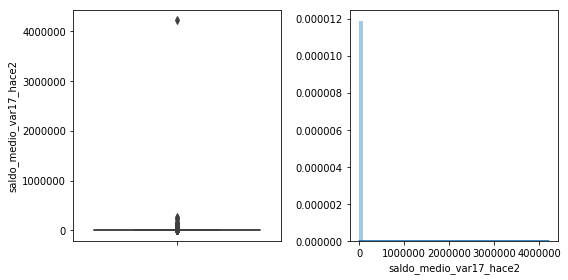

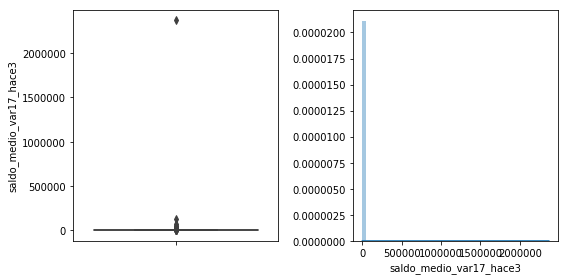

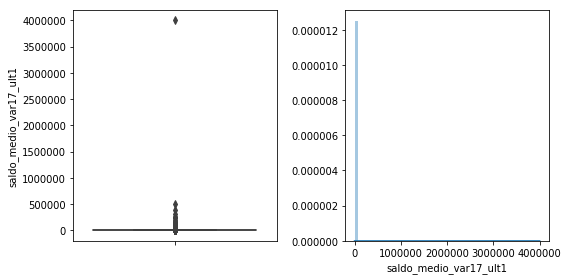

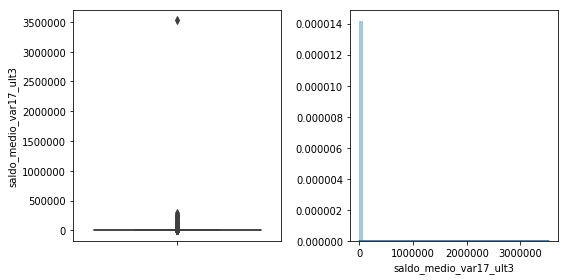

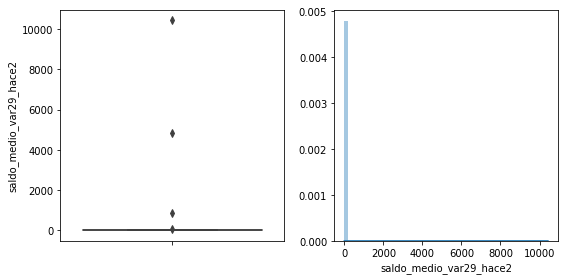

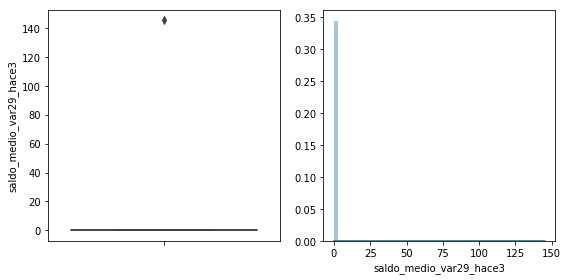

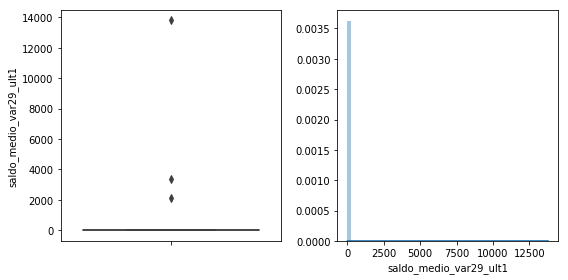

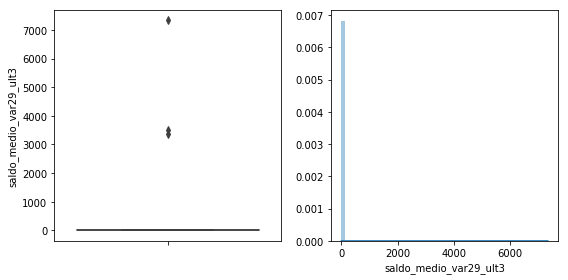

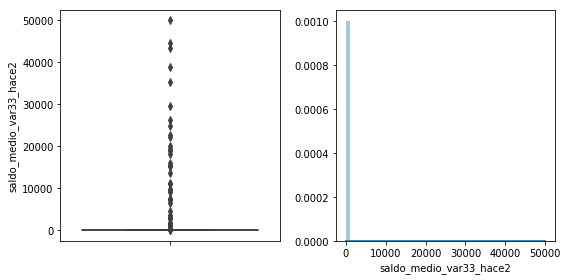

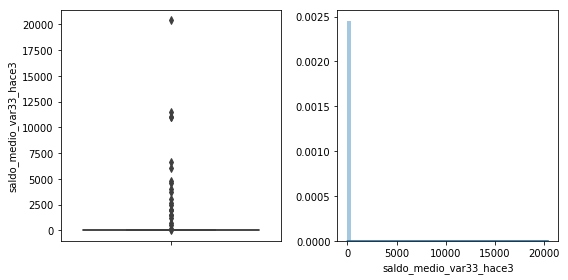

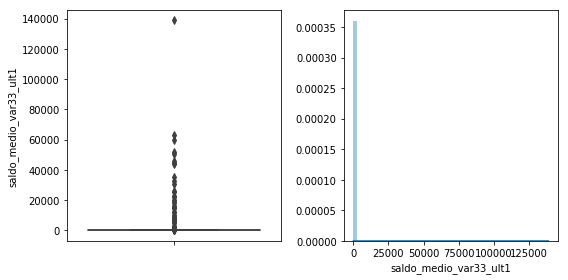

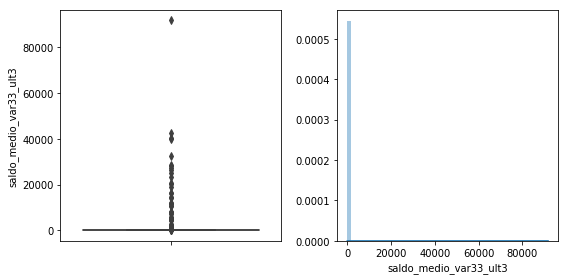

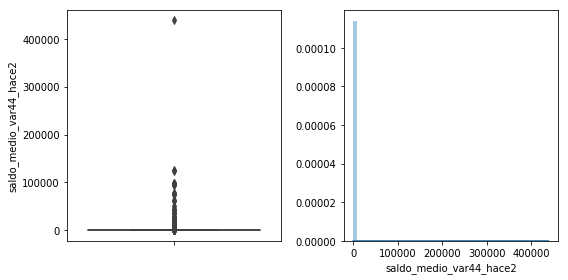

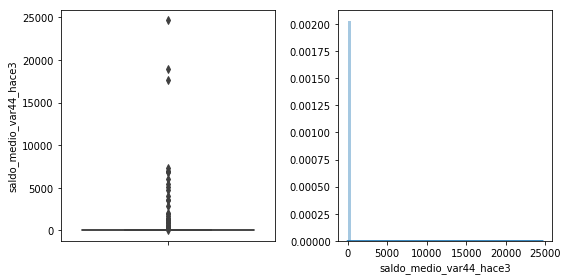

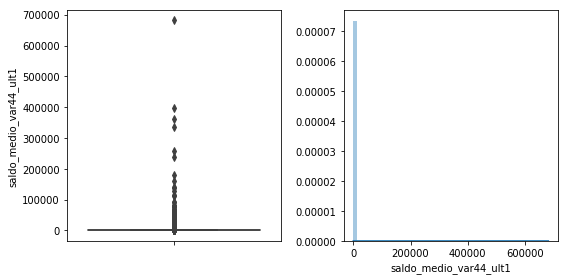

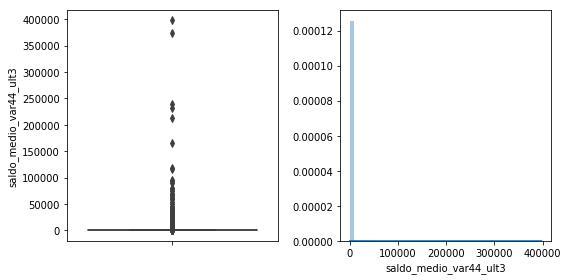

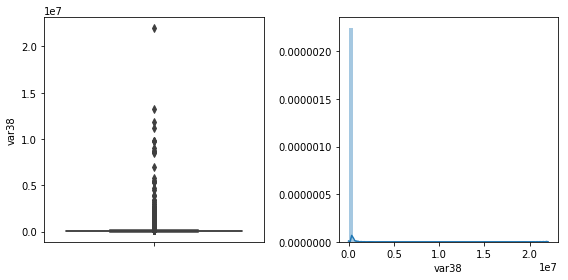

In [120]:
for items in columns_list:
    fig, ax = plt.subplots(1,2, figsize=(8, 4))
    sns.boxplot(df[items], orient = 'v', ax=ax[0])
    sns.distplot(df[items], ax=ax[1])
    fig.tight_layout()
    

In [123]:
# Evaluating skewness and Kurtosis. 

# Skewness is to analyze the shape of each variable in relation to x axis variance, while kurtosis is related to y axis 
# shape variance

# coenf = 0 -- There is no assimetry
# coef > 1 -- Positive assimetry - data more to left (skewness) / High (kurtosis)
# coef < 1 -- Negative assimetry - data more to right (skewness) / low (kurtosis)

df.skew()

ID                                -0.001998
var3                             -25.541574
var15                              1.578367
imp_ent_var16_ult1                67.267512
imp_op_var39_comer_ult1            9.454298
imp_op_var39_comer_ult3            9.735351
imp_op_var40_comer_ult1           45.834548
imp_op_var40_comer_ult3           38.671915
imp_op_var40_efect_ult1          149.528499
imp_op_var40_efect_ult3          112.951439
imp_op_var40_ult1                 52.578032
imp_op_var41_comer_ult1            9.226000
imp_op_var41_comer_ult3            9.546986
imp_op_var41_efect_ult1           36.667400
imp_op_var41_efect_ult3           61.994858
imp_op_var41_ult1                 20.996558
imp_op_var39_efect_ult1           36.249660
imp_op_var39_efect_ult3           61.422944
imp_op_var39_ult1                 20.476998
imp_sal_var16_ult1               181.054616
ind_var1_0                         9.181171
ind_var1                          16.211673
ind_var2_0                      

In [124]:
# Kurtosis

df.kurt()

ID                                  -1.197633
var3                               650.389135
var15                                2.519919
imp_ent_var16_ult1                6321.435132
imp_op_var39_comer_ult1            145.398198
imp_op_var39_comer_ult3            155.618112
imp_op_var40_comer_ult1           2787.680470
imp_op_var40_comer_ult3           1882.959156
imp_op_var40_efect_ult1          29338.737209
imp_op_var40_efect_ult3          16749.323308
imp_op_var40_ult1                 3427.778365
imp_op_var41_comer_ult1            143.022438
imp_op_var41_comer_ult3            149.240681
imp_op_var41_efect_ult1           2347.125582
imp_op_var41_efect_ult3           6716.076163
imp_op_var41_ult1                  943.624076
imp_op_var39_efect_ult1           2292.778412
imp_op_var39_efect_ult3           6619.661967
imp_op_var39_ult1                  887.508752
imp_sal_var16_ult1               37489.417947
ind_var1_0                          82.296072
ind_var1                          

### Correlation between variables 

It is crucial for data projects to determine the correlation between its features. Following this dataset and its enormous numbers of variables, for that reason, estimate and dive deeply into its variables correlation with Target variable is a fundamental matter to reduce dimensionality and get to how they are connected.

In [4]:
# Creating correlation 

corr=df.corr()

In [135]:
# Analyzing its correlations

corr.TARGET.sort_values(ascending = False)

TARGET                           1.000000
var36                            0.102919
var15                            0.101322
ind_var8_0                       0.046665
num_var8_0                       0.046622
imp_op_var39_efect_ult1          0.030380
imp_op_var41_efect_ult1          0.029479
num_var8                         0.027926
ind_var8                         0.027926
imp_op_var41_ult1                0.027586
imp_op_var39_ult1                0.027416
num_meses_var8_ult3              0.025943
num_var22_ult1                   0.025189
ind_var26_cte                    0.023538
ind_var25_cte                    0.023351
imp_op_var39_efect_ult3          0.022172
num_op_var39_efect_ult1          0.021783
imp_op_var41_efect_ult3          0.021486
num_op_var41_efect_ult1          0.021036
num_op_var39_efect_ult3          0.020237
imp_op_var40_efect_ult3          0.019965
num_op_var41_efect_ult3          0.019599
ind_var25_0                      0.019497
ind_var25                        0

As seen before, exist some variables which not present any relationship with target variable. Here they are listed:Therefore, its values will be excluded of variables list for next steps.

In [5]:
# List of variables which have not relationship with target;

variables_out = corr[corr['TARGET'].isnull()].index.tolist

In [11]:
variables_out

<bound method IndexOpsMixin.tolist of Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')>

One important choice for any data science project is selection of good variables, normalizing data, and feature selection as well. 

In addition, data normalization is a contunded method to put all features set in the same scale. By the way, it is important keep in mind the type of feature selection will be made and machine learning model will be implemented in next steps as well.

However, before get started into this, lets create a range of age because the current range can negativetly to contribute with our machine learning model.

In [ ]:
## Changing Range of age by 

In [6]:
df.var15.unique()

array([ 23,  34,  37,  39,  27,  26,  45,  25,  42,  51,  43,  33,  30,
        44,  36,  55,  28,  35,  54,  40,  24,  14,  66,  50,  22,  62,
        60,  64,  76,  31,  38,  41,  56,  72,  68,   5,  77,  29,  63,
        32,  57,  80,  52,  61,  71,  88,  59,  53, 100,  74,  86,  73,
        48,  46,  49,  65,  47,  21,  75,  58,  67,  13,  83,  87,  84,
        70,  78,  85,  17,  94,  79,  89,  81,  15,  69,  11,  90, 102,
        91,  10,  92,  82,  18,  12,  19,   7,  93,   9,  96,   6,   8,
        16,  95,  97,  98,  20,  99, 105, 104, 101], dtype=int64)

In [13]:
df.var15.value_counts().index

Int64Index([ 23,  24,  25,  26,  27,  28,  31,  29,  30,  32,  36,  35,  34,
             37,  38,  33,  39,  40,  41,  42,  43,  44,  45,  22,  46,  47,
             48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
             61,  62,  64,  63,  65,  67,  70,  66,  68,  69,  71,  72,  74,
             75,  76,  73,  79,  78,  77,  80,  83,  84,  82,  88,  81,  85,
             86,  89,  87,  91,   5,  15,  90,  21,   6,  93,  14,  11,   9,
             10,  92,  19,  18,  17,  16,  94,  13,  12,  20,   8,  96,   7,
             95,  99, 100, 102,  97, 104,  98, 105, 101],
           dtype='int64')

In [ ]:
?plt.bar

<BarContainer object of 100 artists>

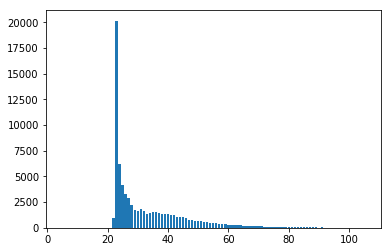

In [16]:
plt.bar(df.var15.value_counts().index, df.var15.value_counts())

The main point here is to group the var15 variable in ranges. Following that, is to use LabelEnconder technique which this new range data will be supersede by number. In the end, we are going to use OneHotEnconder to catalog this ranges in arrays with each element in the range signed for its respective value adding all new variables age on dataframe.

In [6]:
df2 = df.copy()

In [116]:
df2.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [181]:
# Creating range of age! After that, we have to convert it into variables and sign as 1 or 0 to each respective values;

?range

In [4]:
list(range(0,115,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [7]:
bins = list(range(0,115,10))

In [30]:
?pd.cut

In [31]:
pd.cut(x = df['var15'], bins = bins, right = True)

In [8]:
df2.insert(loc = 3, column = 'var15_range', value = pd.cut(x = df['var15'], bins = bins, right = True))

In [9]:
df2.head()

ID  var3  var15 var15_range  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23    (20, 30]                 0.0                      0.0   
1   3     2     34    (30, 40]                 0.0                      0.0   
2   4     2     23    (20, 30]                 0.0                      0.0   
3   8     2     37    (30, 40]                 0.0                    195.0   
4  10     2     39    (30, 40]                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  ...  saldo_medio_var33_hace2  \
0                      0.0  ...                      0.0   
1                      0.0  ...                      0.0   
2                      0.0  ...                      0.0   
3                      0.0  ...                      0.0   
4                      0.0  ...                      0.0   

   saldo_medio_var33_hace3  saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

   saldo_medio_var44_hace2  saldo_medio_var44_hace3  saldo_medio_var44_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var44_ult3          var38  TARGET  
0                     0.0   39205.170000       0  
1                     0.0   49278.030000       0  
2                     0.0   67333.770000       0  
3                     0.0   64007.970000       0  
4                     0.0  117310.979016       0  

[5 rows x 372 columns]

In [10]:
df2[df2['var15_range'].isnull()].index.tolist()

[]

In [11]:
df2.isnull().values.any()

False

Machine Learning does not work with categorical values. Moreover, variables wich are part of any modelation must have data integrity. As part of data muging process was identified some contunded data to be implemented and make use on this approach. In addition, transformation is perfomed to modify and handle with its challenges. 

Concluded the range step, now we are going to introduce LabelEnconder technique, because var15 grouped by ranges the data has changed to categorical type and we must convert it to numerical type again.

LabelEncoder technique will insert differents values to each range data created before. With that technique, the variable evaluated return to numeric type. By the way, the score given to each item can to have one contrary benefaction in its current form, and to handle it another technique must be executed named One Hot Encoder. 



In [125]:
df2.var15_range.dtypes

CategoricalDtype(categories=[(0, 10], (10, 20], (20, 30], (30, 40], (40, 50] ... (60, 70], (70, 80], (80, 90], (90, 100], (100, 110]],
              ordered=True)

In [12]:
## Loading library to LabelEnconder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Applyin encoder wich returns an array
labels_var15_range = label_encoder.fit_transform((df2.var15_range).astype('str'))
labels_var15_range

array([3, 4, 3, ..., 3, 3, 5])

In [128]:
len(labels_var15_range)


76020

In [13]:
df2.insert(loc = 4, column = 'Labels_var15_range', value = labels_var15_range)
df2.head(20)

ID  var3  var15 var15_range  Labels_var15_range  imp_ent_var16_ult1  \
0    1     2     23    (20, 30]                   3                 0.0   
1    3     2     34    (30, 40]                   4                 0.0   
2    4     2     23    (20, 30]                   3                 0.0   
3    8     2     37    (30, 40]                   4                 0.0   
4   10     2     39    (30, 40]                   4                 0.0   
5   13     2     23    (20, 30]                   3                 0.0   
6   14     2     27    (20, 30]                   3                 0.0   
7   18     2     26    (20, 30]                   3                 0.0   
8   20     2     45    (40, 50]                   5                 0.0   
9   23     2     25    (20, 30]                   3                 0.0   
10  25     2     42    (40, 50]                   5                 0.0   
11  26     2     26    (20, 30]                   3                 0.0   
12  29     2     51    (50, 60]                   6                 0.0   
13  31     2     43    (40, 50]                   5                 0.0   
14  32     2     33    (30, 40]                   4               600.0   
15  34     2     30    (20, 30]                   3                 0.0   
16  36     2     44    (40, 50]                   5                 0.0   
17  39     2     36    (30, 40]                   4                 0.0   
18  42   229     55    (50, 60]                   6                 0.0   
19  43     2     28    (20, 30]                   3                 0.0   

    imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                      0.00                     0.00                      0.0   
1                      0.00                     0.00                      0.0   
2                      0.00                     0.00                      0.0   
3                    195.00                   195.00                      0.0   
4                      0.00                     0.00                      0.0   
5                      0.00                     0.00                      0.0   
6                      0.00                     0.00                      0.0   
7                      0.00                     0.00                      0.0   
8                      0.00                     0.00                      0.0   
9                      0.00                     0.00                      0.0   
10                     0.00                     0.00                      0.0   
11                     0.00                     0.00                      0.0   
12                     0.00                     0.00                      0.0   
13                     0.00                     0.00                      0.0   
14                  1086.48                  1952.91                      0.0   
15                     0.00                     0.00                      0.0   
16                     0.00                     0.00                      0.0   
17                    55.20                    70.95                      0.0   
18                     0.00                     0.00                      0.0   
19                     0.00                     0.00                      0.0   

    imp_op_var40_comer_ult3  ...  saldo_medio_var33_hace2  \
0                       0.0  ...                      0.0   
1                       0.0  ...                      0.0   
2                       0.0  ...                      0.0   
3                       0.0  ...                      0.0   
4                       0.0  ...                      0.0   
5                       0.0  ...                      0.0   
6                       0.0  ...                      0.0   
7                       0.0  ...                      0.0   
8                       0.0  ...                      0.0   
9                       0.0  ...                      0.0   
10                      0.0  ...                      0

Thus far, we converted all elements in var15 to a range of values and afterwards modified it, maneuvering with LabelEncoder. As mentioned previously, data post labelEncoder can affect the balance when applied a machine learning algorithm due to weight given to the data range. On this line, it is considered put in practice another technique named One Hot Encodering.

One Hot Encoder will result in one array with equals size for the range and designating 1 or 0 for its due property. Sequently, the next step is transforming its new variables for one dataset and concatenate all elements in new one. 

In [14]:
# Applying OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

var15_array = one_hot_encoder.fit_transform(df2[['Labels_var15_range']]).toarray()
var15_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# Taking labels 

label_encoder.classes_

array(['(0, 10]', '(10, 20]', '(100, 110]', '(20, 30]', '(30, 40]',
       '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]',
       '(90, 100]'], dtype=object)

In [17]:
# Converting array to dataframe

var15_df=pd.DataFrame(data = var15_array, columns = 'var15_'+label_encoder.classes_)
var15_df.head()

var15_(0, 10]  var15_(10, 20]  var15_(100, 110]  var15_(20, 30]  \
0            0.0             0.0               0.0             1.0   
1            0.0             0.0               0.0             0.0   
2            0.0             0.0               0.0             1.0   
3            0.0             0.0               0.0             0.0   
4            0.0             0.0               0.0             0.0   

   var15_(30, 40]  var15_(40, 50]  var15_(50, 60]  var15_(60, 70]  \
0             0.0             0.0             0.0             0.0   
1             1.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   var15_(70, 80]  var15_(80, 90]  var15_(90, 100]  
0             0.0             0.0              0.0  
1             0.0             0.0              0.0  
2             0.0             0.0              0.0  
3             0.0             0.0              0.0  
4             0.0             0.0              0.0

In [40]:
%whos

Variable             Type             Data/Info
-----------------------------------------------
LabelEncoder         type             <class 'sklearn.preproces<...>sing.label.LabelEncoder'>
OneHotEncoder        type             <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
bins                 list             n=12
corr                 DataFrame                                 <...>n[371 rows x 371 columns]
df                   DataFrame                   ID  var3  var1<...>76020 rows x 371 columns]
df2                  DataFrame                   ID  var3  var1<...>76020 rows x 373 columns]
label_encoder        LabelEncoder     LabelEncoder()
labels_var15_range   ndarray          76020: 76020 elems, type `int32`, 304080 bytes (296.953125 kb)
np                   module           <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
one_hot_encoder      OneHotEncoder    OneHotEncoder(categorical<...>values=None, sparse=True)
pd                   module           <module 'pa

In [91]:
# Creating a new consolidated dataframe implementing a new function: df3

def insert_dataframe_position(position, dataframe_1, dataframe_2):
    dataframe_3=dataframe_1.copy()
    for items in range(dataframe_2.shape[1]):
        dataframe_3.insert(loc=position, column=dataframe_2.columns[items], value=dataframe_2.iloc[:,items])
        position=position+1
    return dataframe_3
        

In [94]:
df3=insert_dataframe_position(5,df2,var15_df)
df3.head(10)

ID  var3  var15 var15_range  Labels_var15_range  var15_(0, 10]  \
0   1     2     23    (20, 30]                   3            0.0   
1   3     2     34    (30, 40]                   4            0.0   
2   4     2     23    (20, 30]                   3            0.0   
3   8     2     37    (30, 40]                   4            0.0   
4  10     2     39    (30, 40]                   4            0.0   
5  13     2     23    (20, 30]                   3            0.0   
6  14     2     27    (20, 30]                   3            0.0   
7  18     2     26    (20, 30]                   3            0.0   
8  20     2     45    (40, 50]                   5            0.0   
9  23     2     25    (20, 30]                   3            0.0   

   var15_(10, 20]  var15_(100, 110]  var15_(20, 30]  var15_(30, 40]  ...  \
0             0.0               0.0             1.0             0.0  ...   
1             0.0               0.0             0.0             1.0  ...   
2             0.0               0.0             1.0             0.0  ...   
3             0.0               0.0             0.0             1.0  ...   
4             0.0               0.0             0.0             1.0  ...   
5             0.0               0.0             1.0             0.0  ...   
6             0.0               0.0             1.0             0.0  ...   
7             0.0               0.0             1.0             0.0  ...   
8             0.0               0.0             0.0             0.0  ...   
9             0.0               0.0             1.0             0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   
5                      0.0                      0.0                     0.0   
6                      0.0                      0.0                     0.0   
7                      0.0                      0.0                     0.0   
8                      0.0                      0.0                     0.0   
9                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   
5                     0.0                      0.0                      0.0   
6                     0.0                      0.0                      0.0   
7                     0.0                      0.0                      0.0   
8                     0.0                      0.0                      0.0   
9                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  
5                     0.0                     0.0   87975.750000       0  
6                     0.0                     0.0   94956.660000       0  
7                     0.0                     0.0  251638.950000  

In [87]:
df3.columns

Index(['ID', 'var3', 'var15', 'var15_range', 'Labels_var15_range',
       'var15_(0, 10]', 'var15_(10, 20]', 'var15_(100, 110]', 'var15_(20, 30]',
       'var15_(30, 40]',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=384)

In [ ]:
df3.to_csv('df3.csv', index = False)

In [ ]:
##############################

In [2]:
df3 = pd.read_csv('df3.csv')
df3.head(5)

ID  var3  var15 var15_range  Labels_var15_range  var15_(0, 10]  \
0   1     2     23    (20, 30]                   3            0.0   
1   3     2     34    (30, 40]                   4            0.0   
2   4     2     23    (20, 30]                   3            0.0   
3   8     2     37    (30, 40]                   4            0.0   
4  10     2     39    (30, 40]                   4            0.0   

   var15_(10, 20]  var15_(100, 110]  var15_(20, 30]  var15_(30, 40]  ...  \
0             0.0               0.0             1.0             0.0  ...   
1             0.0               0.0             0.0             1.0  ...   
2             0.0               0.0             1.0             0.0  ...   
3             0.0               0.0             0.0             1.0  ...   
4             0.0               0.0             0.0             1.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 384 columns]

Before begin with normalizing method, variables which are not part of our method needs to be taken out. One example of unnecessary features starts with ID, var15, var15_range, Labels_var15_range, and on and on.

In addition, the list contain variables without any relationship or correlation with TARGET value. 

In [5]:
columns_list = ['ID','var15','var15_range', 'Labels_var15_range','ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3',
       'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3',
       'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3']

In [63]:
df3.head(5)

In [3]:
# Function to delete columns from dataframe

def dataframe_column_delete(dataframe, columns_list):
    dataframe_copy = dataframe.copy() 
    for col in columns_list:
        if col in dataframe_copy:
            del dataframe_copy[col]
    return dataframe_copy

In [11]:
# Calling function

df4 = dataframe_column_delete(df3,columns_list)
#df4.head(5)

In [8]:
# Saving dataset

df4.to_csv('df4.csv', index = False)

In [6]:
df4.columns

Index(['var3', 'var15_(0, 10]', 'var15_(10, 20]', 'var15_(100, 110]',
       'var15_(20, 30]', 'var15_(30, 40]', 'var15_(40, 50]', 'var15_(50, 60]',
       'var15_(60, 70]', 'var15_(70, 80]',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=346)

##  Machine Learning Pre-Processing Approaches

At the end of the first approach, related to the customer satisfaction and an attempt to find the best score possible, at this moment we tend to apply and get the results of two practices on machine learning methodology. 

### Standarization

First one is to apply Standardrization technique which combine the use of mean and standard deviation changing the shape of the data and bring them to a normal distribuition (Gaussian distribution), ie. mean = 0 (zero) and standard deviation = 1 (one). Some machine learning algorithm get best perfomance when are feeded by data on this conditions, for example: SVM, Logistic Regression, Linear Discriminant Analysis, Naive Bayes.

To Learn more:
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


### Scalerization

Second one is perform another technique in order to instructure the scale of data and its name is Scalerization. Diverging the first one, this technique reorganize the range of the data to an interval between 0 (zero) and 1 (one), however, others intervale can be arranged as well. 

In spite of similarities and even their names making confusion, their results are different and are applied to their respective machine learning algorithm wich needs their respective pre-processing .

To Learn more:
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


### An Adend: Unbalanced data

At this point, we have structured numeric values for var15 and segmented by the same scale for every result. Finished this pace, it is time to observe and begin the analyzes of the target variable which is unbalanced.

Previously was mentioned it and here again, when the target variable is unbalanced its worth uses an uncooperative subsidy to machine learning models implicating tendentiousness. Hence, the necessity of utilizing methods to reorganize it. 

An unbalanced dataset is a common issue in classification machine learning applications and identifying is part of data exploratory analyzes. In a simple classification problem, the target variable is divided into two different classes and one of them is determined as a majority class as another one minority class. Besides, apply machine learning models in an unbalanced data is not forbidden, but they have poor results when have to generalize it. Despite that, some algorithms are not good ones to satisfy that matter while others are prominent and get good results because they have more complexity in their mathematical modulation or uses broad techniques which create weight or probabilities for their outcomes making results more accurate.   

Some techniques are: Undersampling, Oversampling, SMOTE, Cost-Sensitive Training, and others. 

An important issue and ilustrated before is: the dataset's target values are unbalanced and they must have balanced to avoid underfitting in machine learning models. In accordance with that, some techniques can be utilized and SMOTE (Synthetic Minority Over-Sampling Technique) was choosed to equity the data. 

To Learn more:
https://towardsdatascience.com/comparative-analysis-of-oversampling-techniques-on-imbalanced-data-cd46f172d49d
https://elitedatascience.com/imbalanced-classes
https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5
https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
https://www.jeremyjordan.me/imbalanced-data/
http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.SMOTE.html


#### Now we are going to implement some test to analyze the techniques cited above!

### Balance dataset - SMOTE and Standarization dataset - StandardScaler


X Before SMOTE: (76020, 345)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 345)

 Y After SMOTE: (146024,)



Original Data

 [[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


 StandardScaler data

 [[ 0.03211831 -0.0260467  -0.03228017 -0.01080272  1.23606069]
 [ 0.03211831 -0.0260467  -0.03228017 -0.01080272 -0.90760185]
 [ 0.03211831 -0.0260467  -0.03228017 -0.01080272  1.23606069]
 [ 0.03211831 -0.0260467  -0.03228017 -0.01080272 -0.90760185]
 [ 0.03211831 -0.0260467  -0.03228017 -0.01080272 -0.90760185]]


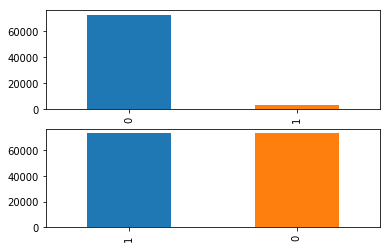

In [32]:
## Normalizing by Standard Scaler

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


X = df4.iloc[:,0:345]
y = df4.iloc[:,345] #-- TARGET

## SMOTE 

fig, axes = plt.subplots(nrows=2, ncols=1)
#fig, axes = plt.subplots(nrows=2, ncols=1)

smote = SMOTE(random_state = 42)
X_new, y_new = smote.fit_resample(X, y)
pd.Series(y).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot.bar(color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')

## Standarization

standardscaler = StandardScaler()
X_new_2 = standardscaler.fit_transform(X_new)

print('Original Data\n\n', df4.iloc[1:5,1:5].values)
print('\n\n StandardScaler data\n\n', X_new_2[0:5,0:5])




X Before SMOTE: (76020, 345)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 345)

 Y After SMOTE: (146024,)



Original Data

 [[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


 StandardScaler data

 [[ 0.03069527 -0.02541867 -0.03252236 -0.00932269  1.2328544 ]
 [ 0.03069527 -0.02541867 -0.03252236 -0.00932269  1.2328544 ]
 [ 0.03069527 -0.02541867 -0.03252236 -0.00932269  1.2328544 ]
 [ 0.03069527 -0.02541867 -0.03252236 -0.00932269 -0.86846399]
 [ 0.03069527 -0.02541867 -0.03252236 -0.00932269  1.2328544 ]]


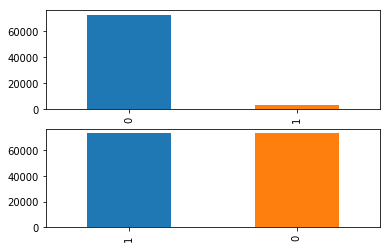

In [6]:
# Libraries

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Defining X and y;

X = df4.iloc[:,0:345]
y = df4.iloc[:,345] #-- TARGET

# Set references

seed = 42
test_size = 0.30

## Applying SMOTE - Making dataset balanced

smote = SMOTE(random_state = seed)
X_new, y_new = smote.fit_resample(X, y)

# Printing 
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot.bar(color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')

#Split data

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = test_size ,random_state = seed)

## Normalizing by Standard Scaler

## Standarization

standardscaler = StandardScaler()
X_train_2 = standardscaler.fit_transform(X_train)
X_test_2 = standardscaler.fit_transform(X_test)

print('Original Data\n\n', df4.iloc[1:5,1:5].values)
print('\n\n StandardScaler data\n\n', X_train_2[0:5,0:5])


### Balance dataset - SMOTE and Principal Component Analysis (PCA)


X Before SMOTE: (76020, 345)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 345)

 Y After SMOTE: (146024,)



[[ 4.33303314e-04 -3.92443232e-04 -6.44457711e-04 ...  6.67157085e-05
   8.25041227e-05  2.22698087e-04]
 [ 3.07761103e-04  4.52531101e-04  7.14553117e-04 ...  6.98538613e-05
   9.09974379e-05 -1.52974641e-04]
 [-1.14033383e-03  2.41069232e-03  3.66866123e-03 ...  3.70769040e-05
   5.36371714e-05 -1.88936572e-04]
 ...
 [-6.72632421e-04  1.66313224e-02  1.88324483e-02 ... -1.88011608e-02
  -2.42771908e-02 -9.94705808e-03]
 [-1.65735919e-03 -2.83316044e-03  1.03948173e-03 ...  6.76053030e-03
   8.28420926e-03  1.32985511e-02]
 [-1.63246551e-04  3.91896836e-01  3.71118140e-01 ...  3.53669609e-03
   3.60957360e-03 -1.49714800e-03]]

 100


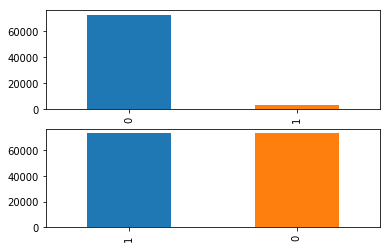

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

# Split data - Should be df3 without 3 or 4 columns
X = df4.iloc[:,0:345]
y = df4.iloc[:,345] #-- TARGET

#Balancing the data - SMOTE

smote = SMOTE(random_state = 42)
X_new, y_new = smote.fit_resample(X, y)

# Plots
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y).value_counts().plot(kind = 'bar', color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot(kind = 'bar', color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')

# Normalizing data
scaler = MinMaxScaler(feature_range = (0, 1))
X_rescaled = scaler.fit_transform(X_new)

# PCA

pca = PCA(n_components = 100)
X_new_2 = pca.fit(X_rescaled)

print(X_new_2.components_)
print('\n',X_new_2.n_components_)




## Machine Learning

Now the implementation of machine learning algorithms is treated at this segment. Initially, the application will be combined with StandardScaler and Smote as showed before.

Let's training and evaluate one or two machine learning algorithms as well as understand their implications. Additionally, Cross-validation will be inserted and other validation evaluated in order to compare their results.

The association of all method also can to be implemented by another one called pipeline. Pipeline allows combine any techniques at once. 

For learn more: https://medium.com/@cmukesh8688/sklearn-pipeline-gridsearchcv-54f5552bbf4e#:~:text=Pipeline%20is%20used%20to%20assemble,pipeline%20module.&text=GridSearchCV%20is%20used%20to%20optimize,to%20find%20the%20best%20model


### Attempt Number 01 - SMOTE + StandardScaler + GaussianNB 


X Before SMOTE: (53214, 345)

 Y Before SMOTE: (53214,)

 X After SMOTE: (102242, 345)

 Y After SMOTE: (102242,)



Original Data

 [[2. 0. 0. 0. 1.]
 [2. 0. 0. 0. 0.]
 [2. 0. 0. 0. 1.]
 [2. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0.]]


 StandardScaler data

 [[ 0.03139606 -0.02522203 -0.03190972 -0.01491058 -0.90442501]
 [ 0.03139606 -0.02522203 -0.03190972 -0.01491058  1.24090437]
 [ 0.03139606 -0.02522203 -0.03190972 -0.01491058 -0.90442501]
 [ 0.03139606 -0.02522203 -0.03190972 -0.01491058  1.24090437]
 [ 0.03139606 -0.02522203 -0.03190972 -0.01491058 -0.90442501]]


Naive Bayes score:  0.9598789792159957


 Naive bayes Recall: 1.0
 Naive bayes accuracy: 0.9598789792159957


 Confunsion Matrix:
 [[21891     0]
 [  915     0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21891
           1       0.00      0.00      0.00       915

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22

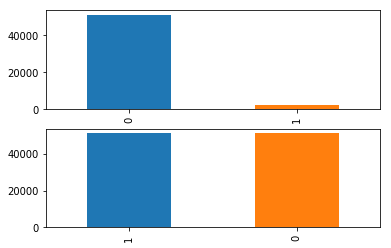

In [41]:
# Libraries

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report


# Defining X and y;

X = df4.iloc[:,0:345]
y = df4.iloc[:,345] #-- TARGET

# Set references

seed = 42
test_size = 0.30

#Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,random_state = seed)

## Applying SMOTE - Making dataset balanced

smote = SMOTE(random_state = seed)
X_new, y_new = smote.fit_resample(X_train, y_train)

# Printing 
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y_train).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot.bar(color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X_train.shape)
print('\n Y Before SMOTE:', y_train.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')


## Normalizing by Standard Scaler

## Standarization

standardscaler = StandardScaler()
X_train_2 = standardscaler.fit_transform(X_new)
X_test_2 = standardscaler.fit_transform(X_test)

print('Original Data\n\n', df4.iloc[0:5,0:5].values)
print('\n\n StandardScaler data\n\n', X_train_2[0:5,0:5])

# Machine Learning

gaussianNB = GaussianNB()

# Model
nb_model = gaussianNB.fit(X_train_2, y_new)

# Prediction
y_pred = nb_model.predict(X_test_2)

# Metrics
nb_recall = recall_score(y_test, y_pred, pos_label = 0, average= 'binary') #TP/TP + FN 
nb_accur = accuracy_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)

# Score Model
prediction = nb_model.score(X_test_2, y_test)

# Classification report
report = classification_report(y_test, y_pred)

print("\n\nNaive Bayes score: ",prediction)
print('\n')

print(" Naive bayes Recall:", nb_recall )
print(" Naive bayes accuracy:", nb_accur )
print('\n')
print(" Confunsion Matrix:\n", cf)
print('\n')
print(report)

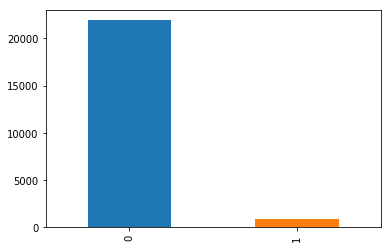

In [45]:
# Test values;
pd.Series(y_test).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'])

In [44]:
y_test.value_counts()

0    21891
1      915
Name: TARGET, dtype: int64

### Conclusion 

This model just learned satisfaction. So, this is not good. It is not  a generalized model. It just made Predictions = yes (or 0, in this case) and did not learn Predictions = No (or 1, in this case). For thar reason, it is biased model.

### Attempt Number 02 - SMOTE + StandardScaler + LogisticRegression 

In [13]:
# Libraries

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Defining X and y;

X = df4.iloc[:,0:345]
y = df4.iloc[:,345] #-- TARGET

# Set references

seed = 42
test_size = 0.30

#Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size ,random_state = seed)

## Applying SMOTE - Making dataset balanced

smote = SMOTE(random_state = seed)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

## Normalizing by Standard Scaler

## Standarization

standardscaler = StandardScaler()
X_rescaled = standardscaler.fit_transform(X_smote) # Training
X_test_rescaled = standardscaler.fit_transform(X_test) # Test


# Machine Learning

lr = LogisticRegression()

lr.fit(X_rescaled, y_smote)

y_pred_lr = lr.predict(X_test_rescaled)

lr_recall = recall_score(y_test, y_pred_lr, pos_label = 0, average= 'binary')) #TP/TP + FN 
lr_accur = accuracy_score(y_test, y_pred_lr)
lr_cf = confusion_matrix(y_test, y_pred_lr)

prediction = lr.score(X_test_rescaled, y_test)
print("\n\n Logistic Regression score: ",prediction)
print('\n')

print(" Logistic Regression Recall:", lr_recall )
print(" Logistic Regression accuracy:", lr_accur )
print('\n')
print(" Logistic Regression Confunsion Matrix:\n", lr_cf)




 Logistic Regression score:  0.5552486187845304


 Logistic Regression Recall: 0.5552486187845304
 Logistic Regression accuracy: 0.5552486187845304


 Logistic Regression Confunsion Matrix:
 [[11945  9946]
 [  197   718]]


### Conclusion 

This model not resulted in satisfied accuracy.

#### Understanding recall metrics

Learn more: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [34]:
print(' None',recall_score(y_test, y_pred_lr, average= None))
print("Binary", recall_score(y_test, y_pred_lr, average= 'binary'))
print("Micro", recall_score(y_test, y_pred_lr, average= 'micro'))
print("Wheighted", recall_score(y_test, y_pred_lr, average= 'weighted'))
print("pos_label = 0 - Binary", recall_score(y_test, y_pred_lr, pos_label = 0, average= 'binary'))
print("pos_label = 0 - Binary", recall_score(y_test, y_pred_lr, pos_label = 1, average= None))

# When None = return both recall_score: TP/TP + FN and TN/TN +FP [0 1]
# When micro = return just positive recall_score = TP/TP + FN - But the values are differennte

# We must use recall_score(y_test, y_pred_lr, pos_label = 0, average= 'binary')) - which returns TP/TP + FN;

 None [0.54565803 0.78469945]
Binary 0.7846994535519126
Micro 0.5552486187845304
Wheighted 0.5552486187845305
pos_label = 0 - Binary 0.5456580329815907
pos_label = 0 - Binary [0.54565803 0.78469945]


### Cross-validation

For understand more about difference between Stratified x StratifiedShufleSplit

Learn more: https://pt.coredump.biz/questions/45969390/difference-between-stratifiedkfold-and-stratifiedshufflesplit-in-sklearn
          / https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

### Attempt Number 03 - StandardScaler + GaussianNB + Cross- Validation 

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Separete the data

X = df4.drop("TARGET", axis=1)
y = df4['TARGET']


# Defining parameters

seed = 42
num_folds = 5
size = 0.30

# Standarization

standardscaler = StandardScaler() #Instancing object
X_scaled = standardscaler.fit_transform(X) # Apply standarization training data

# Cross_validation

skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)

lst_accur = []

# Initialize model

NB = GaussianNB()

# Evaluating 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    NB.fit(x_train_fold, y_train_fold)
    lst_accur.append(NB.score(x_test_fold, y_test_fold))
    
# Results

print('List of possible accuracy:', lst_accur)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accur)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accur)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accur)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accur))

List of possible accuracy: [0.08096553538542489, 0.07780847145488029, 0.09201525914233097, 0.09142330965535385, 0.09997369113391213]

Maximum Accuracy That can be obtained from this model is: 9.997369113391214 %

Minimum Accuracy: 7.780847145488029 %

Overall Accuracy: 8.843725335438043 %

Standard Deviation is: 0.00804494410629374


### Conclusion 

Very bad results in this model.

### Attempt Number 04 - SMOTE + StandardScaler + GaussianNB + Cross- Validation 

As using SMOTE, the results is a balanced data. So we can use cross-validation k-fold directly. If our dataset are unbalanced 
the use of StratifiedKfold is recomended instead. 


X Before SMOTE: (76020, 345)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 345)

 Y After SMOTE: (146024,)



Accuracy: 51.370
Recall: 0.994


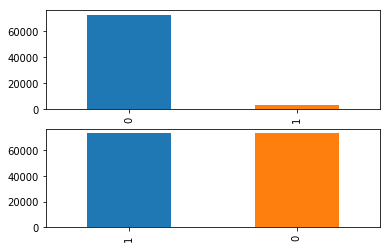

In [45]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Separete the data

X = df4.drop("TARGET", axis=1)
y = df4['TARGET']


# Defining parameters

seed = 42
num_folds = 10
size = 0.30

# SMOTE

## Applying SMOTE - Making dataset balanced

smote = SMOTE(random_state = seed)
X_new, y_new = smote.fit_resample(X, y)

# Printing 
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot.bar(color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')


# Standarization

standardscaler = StandardScaler() #Instancing object
X_scaled = standardscaler.fit_transform(X_new) # Apply standarization training data

# Split folds

# Used for unbalaced data;
#skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)

kfold = KFold(num_folds, True, random_state = seed)

# Initialize model

model_NB = GaussianNB()

# Evaluating 

# Cross Validation
#result = cross_val_score(model_NB, X_new, y_new, cv = kfold, scoring = 'accuracy')
result = cross_validate(model_NB, X_new, y_new, cv = kfold, scoring = ['accuracy', 'recall'])
# Results


print("Accuracy: %.3f" % (result['test_accuracy'].mean()*100))
print("Recall: %.3f" % (result['test_recall'].mean()))


### Conclusion 

This model get diversified results in Accurancy and Recall. In fact, this show that this model is not good one.

### Attempt Number 05 - StandardScaler + Logistic Regression + Cross- Validation 


The use of C's Logistic Regression parameters can be reached here:https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul#:~:text=C%20%3A%20float%2C%20optional%20(default,here%20in%20simple%20terms%20please%3F 

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

# Separete the data

X = df4.drop("TARGET", axis=1)
y = df4['TARGET']


# Defining parameters

seed = 42
num_folds = 5
size = 0.30

# Standarization

standardscaler = StandardScaler() #Instancing object
X_scaled = standardscaler.fit_transform(X) # Apply standarization training data

# Cross_validation

skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)


# Initialize model

lr = LogisticRegression(C=2)

lst_score = []
i=1
# Evaluating 

for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    lr.fit(x_train_fold, y_train_fold)
    score = roc_auc_score(y_test_fold,lr.predict(x_test_fold))
    print('ROC AUC score:',score)
    lst_score.append(score)   
    i+=1

    
print('\nConfusion matrix\n',confusion_matrix(y_test_fold,lr.predict(x_test_fold)))
print('\nCv',lst_score,'\nMean cv Score',np.mean(lst_score))
print('\nAccuracy: ', lr.score(x_test_fold,y_test_fold))
    

1 of KFold 5
ROC AUC score: 0.5022219239476583
2 of KFold 5
ROC AUC score: 0.5022904030272994
3 of KFold 5
ROC AUC score: 0.5010447756439863
4 of KFold 5
ROC AUC score: 0.5005566297066666
5 of KFold 5
ROC AUC score: 0.5038788888428792
Confusion matrix
 [[14594     8]
 [  597     5]]
Cv [0.5022219239476583, 0.5022904030272994, 0.5010447756439863, 0.5005566297066666, 0.5038788888428792] 
Mean cv Score 0.501998524233698


In [62]:
lr.score(x_test_fold,y_test_fold)

0.9602078400420941

### Conclusion 

This model got diversified results in Accurancy and Recall and this is not good.

### Attempt Number 06 - SMOTE + StandardScaler + Logistic Regression + Cross- Validation 


X Before SMOTE: (76020, 345)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 345)

 Y After SMOTE: (146024,)



List of possible accuracy: [0.9601420678768745, 0.9604051565377533, 0.9602736122073139, 0.9601420678768745, 0.9593528018942383, 0.9598789792159957, 0.9601420678768745, 0.9600105235464351, 0.9602736122073139, 0.9605367008681925]

Maximum Accuracy That can be obtained from this model is: 96.05367008681925 %

Minimum Accuracy: 95.93528018942384 %

Overall Accuracy: 96.01157590107867 %

Standard Deviation is: 0.0003101769566575135


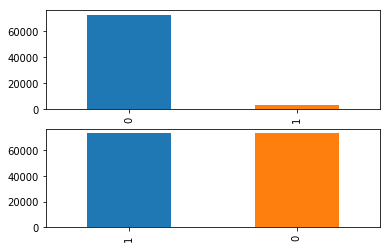

In [42]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Separete the data

X = df4.drop("TARGET", axis=1)
y = df4['TARGET']


# Defining parameters

seed = 42
num_folds = 10
size = 0.30

# SMOTE

## Applying SMOTE - Making dataset balanced

smote = SMOTE(random_state = seed)
X_new, y_new = smote.fit_resample(X, y)

# Printing 
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot.bar(color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')


# Standarization

standardscaler = StandardScaler() #Instancing object
X_scaled = standardscaler.fit_transform(X_new) # Apply standarization training data

# Cross_validation

skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)

lst_accur = []

# Initialize model

lr = LogisticRegression()

# Evaluating 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accur.append(lr.score(x_test_fold, y_test_fold))
    
# Results

print('List of possible accuracy:', lst_accur)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accur)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accur)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accur)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accur))

### Conclusion 

The first model with high accuracy? It is wrong...! 

### Attempt Number 07 - SMOTE + StandardScaler + Logistic Regression + Cross- Validation - Another way


X Before SMOTE: (76020, 345)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 345)

 Y After SMOTE: (146024,)



1 of KFold 10
ROC AUC score: 0.5013927691043549
2 of KFold 10
ROC AUC score: 0.5015297178855108
3 of KFold 10
ROC AUC score: 0.501524162029413
4 of KFold 10
ROC AUC score: 0.503048324058826
5 of KFold 10
ROC AUC score: 0.4994521298452267
6 of KFold 10
ROC AUC score: 0.501318710721373
7 of KFold 10
ROC AUC score: 0.501318710721373
8 of KFold 10
ROC AUC score: 0.49979454869196
9 of KFold 10
ROC AUC score: 0.503048324058826
10 of KFold 10
ROC AUC score: 0.5048464211656256
Confusion matrix
 [[7299    2]
 [ 298    3]]
Cv [0.5013927691043549, 0.5015297178855108, 0.501524162029413, 0.503048324058826, 0.4994521298452267, 0.501318710721373, 0.501318710721373, 0.49979454869196, 0.503048324058826, 0.5048464211656256] 
Mean cv Score 0.5017273818282488


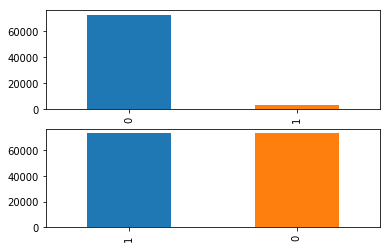

In [57]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

# Separete the data

X = df4.drop("TARGET", axis=1)
y = df4['TARGET']


# Defining parameters

seed = 42
num_folds = 10
size = 0.30

# SMOTE

## Applying SMOTE - Making dataset balanced

smote = SMOTE(random_state = seed)
X_new, y_new = smote.fit_resample(X, y)

# Printing 
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y).value_counts().plot(kind='bar',color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot.bar(color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')


# Standarization

standardscaler = StandardScaler() #Instancing object
X_scaled = standardscaler.fit_transform(X_new) # Apply standarization training data

# Cross_validation

skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)

# Model

lr = LogisticRegression(C=2, random_state=seed)

lst_score = []
i=1
# Evaluating 

for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    lr.fit(x_train_fold, y_train_fold)
    score = roc_auc_score(y_test_fold,lr.predict(x_test_fold))
    print('ROC AUC score:',score)
    lst_score.append(score)   
    i+=1

    
print('Confusion matrix\n',confusion_matrix(y_test_fold,lr.predict(x_test_fold)))
print('Cv',lst_score,'\nMean cv Score',np.mean(lst_score))    


In [56]:
lr.score(x_test_fold,y_test_fold)

0.9605367008681925

### Conclusion 

The model's result is the same up now! 

# The chosen one!

### Attempt Number 08 - SMOTE + MaxMinScaler + PCA + Some Algorithms

Technique for use with all dataset. So, for this dataset we will not remove the list of columns selected before by correlation of Pearson. Just var_15 column will be removed cause HotEncoderOne technique was used for its value and PCA will be applied;

In [64]:
df3 = pd.read_csv('df3.csv')
df3.head(5)

ID  var3  var15 var15_range  Labels_var15_range  var15_(0, 10]  \
0   1     2     23    (20, 30]                   3            0.0   
1   3     2     34    (30, 40]                   4            0.0   
2   4     2     23    (20, 30]                   3            0.0   
3   8     2     37    (30, 40]                   4            0.0   
4  10     2     39    (30, 40]                   4            0.0   

   var15_(10, 20]  var15_(100, 110]  var15_(20, 30]  var15_(30, 40]  ...  \
0             0.0               0.0             1.0             0.0  ...   
1             0.0               0.0             0.0             1.0  ...   
2             0.0               0.0             1.0             0.0  ...   
3             0.0               0.0             0.0             1.0  ...   
4             0.0               0.0             0.0             1.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 384 columns]

In [82]:
t_columns = ['var15',"var15_range","Labels_var15_range"]

# Calling function

df5 = dataframe_column_delete(df3,t_columns)
df5 = df5.drop('ID', axis=1)
df5.head()


var3  var15_(0, 10]  var15_(10, 20]  var15_(100, 110]  var15_(20, 30]  \
0     2            0.0             0.0               0.0             1.0   
1     2            0.0             0.0               0.0             0.0   
2     2            0.0             0.0               0.0             1.0   
3     2            0.0             0.0               0.0             0.0   
4     2            0.0             0.0               0.0             0.0   

   var15_(30, 40]  var15_(40, 50]  var15_(50, 60]  var15_(60, 70]  \
0             0.0             0.0             0.0             0.0   
1             1.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   var15_(70, 80]  ...  saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
0             0.0  ...                      0.0                      0.0   
1             0.0  ...                      0.0                      0.0   
2             0.0  ...                      0.0                      0.0   
3             0.0  ...                      0.0                      0.0   
4             0.0  ...                      0.0                      0.0   

   saldo_medio_var33_ult1  saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   
2                     0.0                     0.0                      0.0   
3                     0.0                     0.0                      0.0   
4                     0.0                     0.0                      0.0   

   saldo_medio_var44_hace3  saldo_medio_var44_ult1  saldo_medio_var44_ult3  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

           var38  TARGET  
0   39205.170000       0  
1   49278.030000       0  
2   67333.770000       0  
3   64007.970000       0  
4  117310.979016       0  

[5 rows x 380 columns]


X Before SMOTE: (76020, 379)

 Y Before SMOTE: (76020,)

 X After SMOTE: (146024, 379)

 Y After SMOTE: (146024,)




 (116820, 100)

 (29204, 100)


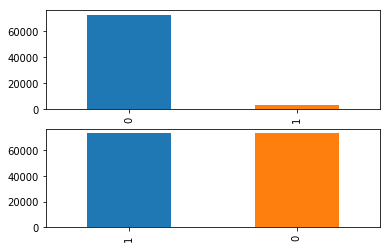

In [127]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

# Split data - Should be df3 without 3 or 4 columns
X = df5.drop('TARGET', axis=1)
y = df5.TARGET #-- TARGET

#Balancing the data - SMOTE

smote = SMOTE(random_state = 42)
X_new, y_new = smote.fit_resample(X, y)

# Plots
fig, axes = plt.subplots(nrows=2, ncols=1)
pd.Series(y).value_counts().plot(kind = 'bar', color = ['#1F77B4', '#FF7F0E'], ax=axes[0])
pd.Series(y_new).value_counts().plot(kind = 'bar', color = ['#1F77B4', '#FF7F0E'], ax=axes[1])

print('\nX Before SMOTE:', X.shape)
print('\n Y Before SMOTE:', y.shape)

print('\n X After SMOTE:',X_new.shape)
print('\n Y After SMOTE:',y_new.shape)
print('\n\n')

# Normalizing data
scaler = MinMaxScaler(feature_range = (0, 1))
X_rescaled = scaler.fit_transform(X_new)

# Split data (Kfold because it is not more a unbalaced dataset)

kf = KFold(n_splits=5,random_state=1,shuffle=True)

for train_index, test_index in kf.split(X_rescaled, y_new):
    x_train_fold, x_test_fold = X_rescaled[train_index], X_rescaled[test_index]
    y_train_fold, y_test_fold = y_new[train_index], y_new[test_index]

# PCA

pca = PCA(n_components = 100)
X_train_pca = pca.fit_transform(x_train_fold)
X_test_pca = pca.fit_transform(x_test_fold)

print('\n',X_train_pca.shape)
print('\n',X_test_pca.shape)


In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model
results = []
names = []

def metrics(true,predicted):
    return roc_auc_score(true,predicted)

def accuracy(true,predicted):
    return accuracy_score(true,predicted)

for name, model in models:
    
        model.fit(X_train_pca,y_train_fold)
        pred=model.predict(X_test_pca)
        res=metrics(y_test_fold,pred)
        acc=accuracy(y_test_fold,pred)
        results.append(res)
        names.append(name)
        msg = "Model %s, ROC_AUC = %f, Accuracy = %f " % (name,res,acc)
        print(msg)


Model Logistic Regression, ROC_AUC = 0.774658, Accuracy = 0.774688 
Model Naive Bayes, ROC_AUC = 0.543601, Accuracy = 0.544309 
Model Linear Discriminant Analysis, ROC_AUC = 0.789923, Accuracy = 0.789892 
Model RF, ROC_AUC = 0.620621, Accuracy = 0.621251 


### Conclusion

This is the model chosen. The results converge in AUC and Accuracy; 

The Linear Discriminant Analysis showed the best perfomance compared others techniques applied!! 

### Attempt Number 09 - StandardScaler + Cross Validation +Algorithms

In [126]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc, accuracy_score

# Separete the data

X = df4.drop("TARGET", axis=1)
y = df4['TARGET']


# Defining parameters

seed = 42
num_folds = 5
size = 0.30

# Standarization

standardscaler = StandardScaler() #Instancing object
X_scaled = standardscaler.fit_transform(X) # Apply standarization training data

# Cross_validation

kf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)


# Initialize model

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))


# Split data
i=0
for train_index, test_index in kf.split(X_scaled, y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    i=i+1


# evaluate each model
results = []
names = []

def metrics(true,predicted):
    return roc_auc_score(true,predicted)

def accuracy(true,predicted):
    return accuracy_score(true,predicted)

    
for name, model in models:
    
        model.fit(x_train_fold,y_train_fold)
        pred=model.predict(x_test_fold)
        res=metrics(y_test_fold,pred)
        acc = accuracy(y_test_fold,pred)
        results.append(res)
        names.append(name)
        msg = "Modelo: %s, ROC-AUC-Score: %f, Accuracy: %f " % (name,res,acc)
        print(msg)

    
#print('\n\nConfusion matrix\n\n',confusion_matrix(y_test_fold,lr.predict(x_test_fold)))
#print('\n\nCv',lst_score,'\n\nMean cv Score',np.mean(lst_score))
 


1 of KFold 5
1 of KFold 5
1 of KFold 5
1 of KFold 5
1 of KFold 5
Modelo: Logistic Regression, ROC-AUC-Score: 0.503879, Accuracy: 0.960208 
Modelo: Naive Bayes, ROC-AUC-Score: 0.522674, Accuracy: 0.099974 
Modelo: Linear Discriminant Analysis, ROC-AUC-Score: 0.499932, Accuracy: 0.960274 
Modelo: RF, ROC-AUC-Score: 0.516528, Accuracy: 0.946264 


### Conclusion

Trying evaluate the model without PCA and the results were a shame!  

### Attempt Number 10 - MaxMinScaler + PCA + Some Algorithms

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from collections import Counter

# Split data - Should be df3 without 3 or 4 columns
X = df5.drop('TARGET', axis=1)
y = df5.TARGET #-- TARGET

# Seed

seed = 42
num_fols = 10


In [116]:
columns=X.columns
ind=X.index

# Normalizing data
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaler = scaler.fit_transform(X)


In [117]:
# Transforming to DataFrame

X_scaler = pd.DataFrame(X_scaler, columns = columns, index = ind)
X_scaler.head(5)

var3  var15_(0, 10]  var15_(10, 20]  var15_(100, 110]  var15_(20, 30]  \
0  0.999764            0.0             0.0               0.0             1.0   
1  0.999764            0.0             0.0               0.0             0.0   
2  0.999764            0.0             0.0               0.0             1.0   
3  0.999764            0.0             0.0               0.0             0.0   
4  0.999764            0.0             0.0               0.0             0.0   

   var15_(30, 40]  var15_(40, 50]  var15_(50, 60]  var15_(60, 70]  \
0             0.0             0.0             0.0             0.0   
1             1.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   var15_(70, 80]  ...  saldo_medio_var29_ult3  saldo_medio_var33_hace2  \
0             0.0  ...                     0.0                      0.0   
1             0.0  ...                     0.0                      0.0   
2             0.0  ...                     0.0                      0.0   
3             0.0  ...                     0.0                      0.0   
4             0.0  ...                     0.0                      0.0   

   saldo_medio_var33_hace3  saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

   saldo_medio_var44_hace2  saldo_medio_var44_hace3  saldo_medio_var44_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var44_ult3     var38  
0                     0.0  0.001545  
1                     0.0  0.002003  
2                     0.0  0.002822  
3                     0.0  0.002671  
4                     0.0  0.005091  

[5 rows x 379 columns]

In [118]:
# KStratified

kf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = seed)

for train_index, test_index in kf.split(X_scaler, y):
    x_train_fold, x_test_fold = X_scaler.iloc[train_index], X_scaler.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

In [119]:
# PCA

pca = PCA(n_components = 57)
X_pca_train = pca.fit_transform(x_train_fold)
X_pca_test = pca.fit_transform(x_test_fold)

print('\n',X_pca_train.shape)
print('\n',X_pca_test.shape)



 (60816, 57)

 (15204, 57)


In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model
results = []
names = []

def metrics(true,predicted):
    return roc_auc_score(true,predicted)

def accuracy(true,predicted):
    return accuracy_score(true,predicted)

for name, model in models:
    
        model.fit(X_pca_train,y_train_fold)
        pred=model.predict(X_pca_test)
        res=metrics(y_test_fold,pred)
        acc=accuracy_score(y_test_fold,pred)
        results.append(res)
        names.append(name)
        msg = "Model: %s, ROC_AUC_Score = %f, Accuracy = %f" % (name,res,acc)
        print(msg)


Model: Logistic Regression, ROC_AUC_Score = 0.499726, Accuracy = 0.959879
Model: Naive Bayes, ROC_AUC_Score = 0.528655, Accuracy = 0.334780
Model: Linear Discriminant Analysis, ROC_AUC_Score = 0.499281, Accuracy = 0.959024
Model: RF, ROC_AUC_Score = 0.500000, Accuracy = 0.960405


### Conclusion

That possibilitie did not have the outcomes desired! 

# Conclusion

After different approaches as well as inumerical attempts and resolutions, from any searches using some techniques combined generated a good result for a good start. 

The attempt number 8 was chosen with Linear Discriminant Analysis for this challenge wich got ROC_AUC = 0.789923, Accuracy = 0.789892.

Some optimization techniques should be put in practice to improve its outcomes. By the way, for this challenge the number more than 70% was achieved as requested!
